# Imports

In [4]:
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
import pandas as pd
import requests
import urllib
import io
import os
import sys
from scipy import stats
import numpy as np
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install range-key-dict
from range_key_dict import RangeKeyDict
import graphviz

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Baixando arquivos (demora, só precisa baixar uma vez)

In [158]:
name_prefix='ABONOP_'
abono_name_base = 'http://repositorio.dados.gov.br/segrt/'
months =['01','02','03','04','05','06','07','08','09','10','11','12']
years = range(2017,2021)
tables = []

In [3]:
for y in years:
  for m in months:
    filename = name_prefix+str(m)+str(y)+'.csv'
    print(filename)
    url = abono_name_base+filename
    print(url)
    #try: #the .csv files goes until 2020-08
    try:
        urllib.request.urlretrieve(url, 'data/'+filename)
    except:
        pass
    table = pd.read_csv(url, encoding = "ISO-8859-1", error_bad_lines=False)
    tables.append(table)
    #except:
    #pass   


ABONOP_012017.csv
http://repositorio.dados.gov.br/segrt/ABONOP_012017.csv


KeyboardInterrupt: 

# Definição das funções

In [255]:
def clear_table(tbl):
    no_duplicates = tbl.drop_duplicates()
    no_null = no_duplicates.dropna()
    #print('Antes: {} Depois: {}'.format(str(len(tbl.index)),str(len(no_null))))
    return no_null

def describe_dirtness(tbl,csv_name):    
    duplicates = table[tbl.duplicated(table.columns,keep=False)].sort_values('Nome');
    nans = table.isna().sum()
    data = {'table':csv_name,'original_size':[len(table.index)],'duplicates':[len(duplicates.index)],'nans':[len(nans.index)],'removed':-1,'filtered_size':-1}
    info = pd.DataFrame(data)
    return info

def get_year_month_from_filename(csv_name):
    striped_name = csv_name.split('.')[0].split('_')[1]
    month = striped_name[0:2]
    year = striped_name[2:6]
    return (month,year)

def calculate_single_table_dirtness(table,f):
    single_table_dirtness =  describe_dirtness(table,f)    
    single_table_dirtness.at[0,'filtered_size'] = len(clean_table.index)
    single_table_dirtness.at[0,'month'] = get_year_month_from_filename(single_table_dirtness.at[0,'table'])[0]
    single_table_dirtness.at[0,'year'] = get_year_month_from_filename(single_table_dirtness.at[0,'table'])[1]
    single_table_dirtness.at[0,'removed'] = single_table_dirtness.at[0,'duplicates']+single_table_dirtness.at[0,'nans']
    return single_table_dirtness

def parse_float(text):
    if  isinstance(text,str):
        result = float(text.replace(',','.'))
    else: 
        result = text
    return result

def enable_print():
    sys.stdout = sys.__stdout__

def disable_print():
    sys.stdout = open(os.devnull, 'w')   

def remove_outliers(data,target_col,limit=0.99):
    q=data[target_col].quantile(limit)
    d = data_encoded[data_encoded['Val'] < q]
    #d[[target_col]].boxplot(figsize=(8,6))
    return d

# lendo o dataset

In [219]:
files = os.listdir('data')
dataset = pd.DataFrame()
initial_size = len(dataset.index)
all_dirtiness = pd.DataFrame(columns = ['table','month','year','original_size','duplicates','nans','removed','filtered_size'])
for f in files:
    if 'ABONOP' in f:
        try:
            path = 'data/'+f
            print(path)        
            table = pd.read_csv(path, encoding = "ISO-8859-1", delimiter=';', index_col=False, error_bad_lines=False,warn_bad_lines=False);
            clean_table = clear_table(table);
            clean_table['Mês'] = get_year_month_from_filename(f)[0]
            clean_table['Ano'] = get_year_month_from_filename(f)[1]
            dataset = dataset.append(clean_table);
            single_table_dirtness =  calculate_single_table_dirtness(table,f);
            all_dirtiness = all_dirtiness.append(single_table_dirtness, ignore_index=True)        
        except:
            pass
all_dirtiness = all_dirtiness[['table','month','year','original_size','duplicates','nans','removed','filtered_size']]
all_dirtiness.sort_values(['year','month'],inplace=True)

dataset['Val'] = dataset['Val'].map(parse_float)
dataset['Quantidade de meses no Serviço público'] = dataset['Quantidade de meses no Serviço público'].map(parse_float)
dataset['Quantidade de anos no Serviço público'] = dataset['Quantidade de anos no Serviço público'].map(parse_float)

data/ABONOP_022017.csv
data/ABONOP_112018.csv
data/ABONOP_112019.csv
data/ABONOP_012018.csv
data/ABONOP_122018.csv
data/ABONOP_042017.csv
data/ABONOP_062019.csv
data/ABONOP_072020.csv
data/ABONOP_042018.csv
data/ABONOP_072019.csv
data/ABONOP_062020.csv
data/ABONOP_042019.csv
data/ABONOP_052018.csv
data/ABONOP_022020.csv
data/ABONOP_032020.csv
data/ABONOP_062018.csv
data/ABONOP_012020.csv
data/ABONOP_032017.csv
data/ABONOP_102019.csv
data/ABONOP_012017.csv
data/ABONOP_102017.csv
data/ABONOP_082019.csv
data/ABONOP_072017.csv
data/ABONOP_022018.csv
data/ABONOP_082017.csv
data/ABONOP_092017.csv
data/ABONOP_052017.csv
data/ABONOP_032019.csv
data/ABONOP_062017.csv
data/ABONOP_052019.csv
data/ABONOP_082018.csv
data/ABONOP_102018.csv
data/ABONOP_122019.csv
data/ABONOP_122017.csv
data/ABONOP_022019.csv
data/ABONOP_082020.csv
data/ABONOP_042020.csv
data/ABONOP_072018.csv
data/ABONOP_112017.csv
data/ABONOP_012019.csv
data/ABONOP_092018.csv
data/ABONOP_052020.csv
data/ABONOP_092019.csv
data/ABONOP

# Exibindo quanto de dados ruins (nulos e NaNs) foi removido em cada ano

In [161]:
all_dirtiness
removed = all_dirtiness['original_size'].sum() - all_dirtiness['filtered_size'].sum()
print('Removeu {} linhas'.format(str(removed)))

Removeu 635 linhas


# Descrevendo os dados inválidos de acordo com o ano

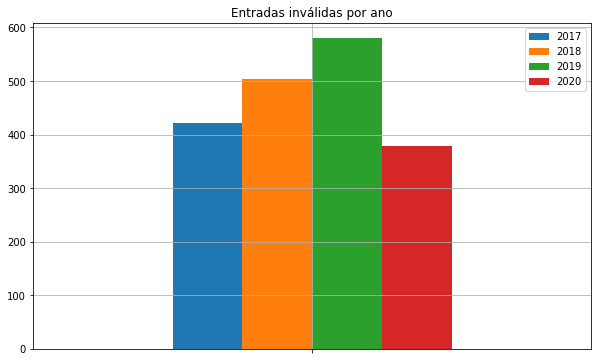

In [163]:
by_year = {}
for y in years:
    by_year[y] = [all_dirtiness[all_dirtiness['year'] == str(y)]['removed'].sum()]
pd.DataFrame(by_year).plot.bar(grid='both',title='Entradas inválidas por ano',xticks=None,figsize=(10,6))
plt.tick_params(labelbottom=False)

# Contando o total de entradas

In [164]:
final_size = len(dataset.index)
difference = final_size - initial_size

print('The dataset had {} rows before filtering and now have {} rows after filtering. Leading to a difference of {} rows'.format(str(initial_size), str(final_size), str(difference)))

The dataset had 0 rows before filtering and now have 4349186 rows after filtering. Leading to a difference of 4349186 rows


# Descrevendo a distribuição de valores pagos

In [7]:
dataset['Val'].describe()

count    4.349186e+06
mean     1.075332e+03
std      8.809571e+02
min      0.000000e+00
25%      5.579100e+02
50%      7.931600e+02
75%      1.201490e+03
max      4.025461e+04
Name: Val, dtype: float64

## Neste experimento iremos dar mais enfoque ao contexto dos dados no estado de Alagoas, pois temos interesse em realizar algumas inferências neste contexto.

* Todavia iremos dar uma descrição, menos detalhada, dos dados em um geral.

# Abono por estado

In [235]:
by_state=dataset.groupby(by='UF da Residência')

## Com outliers

/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


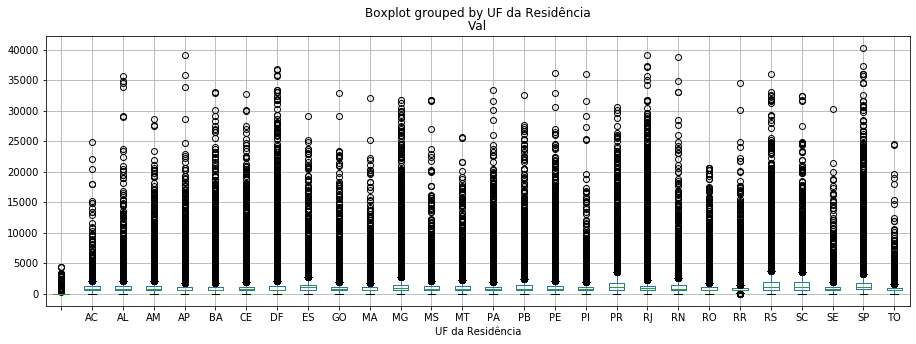

In [174]:
dataset.boxplot(column='Val',by='UF da Residência',figsize=(15,5),showfliers=True)

## Sem outliers

/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


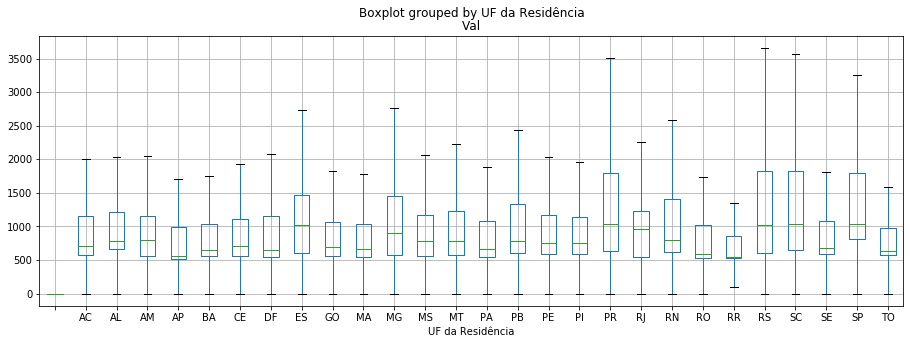

In [175]:
dataset.boxplot(column='Val',by='UF da Residência',figsize=(15,5),showfliers=False)

## Em Alagoas

In [236]:
al_df = by_state.get_group('AL').reset_index()
al_df.describe()

,index,Quantidade de anos no Serviço público,Quantidade de meses no Serviço público,Ano/Mês inicial do abono de permanência,Val
count,78059.000000,78059.000000,78059.000000,78059.000000,78059.000000
mean,45000.635225,35.517839,5.220397,201188.293957,1091.202176
std,26136.235077,4.798000,3.448408,412.060687,811.805606
min,138.000000,8.000000,0.000000,200301.000000,0.000000
25%,28744.000000,33.000000,2.000000,200909.000000,659.930000
50%,36281.000000,36.000000,5.000000,201304.000000,782.130000
75%,65534.500000,38.000000,8.000000,201501.000000,1210.930000
max,106952.000000,53.000000,11.000000,202006.000000,35673.030000


# Valor pago com outliers

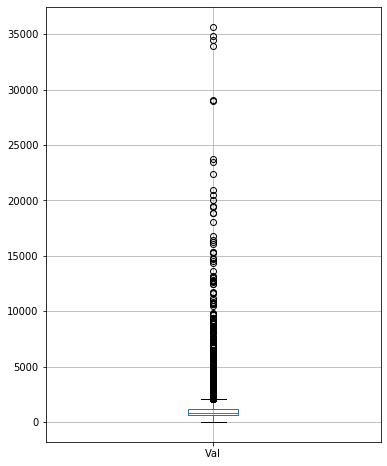

In [178]:
al_df.boxplot(column='Val',  fontsize=10, figsize=(6,8), showfliers=True)

# Valor pago sem outliers

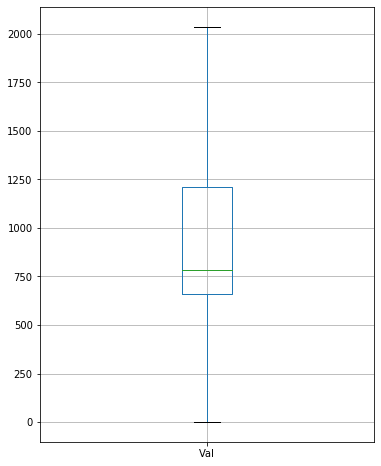

In [179]:
al_df.boxplot(column='Val',  fontsize=10, figsize=(6,8), showfliers=False)

# Agrupando por valor pago

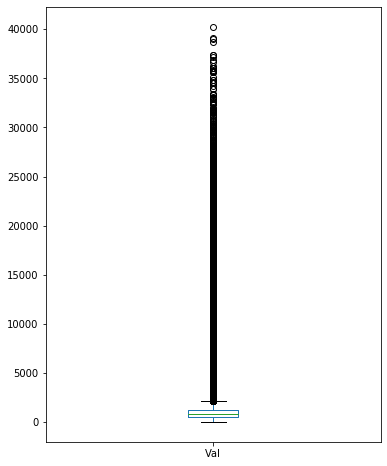

In [180]:
dataset['Val'].plot.box(figsize=(6,8))

## Com outliers

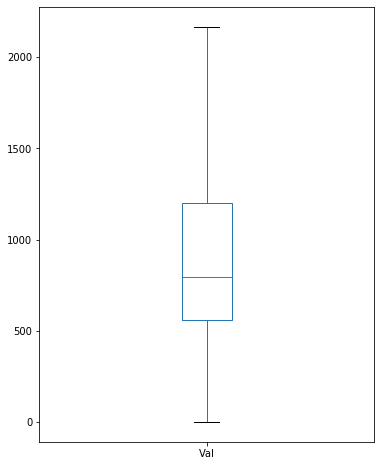

In [181]:
dataset['Val'].plot.box(showfliers=False,figsize=(6,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef482e3898>]],
      dtype=object)

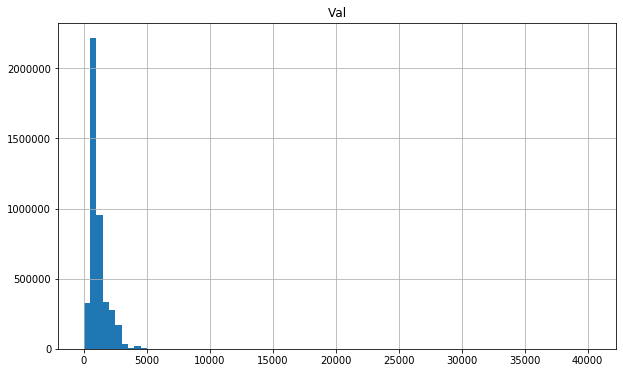

In [190]:
dataset.hist(column='Val',bins=80,figsize=(10,6))

# Sem outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef48f6ea58>]],
      dtype=object)

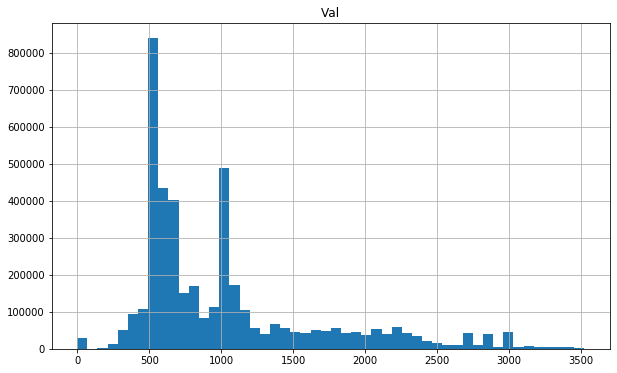

In [189]:
q = dataset["Val"].quantile(0.99)
#description
no_outliers = dataset[dataset['Val'] <  q]
no_outliers.hist(column='Val',bins=50,figsize=(10,6))


# Abono por escolaridade

In [192]:
by_education = dataset.groupby(by='Nível de Escolaridade')

/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


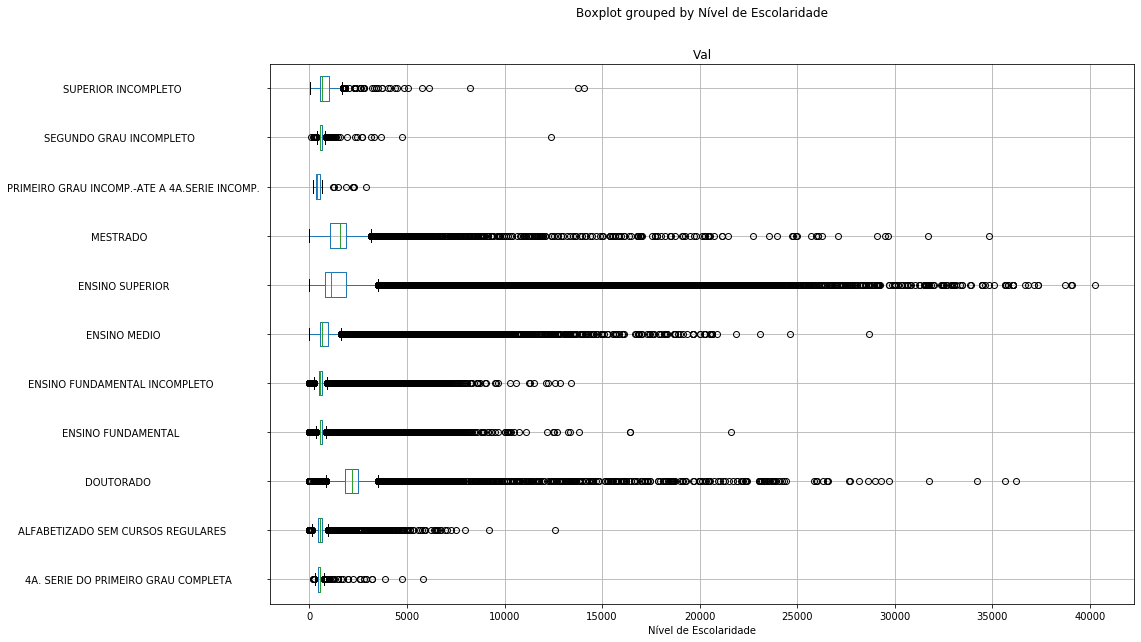

In [206]:
dataset.boxplot(by='Nível de Escolaridade',column='Val',figsize=(15,10),vert=False)

/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


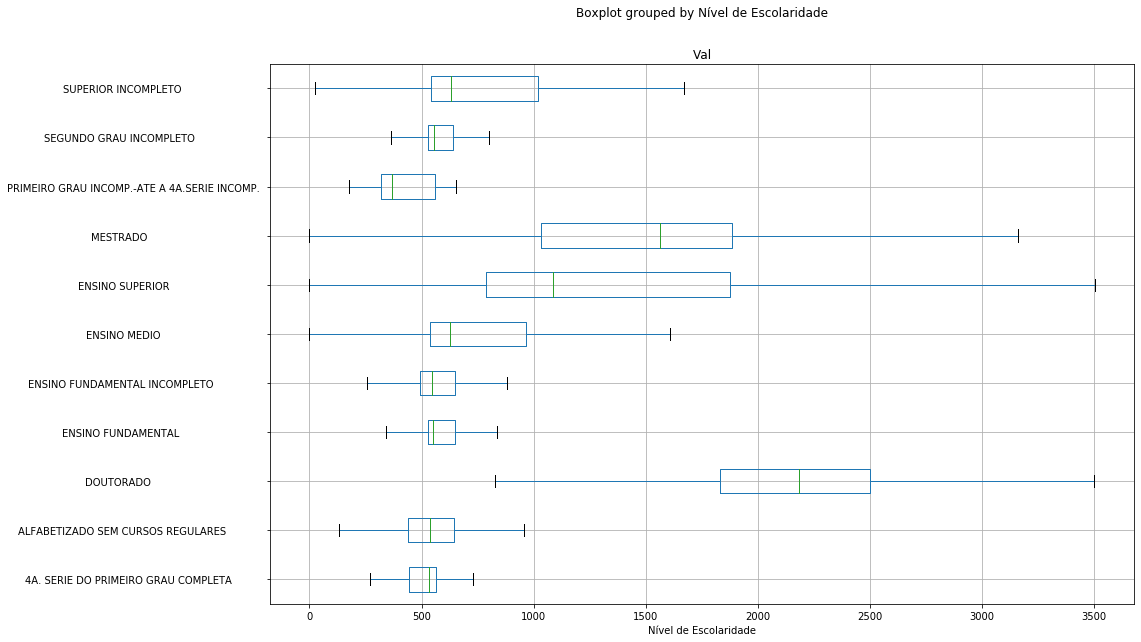

In [205]:

dataset.boxplot(by='Nível de Escolaridade',column='Val',figsize=(15,10),vert=False,showfliers=False)

## Abono por escolaridade  em Alagoas

/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


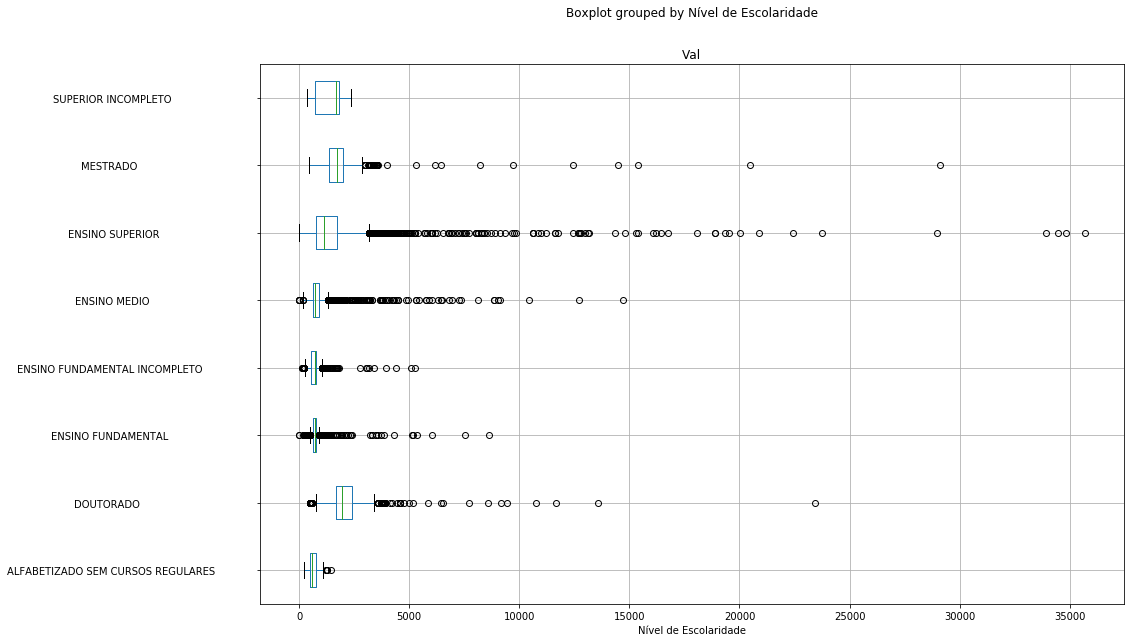

In [212]:
al_by_education = al_df.groupby(by='Nível de Escolaridade')
al_df.boxplot(by='Nível de Escolaridade',column='Val',figsize=(15,10),vert=False,showfliers=True)

/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


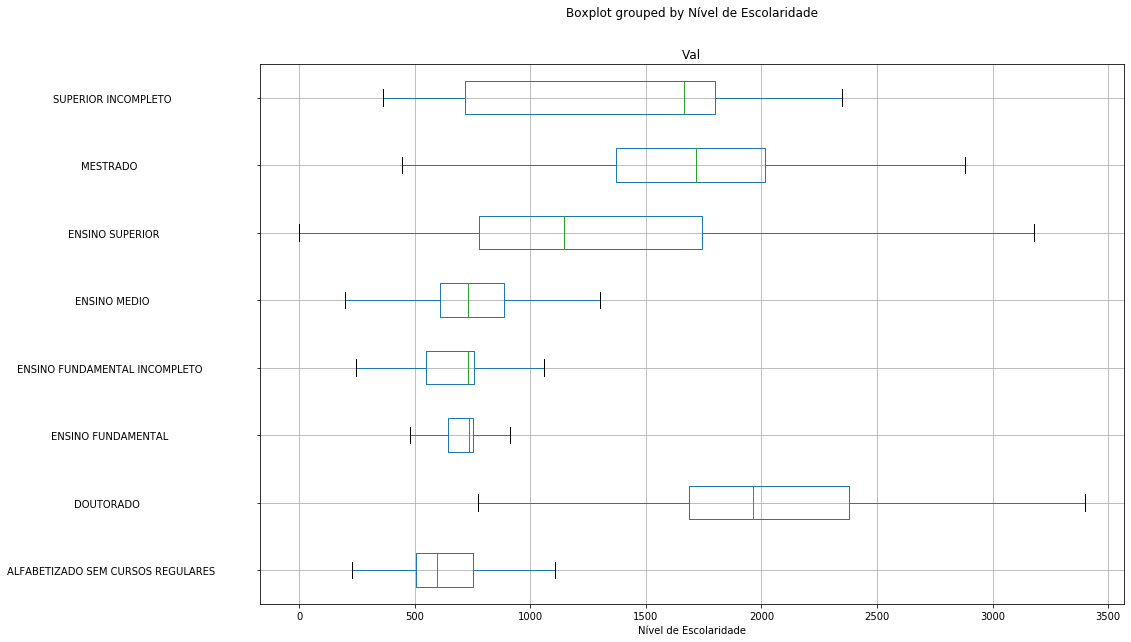

In [213]:
al_df.boxplot(by='Nível de Escolaridade',column='Val',figsize=(15,10),vert=False,showfliers=False)

# Abono por ano

In [222]:
dataset

,Nome,CPF,Descrição do cargo emprego,Nível de Escolaridade,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Situação servidor,Quantidade de anos no Serviço público,Quantidade de meses no Serviço público,Ano/Mês inicial do abono de permanência,Val,Mês,Ano
0,JOSE ALBERTO FONTENELE MAGALHAES ...,***287981**,TECNICO DE CONTABILIDADE,ENSINO SUPERIOR,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,COORD GERAL ADM DE PESSOAS-CGAP,DF,BRASILIA,ATIVO PERMANENTE,57.0,5.0,200405.0,590.84,02,2017
1,DALVA GALVAO PINHO ...,***311601**,DATILOGRAFO,ENSINO MEDIO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,COORD GERAL ADM DE PESSOAS-CGAP,DF,BRASILIA,ATIVO PERMANENTE,50.0,11.0,200405.0,576.69,02,2017
2,CICERO JOAQUIM DOS SANTOS FILHO ...,***204574**,AUDITOR FISCAL FEDERAL AGROPECUARIO,ENSINO SUPERIOR,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",PE,SUP FED AGRIC PEC ABAST EST PERNAMBUCO,PE,CARUARU,ATIVO PERMANENTE,42.0,6.0,200312.0,2241.38,02,2017
3,MARLETE DE FATIMA LOPES DE ALBUQUERQUE ...,***782921**,AGENTE ADMINISTRATIVO,ENSINO MEDIO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,COORD GERAL ADM DE PESSOAS-CGAP,DF,BRASILIA,ATIVO PERMANENTE,41.0,5.0,200805.0,546.11,02,2017
4,PAULO ELISIO DE FARIA ...,***402121**,AGENTE ADMINISTRATIVO,ENSINO SUPERIOR,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",DF,COORD GERAL ADM DE PESSOAS-CGAP,DF,Brasília,ATIVO PERMANENTE,40.0,5.0,201001.0,558.32,02,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107989,JULIO NERY DOS SANTOS FILHO ...,***666827**,TECNICO DE TECNOLOGIA MILITAR,ENSINO MEDIO,COMANDO DA MARINHA,RJ,ARSENAL DE MARINHA DO RIO DE JANEIRO,RJ,RIO DE JANEIRO,ATIVO PERMANENTE,8.0,11.0,201407.0,766.42,03,2018
107990,JORGE LUIZ CAVALCANTE DE AZEVEDO ...,***167537**,AGENTE DE VIGILANCIA,ENSINO MEDIO,COMANDO DA MARINHA,RJ,ARSENAL DE MARINHA DO RIO DE JANEIRO,RJ,MARICÁ,ATIVO PERMANENTE,28.0,9.0,201503.0,542.33,03,2018
107991,ELI MANOEL TEODORO ...,***416027**,AUX OPERAC DE SERV DIVERSOS,ENSINO MEDIO,COMANDO DA MARINHA,RJ,ARSENAL DE MARINHA DO RIO DE JANEIRO,RJ,BELFORD ROXO,ATIVO PERMANENTE,28.0,8.0,201007.0,554.43,03,2018
107992,MONICA FRAGA DE BARROS SILVA ...,***010877**,ANALISTA EM CIENCIA E TECNOLOGIA,ENSINO SUPERIOR,COMANDO DA MARINHA,RJ,CENTRO DE ANALISES DE SISTEMAS NAVAIS,RJ,RIO DE JANEIRO,ATIVO PERMANENTE,7.0,10.0,201510.0,1202.07,03,2018


/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


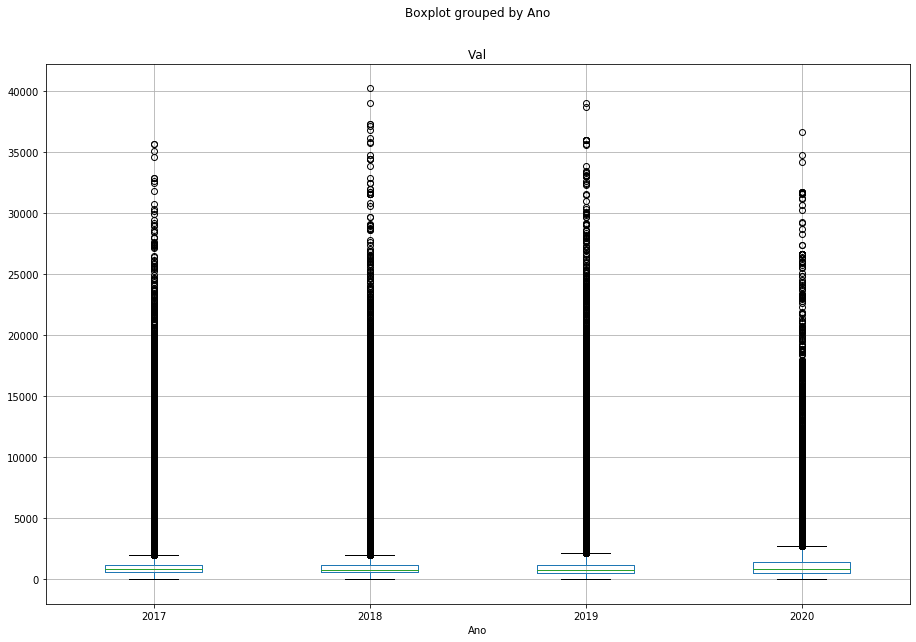

In [224]:
dataset.boxplot(by='Ano',column='Val',figsize=(15,10),showfliers=True)

/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


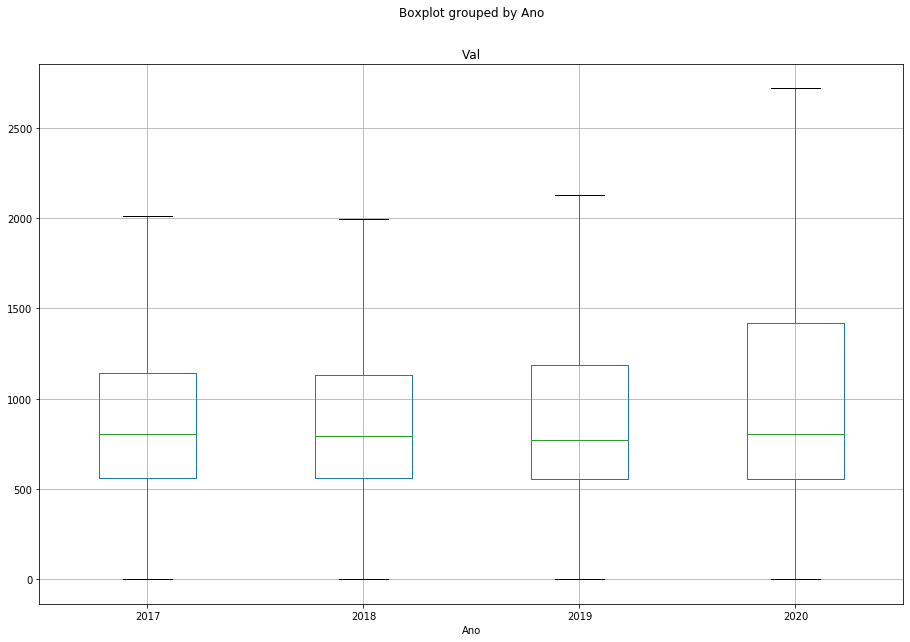

In [225]:
by_year = dataset.groupby(by='Ano')
dataset.boxplot(by='Ano',column='Val',figsize=(15,10),showfliers=False)

# Abono por ano em Alagoas

/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


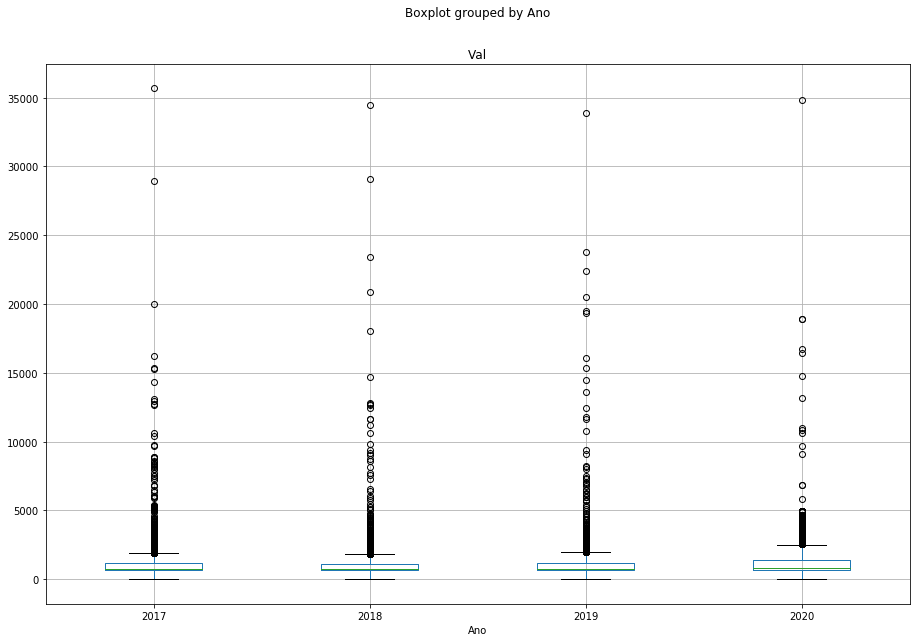

In [241]:
al_by_year = al_df.groupby(by='Ano')
al_df.boxplot(by='Ano',column='Val',figsize=(15,10),showfliers=True)


/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


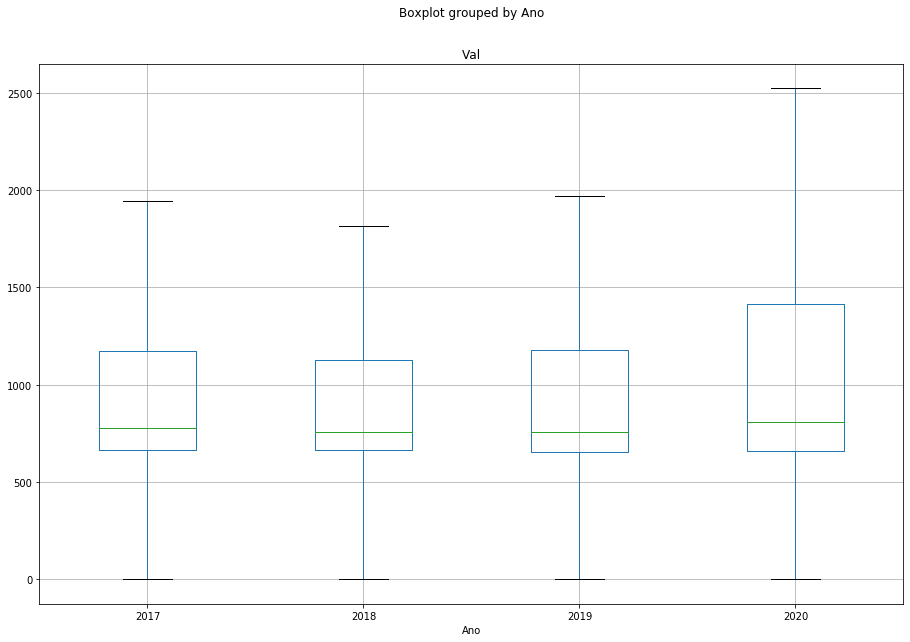

In [240]:
al_df.boxplot(by='Ano',column='Val',figsize=(15,10),showfliers=False)

# Predições

## Estamos interessados em realizar algumas predições no contexto do funcionalismo público federal no estado de Alagoas.

* Podemos capturar a subamostra das entradas de Alagoas pelo agrupamento 'by_state'

In [54]:
al_df

,index,Nome,CPF,Descrição do cargo emprego,Nível de Escolaridade,Denominação do órgão de atuação,UF da UPAG de vinculação,Denominação unidade organizacional,UF da Residência,Cidade da residência,Situação servidor,Quantidade de anos no Serviço público,Quantidade de meses no Serviço público,Ano/Mês inicial do abono de permanência,Val,Mês,Ano
0,272,ERIVALDO ALVES DOS SANTOS ...,***400694**,ENGENHEIRO,ENSINO SUPERIOR,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AL,SUP FED AGRIC PEC ABAST EST ALAGOAS-AL,AL,MACEIO,ATIVO PERMANENTE,37.0,0.0,201207.0,1544.35,02,2017
1,273,LUZIANE DE OMENA REIS ...,***255803**,AGENTE ADMINISTRATIVO,ENSINO SUPERIOR,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AL,SUP FED AGRIC PEC ABAST EST ALAGOAS-AL,AL,MACEIO,ATIVO PERMANENTE,36.0,11.0,201105.0,557.42,02,2017
2,274,ITAMARA PONTES DOS SANTOS MARQUES ...,***506714**,DATILOGRAFO,ENSINO MEDIO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AL,SUP FED AGRIC PEC ABAST EST ALAGOAS-AL,AL,MACEIO,ATIVO PERMANENTE,36.0,11.0,201101.0,536.68,02,2017
3,275,JOSETE BUARQUE DE GUSMAO ...,***619024**,AGENTE ADMINISTRATIVO,ENSINO MEDIO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AL,SUP FED AGRIC PEC ABAST EST ALAGOAS-AL,AL,MACEIO,ATIVO PERMANENTE,36.0,11.0,201112.0,549.12,02,2017
4,276,MARIA JOSE DO NASCIMENTO ALBUQUERQUE ...,***083204**,DATILOGRAFO,ENSINO MEDIO,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AL,SUP FED AGRIC PEC ABAST EST ALAGOAS-AL,AL,MACEIO,ATIVO PERMANENTE,36.0,11.0,201004.0,540.82,02,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78054,105258,MIGUEL ANGELO DE VASCONCELOS BUARQUE ...,***373304**,TECNICO DO SEGURO SOCIAL,ENSINO SUPERIOR,INSTITUTO NACIONAL DE SEGURO SOCIAL,AL,SEC DE RECURSOS HUMANOS/MACEIO,AL,MACEIÓ,ATIVO PERMANENTE,33.0,6.0,201511.0,1088.40,03,2018
78055,105259,TARCILIA MARIA TENORIO DE BRITO BARBOZA ...,***699284**,TECNICO DO SEGURO SOCIAL,ENSINO SUPERIOR,INSTITUTO NACIONAL DE SEGURO SOCIAL,AL,SEC DE RECURSOS HUMANOS/MACEIO,AL,MACEIO,ATIVO PERMANENTE,39.0,0.0,200807.0,1107.10,03,2018
78056,105260,IVANISE TAVARES DO NASCIMENTO MOREIRA ...,***818634**,TECNICO DO SEGURO SOCIAL,ENSINO SUPERIOR,INSTITUTO NACIONAL DE SEGURO SOCIAL,AL,SEC DE RECURSOS HUMANOS/MACEIO,AL,MACEIO,ATIVO PERMANENTE,35.0,8.0,200909.0,1081.09,03,2018
78057,105536,MARIA LUCIA CEDRIM DA SILVA ...,***498844**,TECNICO FEDERAL DE FINANCAS E CONTROLE,ENSINO SUPERIOR,MINISTERIO DA TRANSP. FISCAL. E CGU,DF,COORDENACAO-GERAL DE GESTAO DE PESSOAS,AL,MACEIO,ATIVO PERMANENTE,32.0,3.0,201108.0,1294.91,03,2018


In [55]:
al_df.describe()

,index,Quantidade de anos no Serviço público,Quantidade de meses no Serviço público,Ano/Mês inicial do abono de permanência,Val
count,78059.000000,78059.000000,78059.000000,78059.000000,78059.000000
mean,45000.635225,35.517839,5.220397,201188.293957,1091.202176
std,26136.235077,4.798000,3.448408,412.060687,811.805606
min,138.000000,8.000000,0.000000,200301.000000,0.000000
25%,28744.000000,33.000000,2.000000,200909.000000,659.930000
50%,36281.000000,36.000000,5.000000,201304.000000,782.130000
75%,65534.500000,38.000000,8.000000,201501.000000,1210.930000
max,106952.000000,53.000000,11.000000,202006.000000,35673.030000


## Vamos focar em predizer o valor de abono pago para uma pessoa

In [519]:
sample.columns

AttributeError: 'dict' object has no attribute 'columns'

# Separando o dataset  em 10 amostras utilizando  k-folds

In [262]:
from sklearn.model_selection import KFold
def  get_sample(df):
    sample_size = int(len(df.index)*0.1)
    sample =  df.sample(sample_size)

    kf = KFold(n_splits=10, shuffle=False)
    result = next(kf.split(sample), None)
    train = sample.iloc[result[0]]
    test = sample.iloc[result[1]]
    print('Sample_Size: ',len(sample.index),'\nTrain: ',len(train.index),'\nTest: ',len(test.index))
    return {'train':train,'test':test}

## Digamos que queremos saber qual o valor recebido, dada a descrição do emprego e a quantidade de anos  da pessoa no serviço público

In [263]:
data = al_df[['Descrição do cargo emprego','Quantidade de anos no Serviço público','Val']]

data


,Descrição do cargo emprego,Quantidade de anos no Serviço público,Val
0,ENGENHEIRO,37.0,1544.35
1,AGENTE ADMINISTRATIVO,36.0,557.42
2,DATILOGRAFO,36.0,536.68
3,AGENTE ADMINISTRATIVO,36.0,549.12
4,DATILOGRAFO,36.0,540.82
...,...,...,...
78054,TECNICO DO SEGURO SOCIAL,33.0,1088.40
78055,TECNICO DO SEGURO SOCIAL,39.0,1107.10
78056,TECNICO DO SEGURO SOCIAL,35.0,1081.09
78057,TECNICO FEDERAL DE FINANCAS E CONTROLE,32.0,1294.91


In [264]:
data['Descrição do cargo emprego'].describe()

count                                        78059
unique                                         216
top       AGENTE DE SAUDE PUBLICA                 
freq                                          7843
Name: Descrição do cargo emprego, dtype: object

# Encoding

* Temos aqui dois problemas:
* A feature da descrição do cargo está categorizada em forma de texto. Logo precisamos fazer uma codificação para um formato numérico. Podemos resolver isto facilmente gerando colunas dummy
* O valor está dado em formato contínuo e seria interessante categorizar o mesmo. Para isto usaremos a categorização por bins

## Codificando os cargos

In [273]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_encoded = pd.get_dummies(data,columns=['Descrição do cargo emprego'])

#Fazendo com que val seja a primeira coluna
val = data_encoded[['Val']]
data_encoded=data_encoded.drop(columns=['Val'])
data_encoded.insert(0,'Val',val)

data_encoded

,Val,Quantidade de anos no Serviço público,Descrição do cargo emprego_ADMINISTRADOR,Descrição do cargo emprego_ADVOGADO DA UNIAO,Descrição do cargo emprego_AGENTE ADMINISTRATIVO,Descrição do cargo emprego_AGENTE DE ATIV AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE ATIVIDADES AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE COLOCACAO,Descrição do cargo emprego_AGENTE DE HIGIENE E SEG NO TRABALHO,Descrição do cargo emprego_AGENTE DE INSP SANIT IND PROD ORIGEM ANI,...,Descrição do cargo emprego_TECNOLOGISTA,Descrição do cargo emprego_TECNOLOGISTA EM SAUDE PUBLICA,Descrição do cargo emprego_TECNOLOGO-FORMACAO,Descrição do cargo emprego_TELEFONISTA,Descrição do cargo emprego_TELEFONISTA 40 HORAS,Descrição do cargo emprego_TRATORISTA,Descrição do cargo emprego_VESTIARISTA,Descrição do cargo emprego_VIGIA,Descrição do cargo emprego_VIGILANTE,Descrição do cargo emprego_VISITADOR SANITARIO
0,1544.35,37.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,557.42,36.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,536.68,36.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,549.12,36.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,540.82,36.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78054,1088.40,33.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78055,1107.10,39.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78056,1081.09,35.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78057,1294.91,32.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Categorizando o valor

* Temos muitos outliers na coluna de valores. Para uma melhor predição, iremos parte destes outliers

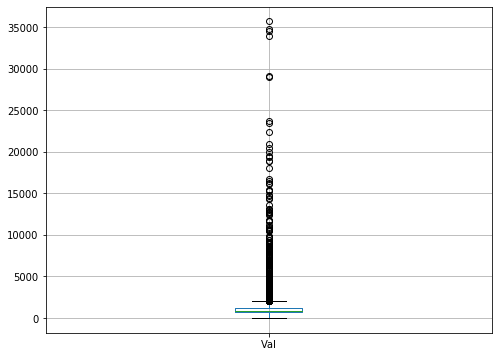

In [274]:
data_encoded[['Val']].boxplot(figsize=(8,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feebc770748>]],
      dtype=object)

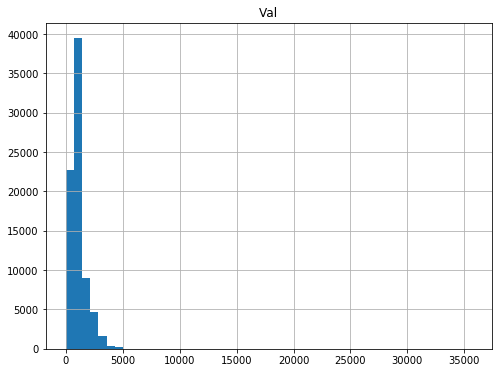

In [275]:
data_encoded[['Val']].hist(bins=50,figsize=(8,6))

In [276]:
data_encoded = remove_outliers(data_encoded,'Val');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feec7aa6588>]],
      dtype=object)

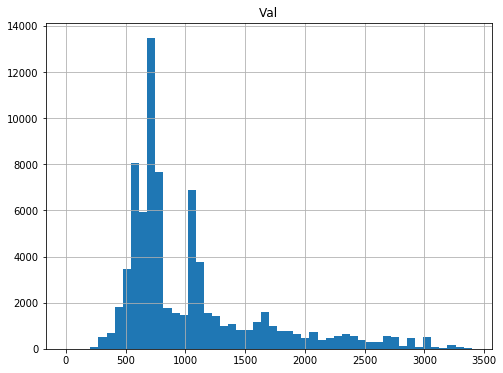

In [277]:
data_encoded[['Val']].hist(bins=50,figsize=(8,6))


# Dividindo os valores em 5 categorias (1,2,3,4 e 5)

In [278]:
data_encoded.loc[:,'Val'] = pd.cut(data_encoded['Val'],5,labels=[1,2,3,4,5])

/home/ndc/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


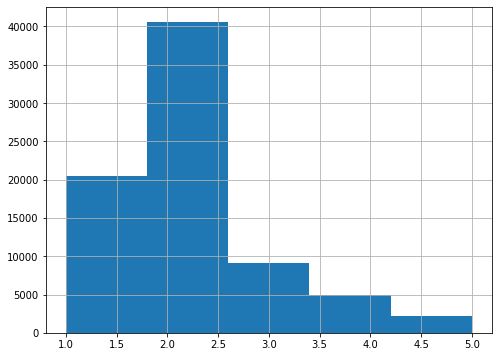

In [279]:
data_encoded['Val'].hist(bins=5,figsize=(8,6))

In [280]:
data_encoded['Val'].describe()

count     77278
unique        5
top           2
freq      40553
Name: Val, dtype: int64

* Todas as colunas foram devidamente categorizadas
* A coluna da quantidade de anos em serviço já é nativamente categorizada

In [281]:
len(data_encoded['Quantidade de anos no Serviço público'].unique())

45

# Agora podemos capturar amostras de teste e treinamento

In [282]:
sample = get_sample(data_encoded)
train = sample['train'].reset_index(drop=True)
test = sample['test'].reset_index(drop=True)

Sample_Size:  7727 
Train:  6954 
Test:  773


# Árvore de decisão

In [283]:
train

,Val,Quantidade de anos no Serviço público,Descrição do cargo emprego_ADMINISTRADOR,Descrição do cargo emprego_ADVOGADO DA UNIAO,Descrição do cargo emprego_AGENTE ADMINISTRATIVO,Descrição do cargo emprego_AGENTE DE ATIV AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE ATIVIDADES AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE COLOCACAO,Descrição do cargo emprego_AGENTE DE HIGIENE E SEG NO TRABALHO,Descrição do cargo emprego_AGENTE DE INSP SANIT IND PROD ORIGEM ANI,...,Descrição do cargo emprego_TECNOLOGISTA,Descrição do cargo emprego_TECNOLOGISTA EM SAUDE PUBLICA,Descrição do cargo emprego_TECNOLOGO-FORMACAO,Descrição do cargo emprego_TELEFONISTA,Descrição do cargo emprego_TELEFONISTA 40 HORAS,Descrição do cargo emprego_TRATORISTA,Descrição do cargo emprego_VESTIARISTA,Descrição do cargo emprego_VIGIA,Descrição do cargo emprego_VIGILANTE,Descrição do cargo emprego_VISITADOR SANITARIO
0,2,39.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,37.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,37.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,41.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,38.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,1,46.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6950,1,36.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6951,1,40.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6952,2,38.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [284]:
from sklearn import tree
x_train = train.iloc[:,1:-1].to_numpy()
y_train = train.iloc[:,0].to_numpy().reshape(-1,1)


x_test = test.iloc[:,1:-1].to_numpy()
y_test = test.iloc[:,0].to_numpy().reshape(-1,1)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf.predict(x_test)

array([2, 2, 3, 2, 1, 1, 5, 1, 1, 2, 2, 1, 2, 1, 3, 2, 1, 3, 2, 1, 2, 2,
       2, 3, 2, 1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 3, 2, 2, 1, 2, 3, 1, 2, 2,
       2, 1, 1, 2, 3, 4, 5, 2, 2, 2, 1, 4, 1, 2, 4, 1, 1, 2, 2, 5, 2, 2,
       2, 2, 2, 3, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 2, 2,
       2, 2, 2, 4, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 3, 1, 2, 2, 3, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 4, 2, 1, 1, 2, 1, 1, 3, 1, 2, 4,
       3, 2, 2, 3, 4, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 4, 2, 2, 2,
       3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 5, 2, 2, 3, 3, 1, 2, 4, 3, 2, 2, 3,
       2, 2, 2, 1, 2, 2, 5, 2, 2, 4, 1, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 3,
       2, 1, 2, 2, 2, 3, 3, 2, 1, 5, 3, 1, 2, 1, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 1, 1, 2, 2, 2, 2, 2, 2, 4, 4, 3, 3, 2, 2, 2, 4,
       2, 1, 1, 2, 3, 2, 1, 2, 4, 2, 1, 1, 1, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 2, 4, 2, 1,
       1, 2, 2, 4, 2, 3, 2, 2, 2, 1, 3, 1, 2, 2, 2,

In [285]:
train.iloc[:,1:-1]

,Quantidade de anos no Serviço público,Descrição do cargo emprego_ADMINISTRADOR,Descrição do cargo emprego_ADVOGADO DA UNIAO,Descrição do cargo emprego_AGENTE ADMINISTRATIVO,Descrição do cargo emprego_AGENTE DE ATIV AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE ATIVIDADES AGROPECUARIAS,Descrição do cargo emprego_AGENTE DE COLOCACAO,Descrição do cargo emprego_AGENTE DE HIGIENE E SEG NO TRABALHO,Descrição do cargo emprego_AGENTE DE INSP SANIT IND PROD ORIGEM ANI,Descrição do cargo emprego_AGENTE DE POL FEDERAL CLASSE ESPECIAL,...,Descrição do cargo emprego_TECNOL INF GEOGRAFICA ESTATISTICA,Descrição do cargo emprego_TECNOLOGISTA,Descrição do cargo emprego_TECNOLOGISTA EM SAUDE PUBLICA,Descrição do cargo emprego_TECNOLOGO-FORMACAO,Descrição do cargo emprego_TELEFONISTA,Descrição do cargo emprego_TELEFONISTA 40 HORAS,Descrição do cargo emprego_TRATORISTA,Descrição do cargo emprego_VESTIARISTA,Descrição do cargo emprego_VIGIA,Descrição do cargo emprego_VIGILANTE
0,39.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,37.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,46.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6950,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6951,40.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6952,38.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
train.iloc[:,1:-1]['Quantidade de anos no Serviço público'].describe()

count    6954.000000
mean       35.449382
std         4.845858
min         8.000000
25%        33.000000
50%        36.000000
75%        38.000000
max        53.000000
Name: Quantidade de anos no Serviço público, dtype: float64

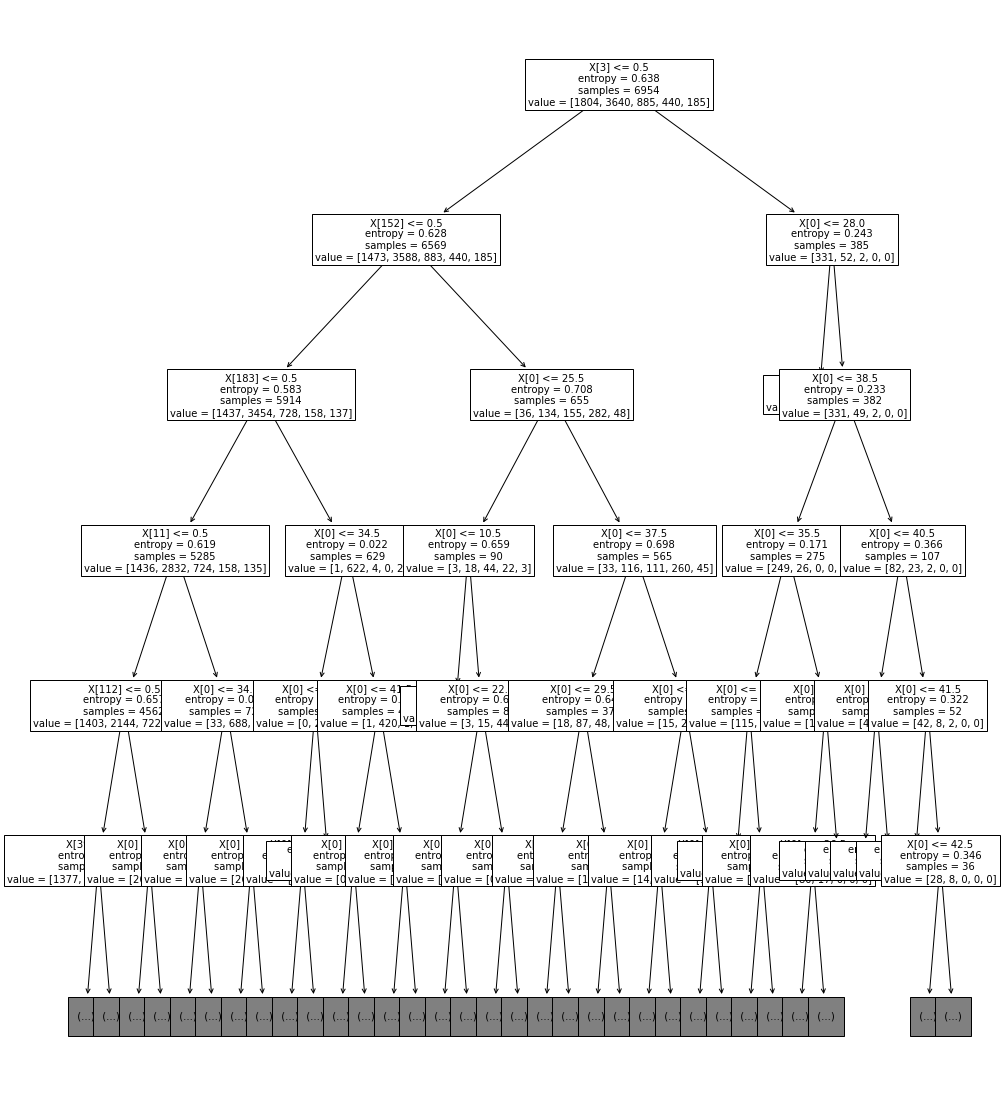

In [295]:
import graphviz 
fig, ax = plt.subplots(figsize=(16, 20))
tree.plot_tree(clf, max_depth=5, fontsize=10)
plt.show()

# Validando o modelo

In [562]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.04)


# Baixando arquivos (demora, só precisa baixar uma vez)

# Aposentadoria

# Baixando arquivos

In [5]:
apos_name_prefix='aposentados.'
aposentados_name_base = 'http://repositorio.dados.gov.br/segrt/'
months =['01','02','03','04','05','06','07','08','09','10','11','12']
years = range(2017,2021)
tables = []

cols = ['Nome','CPF','Matrícula do Servidor','Nome do órgão','Sigla do órgão','Código do órgão superior','Cargo','Classe','Padrão','Referência','Nível','Tipo de aposentadoria','Fundamentação da inatividade','Nome Diploma Legal','Data publicação do diploma legal','Ocorrência de ingresso no serviço','Data de ocorrência de ingresso no serviço público','Valor do rendimento líquido']

In [7]:
for y in years:
  for m in months:
    filename = apos_name_prefix+str(m)+str(y)+'.csv'
    url = abono_name_base+filename
    
    #try: #the .csv files goes until 2020-08
    try:
        print(url)
        urllib.request.urlretrieve(url, 'data/'+filename)        
        print(filename)
        print(url)        
        table = pd.read_csv(url, encoding = "ISO-8859-1", error_bad_lines=False,names=cols)
        tables.append(table)
    except:
        pass    
        
    #except:
    #pass   
#http://repositorio.dados.gov.br/segrt/aposentados.052017.csv

NameError: name 'apos_name_prefix' is not defined

In [6]:
def normalize_currency_format(value):
    return int(value.split(',')[0].replace('.',''))
    

In [9]:
files = os.listdir('data')
apos_dataset = pd.DataFrame()
all_dirtiness = pd.DataFrame(columns = ['table','month','year','original_size','duplicates','nans','removed','filtered_size'])
for f in files:
    if 'aposentados.' in f:
        path = 'data/'+f
        print(path)        
        table = pd.read_csv(path, encoding = "ISO-8859-1", delimiter=';', index_col=False, error_bad_lines=False,warn_bad_lines=False,names=cols);
        clean_table = clear_table(table);
        #clean_table['Mês'] = get_year_month_from_filename(f)[0]
        #clean_table['Ano'] = get_year_month_from_filename(f)[1]
        apos_dataset = apos_dataset.append(clean_table);
        #single_table_dirtness =  calculate_single_table_dirtness(table,f);
        #all_dirtiness = all_dirtiness.append(single_table_dirtness, ignore_index=True)
        
all_dirtiness = all_dirtiness[['table','month','year','original_size','duplicates','nans','removed','filtered_size']]
all_dirtiness.sort_values(['year','month'],inplace=True)

#float(apos_dataset[['Valor do rendimento líquido']])
#dataset['Val'] = dataset['Val'].map(parse_float)
#apos_dataset['Quantidade de meses no Serviço público'] = apos_dataset['Quantidade de meses no Serviço público'].map(parse_float)
#apos_dataset['Quantidade de anos no Serviço público'] = apos_dataset['Quantidade de anos no Serviço público'].map(parse_float)

data/aposentados.042017.csv
data/aposentados.022017.csv
data/aposentados.062017.csv
data/aposentados.072017.csv
data/aposentados.032017.csv
data/aposentados.052017.csv
data/aposentados.012017.csv


In [10]:
fixed = []
filtered_apos_dataset = pd.DataFrame(columns = cols)
all_vals = apos_dataset[['Valor do rendimento líquido']].to_numpy()

for val in all_vals:
    fixed.append(normalize_currency_format(val[0]))
apos_dataset[['Valor do rendimento líquido']] = fixed

apos_dataset.dropna(inplace=True)

In [11]:
apos_dataset

,Nome,CPF,Matrícula do Servidor,Nome do órgão,Sigla do órgão,Código do órgão superior,Cargo,Classe,Padrão,Referência,Nível,Tipo de aposentadoria,Fundamentação da inatividade,Nome Diploma Legal,Data publicação do diploma legal,Ocorrência de ingresso no serviço,Data de ocorrência de ingresso no serviço público,Valor do rendimento líquido
0,AMERICO TEIXEIRA DE ARAUJO ...,***802031**,130000001230,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE PORTARIA,S,III,0,0,APOSENTADORIA POR INVALIDEZ,EC41 40 I 6-A EC70 PROP,...,3042017,ADMISSAO SEM CONCURSO PUBLICO ...,24021995,3538
1,MARIA LUCIA MARTINS ALVES ...,***396741**,130000004981,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,TECNICO DE LABORATORIO,S,IV,0,0,VOLUNTARIA,EC47 3º,...,28042017,ADMISSAO SEM CONCURSO PUBLICO ...,30031983,5996
2,ANTONIO CARLOS VESPUCIO ...,***743746**,130000005594,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,VOLUNTARIA,EC47 3º,...,28042017,ADMISSAO POR CONCURSO PUBLICO ...,7051976,16100
3,ADEMIR ADAO KUKLINSKI ...,***197650**,130000010017,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE INSP SANIT IND PROD ORIGEM ANI,S,IV,0,0,VOLUNTARIA,EC47 3º,...,28042017,DECISAO JUDICIAL ...,17061977,9053
4,EUGENIO JOSE CARRARO ...,***580669**,130000010345,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,VOLUNTARIA,EC47 3º,...,25042017,DECISAO JUDICIAL ...,1091979,16637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,RAILDETE MARQUES DE OLIVEIRA DIAS ...,***921211**,572020888893,INSTITUTO NACIONAL DE SEGURO SOCIAL,INSS,23000,TECNICO DO SEGURO SOCIAL,S,IV,0,0,VOLUNTARIA,EC47 3º,...,18012017,ADMISSAO POR CONCURSO PUBLICO ...,13091985,5744
904,BENEDITO DAS GRACAS PIRES ...,***239567**,700000973429,COMANDO DA MARINHA,CM,40105,PROFESSOR DO MAGISTERIO SUPERIOR,6,,0,604,VOLUNTARIA,EC47 3º,...,19012017,ADMISSAO SEM CONCURSO PUBLICO ...,10081982,4739
905,SANDRA CRISTINA DE SOUZA RAMOS ...,***531607**,700000955897,COMANDO DA MARINHA,CM,40105,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,EC47 3º,...,18012017,ADMISSAO POR CONCURSO PUBLICO ...,19101983,3014
906,PRISCILA CORREA HENRIQUE ...,***180907**,700000968788,COMANDO DA MARINHA,CM,40105,ASSISTENTE EM CIENCIA E TECNOLOGIA,R,III,0,0,VOLUNTARIA,EC47 3º,...,10012017,ADMISSAO SEM CONCURSO PUBLICO ...,23101985,6013


# Descrevendo os tipos de aposentadoria no dataset

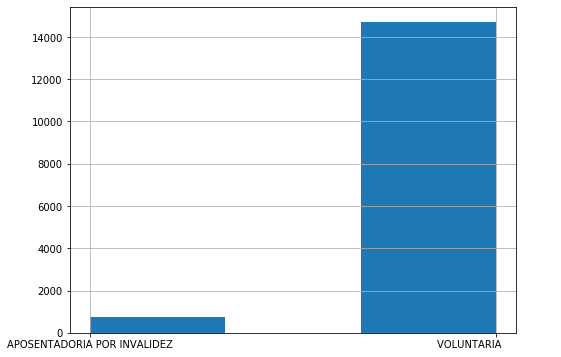

In [156]:
apos_dataset['Tipo de aposentadoria'].hist(bins=3,figsize=(8,6))

# Descrevendo a distribuição salarial das aposentadorias

# Com outliers

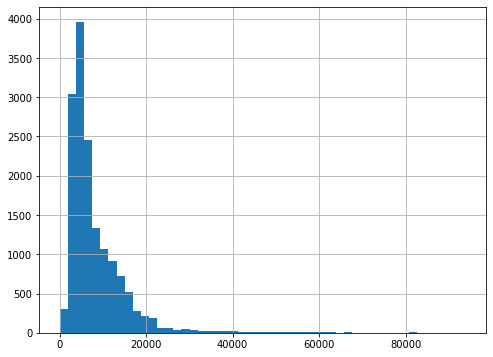

In [155]:
apos_dataset['Valor do rendimento líquido'].hist(bins=50,figsize=(8,6))

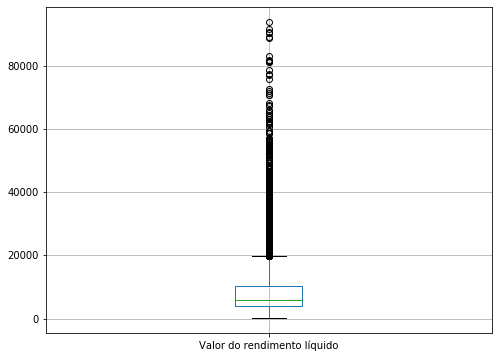

In [154]:
apos_dataset[['Valor do rendimento líquido']].boxplot(figsize=(8,6))

# Tirando alguns  outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef5387da20>]],
      dtype=object)

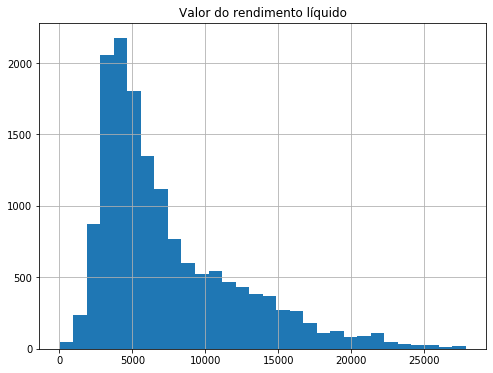

In [153]:
q = apos_dataset['Valor do rendimento líquido'].quantile(0.98)
#description
apos_no_outliers = apos_dataset[apos_dataset['Valor do rendimento líquido'] <  q]
apos_no_outliers.hist(column='Valor do rendimento líquido',bins=30,figsize=(8,6))

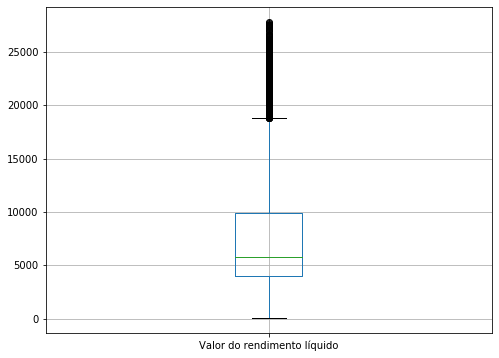

In [152]:
apos_no_outliers[['Valor do rendimento líquido']].boxplot(figsize=(8,6))

# Agrupando por órgão

# Os órgãos superiores não são listados no dataset, apenas os seus códigos são fornecidos.
Porém podemos mapear estes códigos daqui: [http://www.comprasnet.gov.br/legislacao/portarias/p02_03.htm]

E houveram alguns remapeamentos aqui: [http://www.comprasnet.gov.br/legislacao/portarias/p02_03.htm]

## Como os órgãos são organizados em faixas, vamos criar um RangeKeyDict

In [14]:
organs = {
0 : 'PRESIDÊNCIA DA REPÚBLICA',
20101 : 'PRESIDÊNCIA DA REPÚBLICA',
40108 : 'MINISTÉRIO DA CIÊNCIA E TECNOLOGIA',
40107 : 'MINISTÉRIO DA CULTURA',
40111 : 'MINISTÉRIO DO MEIO AMBIENTE',
20113 : 'MINISTÉRIO DO PLANEJAMENTO',
20000 : 'MINISTÉRIO DA JUSTIÇA',
16000 : 'MINISTÉRIO DA FAZENDA',
17000 : 'MINISTÉRIO DA FAZENDA',
15000 : 'MINISTÉRIO DA EDUCAÇÃO',
23000 : 'MINISTÉRIO DA EDUCAÇÃO',
25000 : 'MINISTÉRIO DA SAÚDE',
26000 : 'MINISTÉRIO DA SAÚDE',
26000 : 'MINISTÉRIO DO TRABALHO E EMPREGO',
32000 : 'MINISTÉRIO DE MINAS E ENERGIA',
49000: 'MINISTÉRIO DOS TRANSPORTES',
54000 : 'MINISTÉRIO DO DESENVOLVIMENTO',
40112 : 'MINISTÉRIO DA INTEGRAÇÃO NACIONAL',
40105 : 'MINISTÉRIO DA DEFESA',
28000: 'MINISTÉRIO DA INDÚSTRIA, COMÉRCIO E SERVIÇOS'
}

def get_organ(value_to_map, org_dict = organs):
    return org_dict[value_to_map]

organs[28000]

'MINISTÉRIO DA INDÚSTRIA, COMÉRCIO E SERVIÇOS'

## Vamos criar uma coluna descrevendo o órgão do servidor

In [18]:
fixed = []
for organ_code in apos_no_outliers['Código do órgão superior'].to_numpy():
    fixed.append(get_organ(organ_code))
apos_no_outliers['Ministério'] = np.array(fixed)

/home/ndc/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
apos_no_outliers

,Nome,CPF,Matrícula do Servidor,Nome do órgão,Sigla do órgão,Código do órgão superior,Cargo,Classe,Padrão,Referência,Nível,Tipo de aposentadoria,Fundamentação da inatividade,Nome Diploma Legal,Data publicação do diploma legal,Ocorrência de ingresso no serviço,Data de ocorrência de ingresso no serviço público,Valor do rendimento líquido
0,AMERICO TEIXEIRA DE ARAUJO ...,***802031**,130000001230,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE PORTARIA,S,III,0,0,APOSENTADORIA POR INVALIDEZ,EC41 40 I 6-A EC70 PROP,...,3042017,ADMISSAO SEM CONCURSO PUBLICO ...,24021995,3538
1,MARIA LUCIA MARTINS ALVES ...,***396741**,130000004981,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,TECNICO DE LABORATORIO,S,IV,0,0,VOLUNTARIA,EC47 3º,...,28042017,ADMISSAO SEM CONCURSO PUBLICO ...,30031983,5996
2,ANTONIO CARLOS VESPUCIO ...,***743746**,130000005594,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,VOLUNTARIA,EC47 3º,...,28042017,ADMISSAO POR CONCURSO PUBLICO ...,7051976,16100
3,ADEMIR ADAO KUKLINSKI ...,***197650**,130000010017,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE INSP SANIT IND PROD ORIGEM ANI,S,IV,0,0,VOLUNTARIA,EC47 3º,...,28042017,DECISAO JUDICIAL ...,17061977,9053
4,EUGENIO JOSE CARRARO ...,***580669**,130000010345,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,VOLUNTARIA,EC47 3º,...,25042017,DECISAO JUDICIAL ...,1091979,16637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,RAILDETE MARQUES DE OLIVEIRA DIAS ...,***921211**,572020888893,INSTITUTO NACIONAL DE SEGURO SOCIAL,INSS,23000,TECNICO DO SEGURO SOCIAL,S,IV,0,0,VOLUNTARIA,EC47 3º,...,18012017,ADMISSAO POR CONCURSO PUBLICO ...,13091985,5744
904,BENEDITO DAS GRACAS PIRES ...,***239567**,700000973429,COMANDO DA MARINHA,CM,40105,PROFESSOR DO MAGISTERIO SUPERIOR,6,,0,604,VOLUNTARIA,EC47 3º,...,19012017,ADMISSAO SEM CONCURSO PUBLICO ...,10081982,4739
905,SANDRA CRISTINA DE SOUZA RAMOS ...,***531607**,700000955897,COMANDO DA MARINHA,CM,40105,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,EC47 3º,...,18012017,ADMISSAO POR CONCURSO PUBLICO ...,19101983,3014
906,PRISCILA CORREA HENRIQUE ...,***180907**,700000968788,COMANDO DA MARINHA,CM,40105,ASSISTENTE EM CIENCIA E TECNOLOGIA,R,III,0,0,VOLUNTARIA,EC47 3º,...,10012017,ADMISSAO SEM CONCURSO PUBLICO ...,23101985,6013


In [55]:
by_organ = apos_no_outliers.groupby('Nome do órgão')

/home/ndc/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


Nome do órgão
ADVOCACIA-GERAL DA UNIAO                    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
AGENCIA BRASILEIRA DE INTELIGENCIA          [[AxesSubplot(0.125,0.125;0.775x0.755)]]
AGENCIA NAC PETROLEO GAS NAT BIOCOMBUSTI    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
AGENCIA NAC. DE TRANSPORTES AQUAVIARIOS     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
AGENCIA NAC. DE TRANSPORTES TERRESTRES      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
                                                              ...                   
UNIVERSIDADE FEDERAL DO RIO GRANDE          [[AxesSubplot(0.125,0.125;0.775x0.755)]]
UNIVERSIDADE FEDERAL DO SUL DA BAHIA        [[AxesSubplot(0.125,0.125;0.775x0.755)]]
UNIVERSIDADE FEDERAL FLUMINENSE             [[AxesSubplot(0.125,0.125;0.775x0.755)]]
UNIVERSIDADE FEDERAL RURAL DA AMAZONIA      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
UNIVERSIDADE FEDERAL RURAL DE PERNAMBUCO    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Length: 174, dtype: object

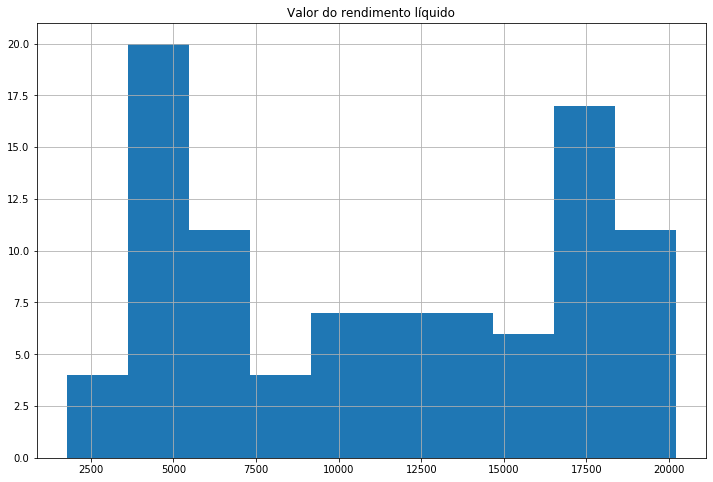

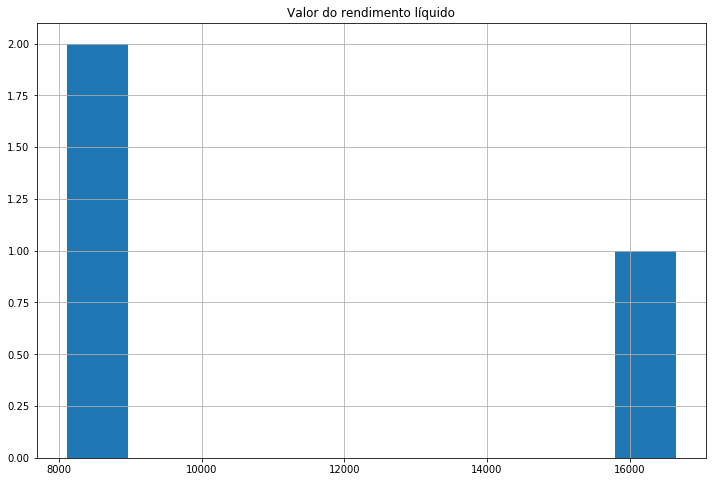

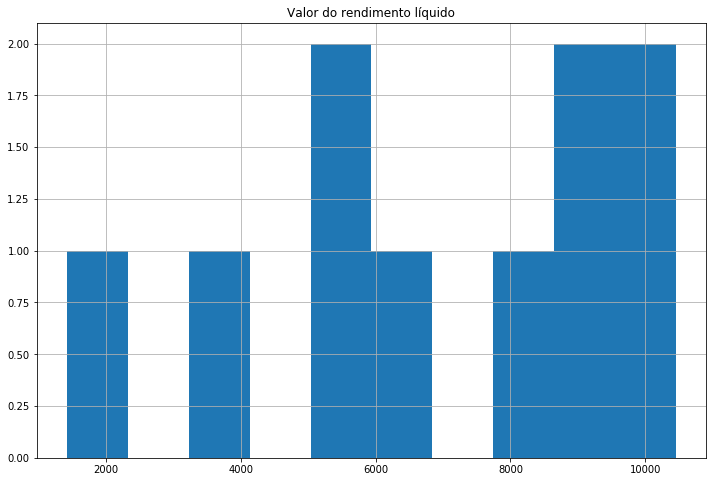

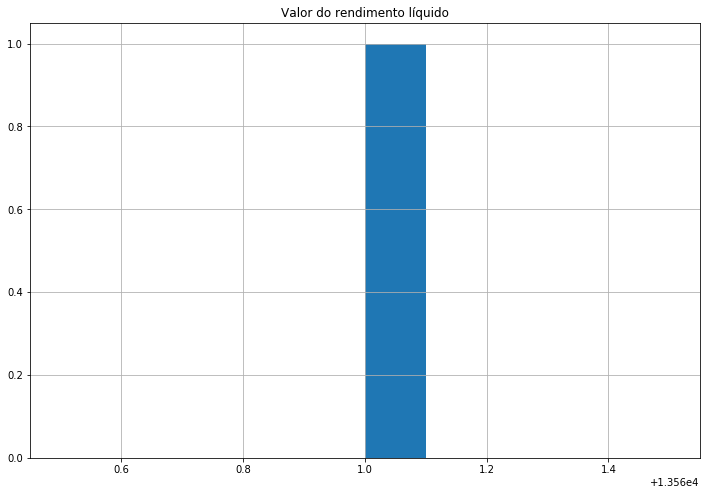

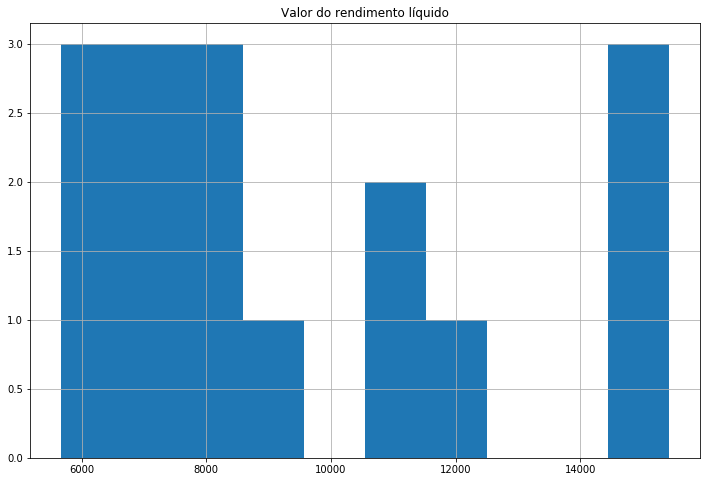

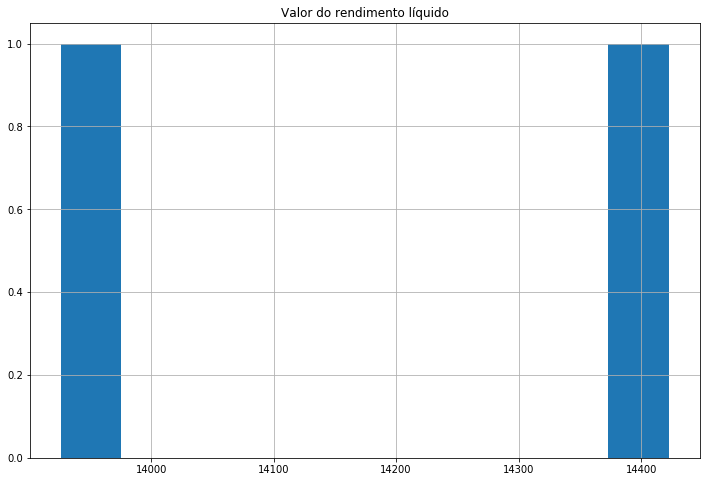

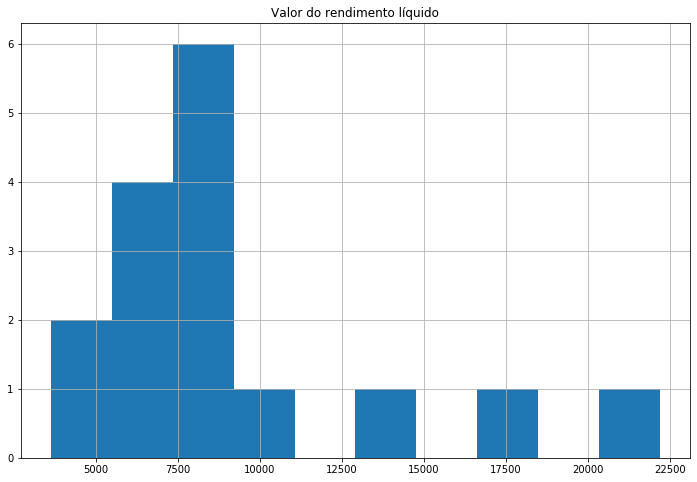

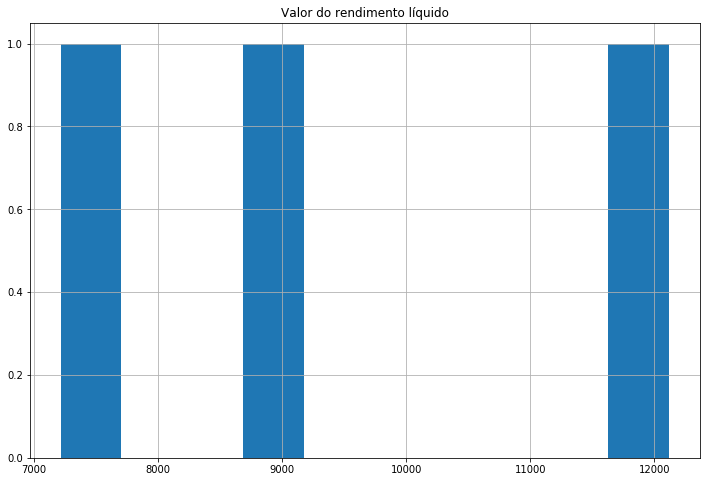

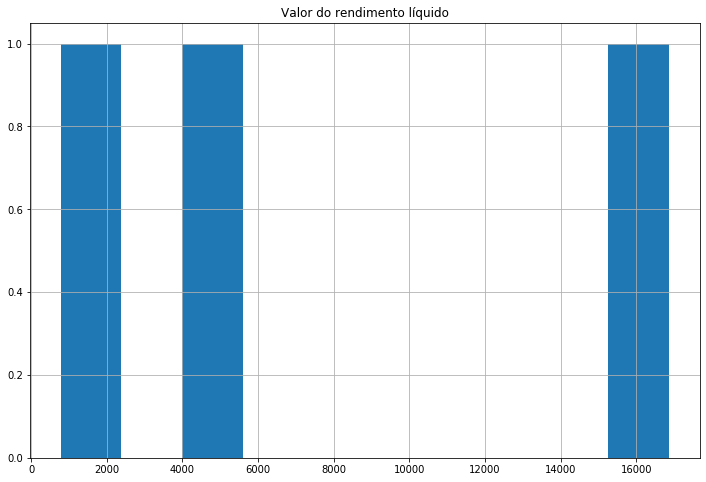

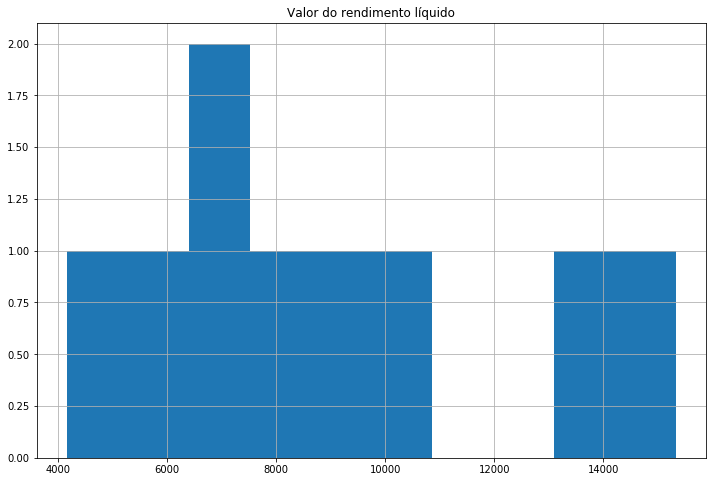

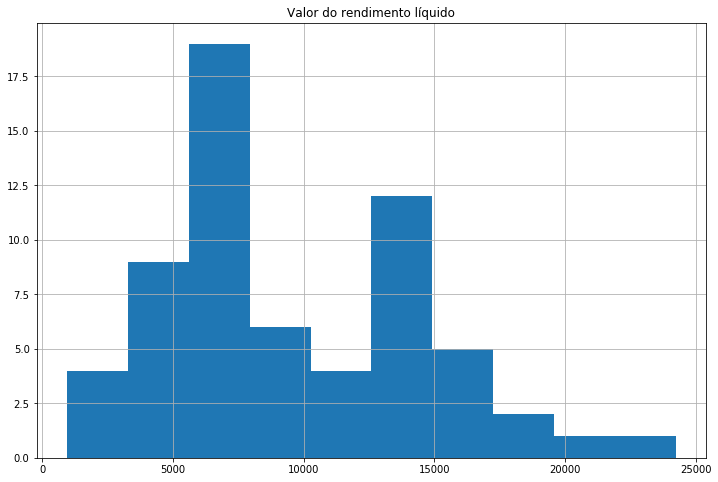

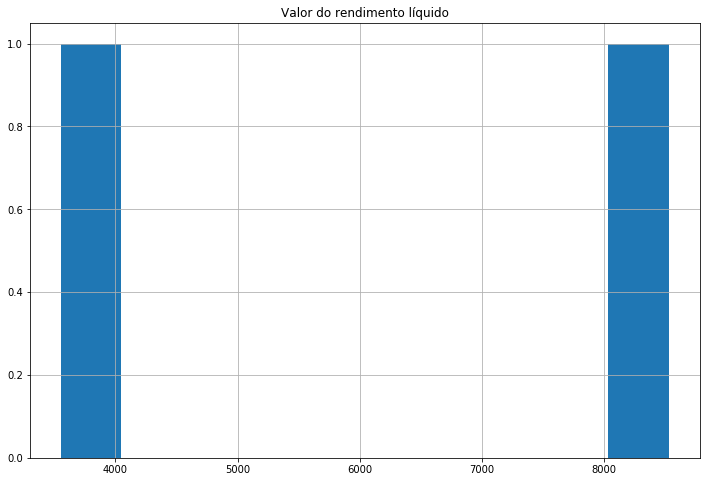

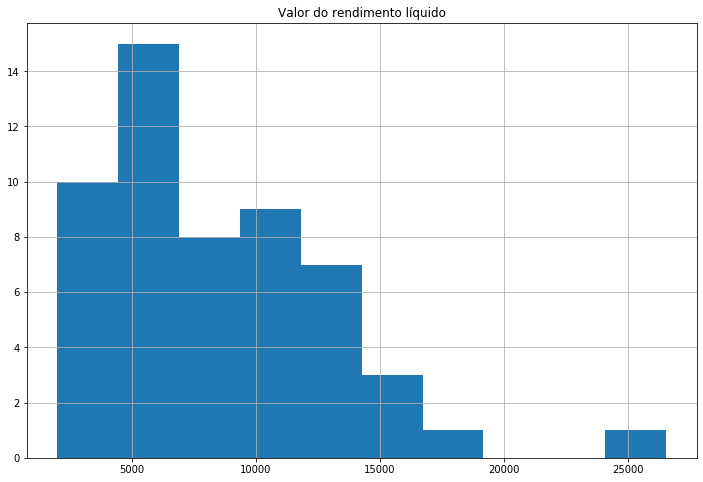

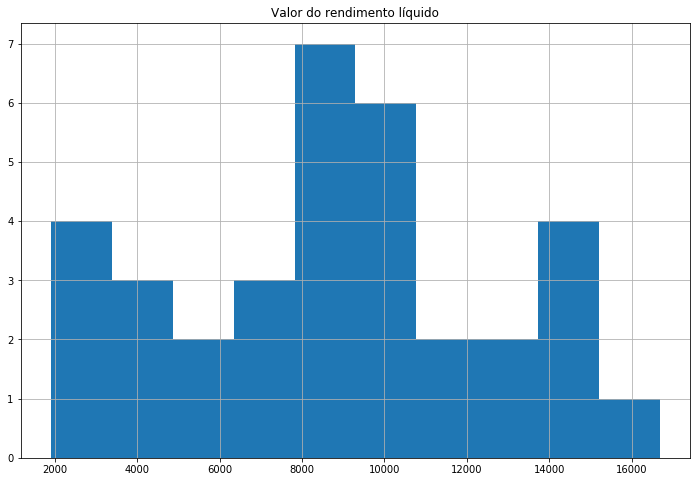

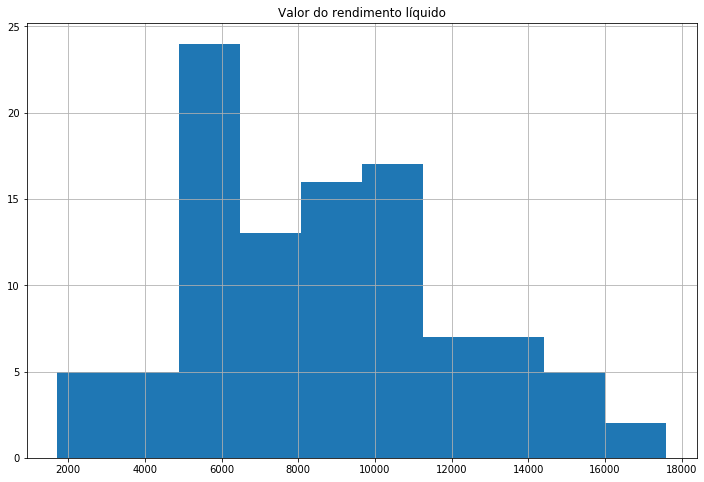

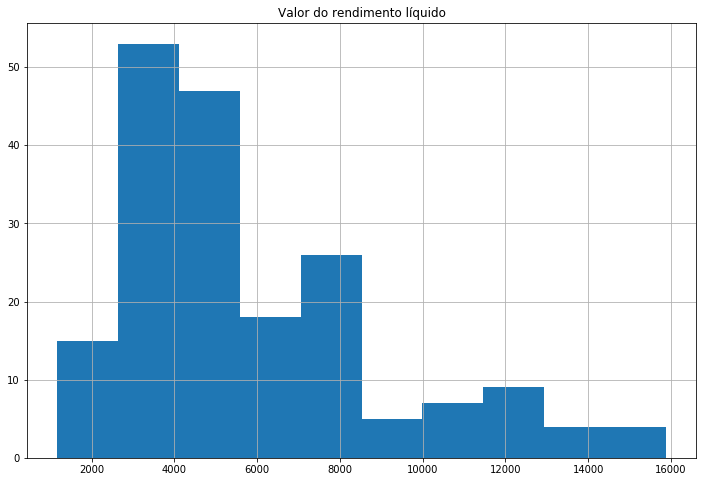

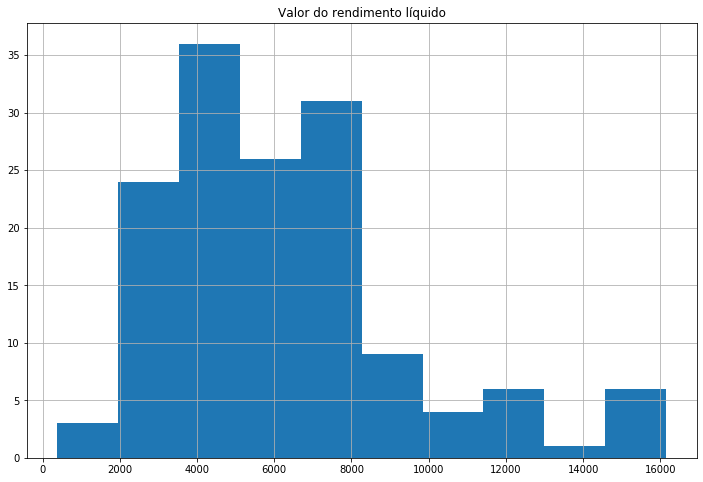

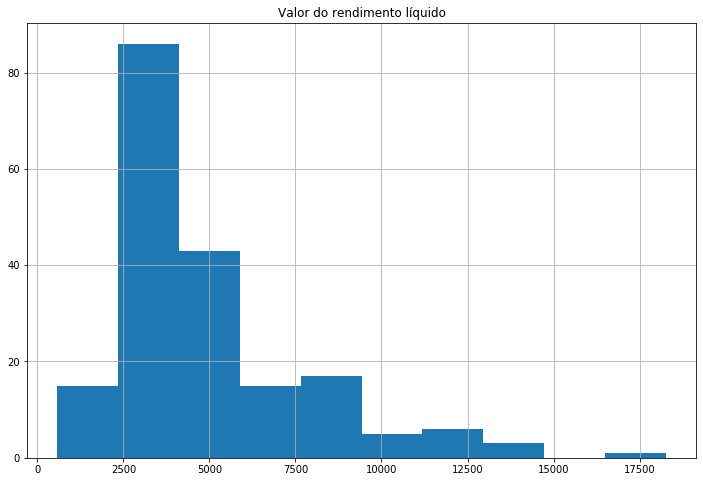

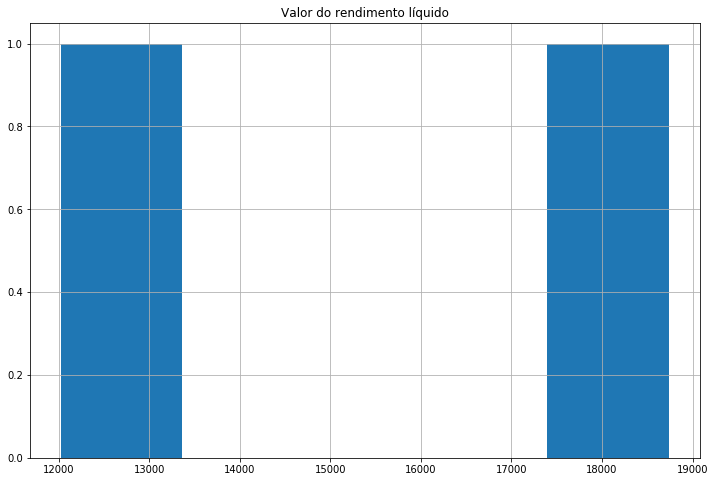

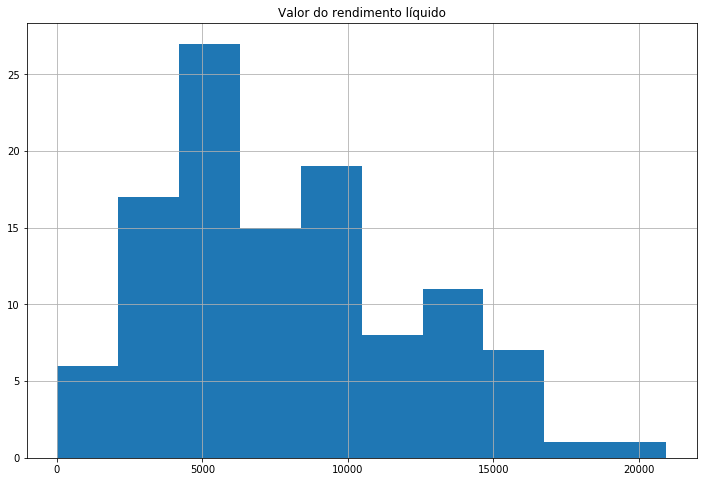

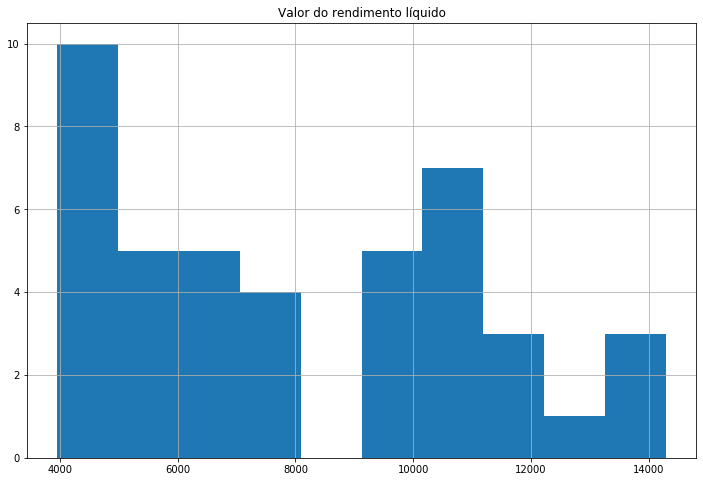

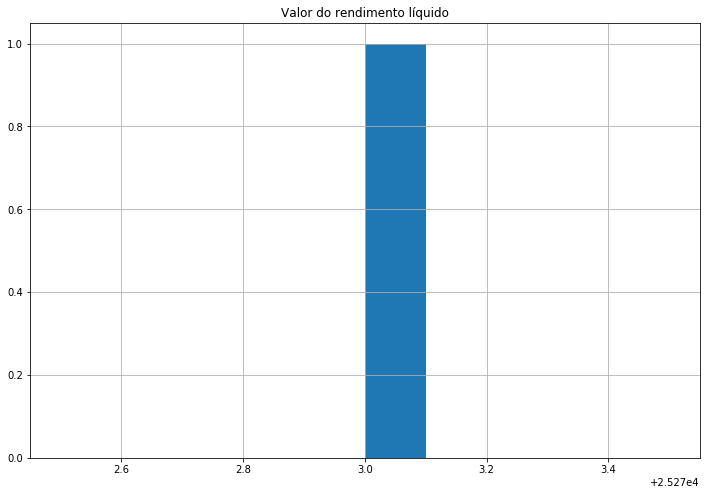

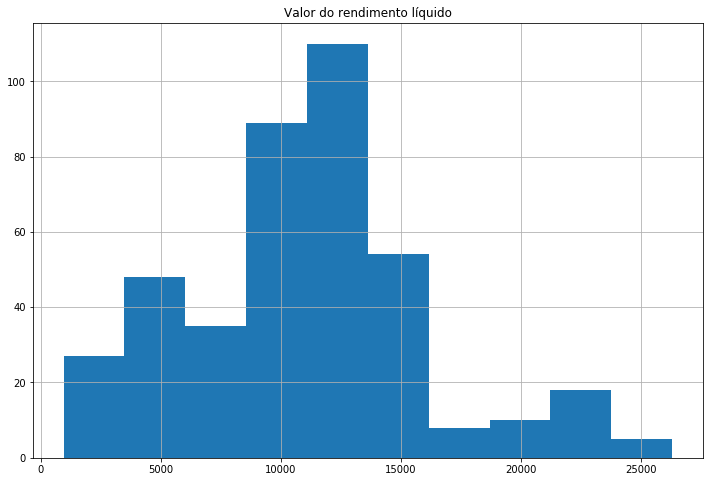

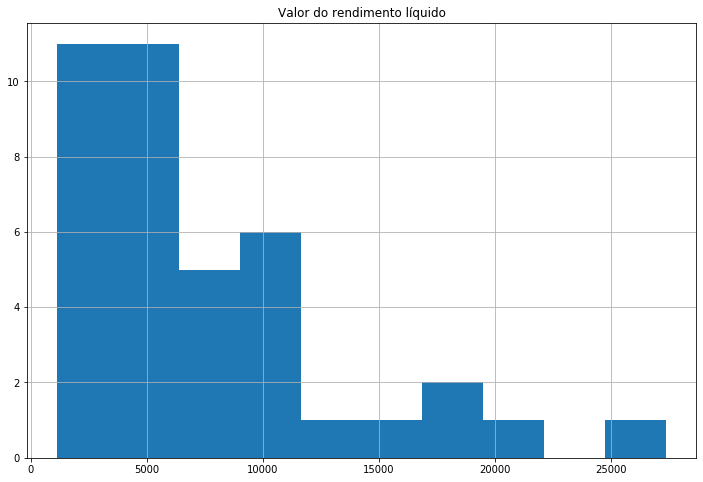

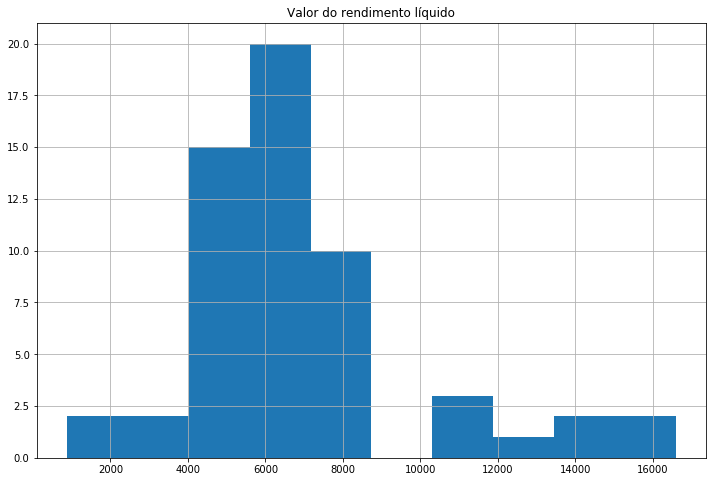

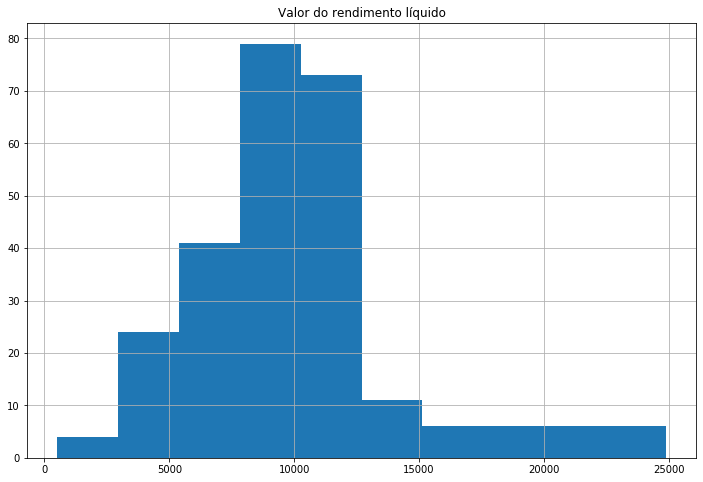

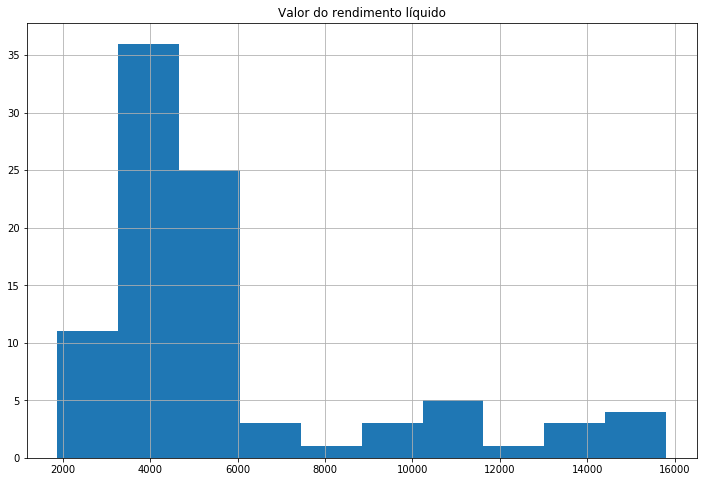

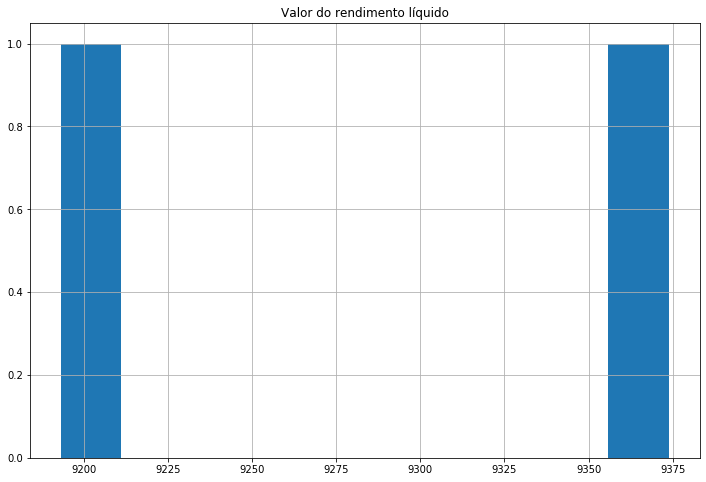

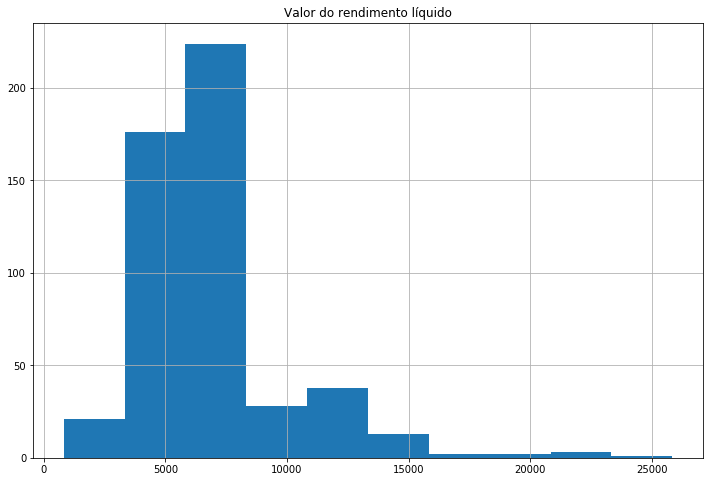

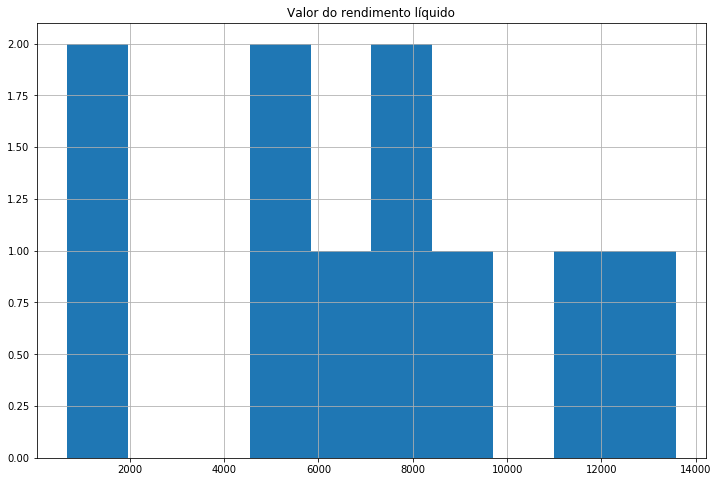

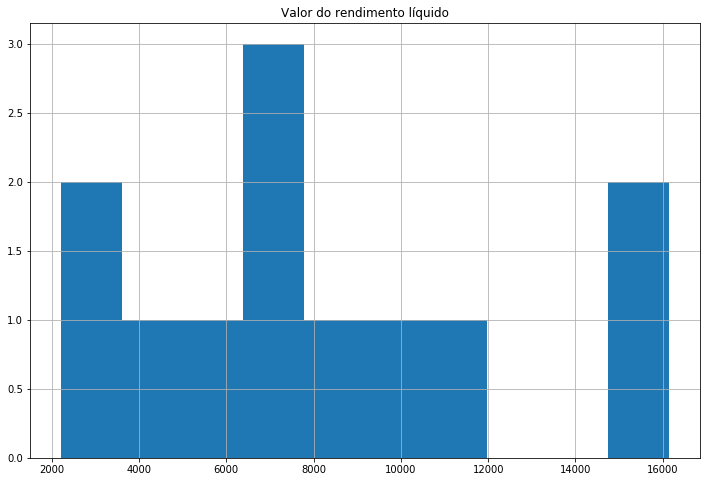

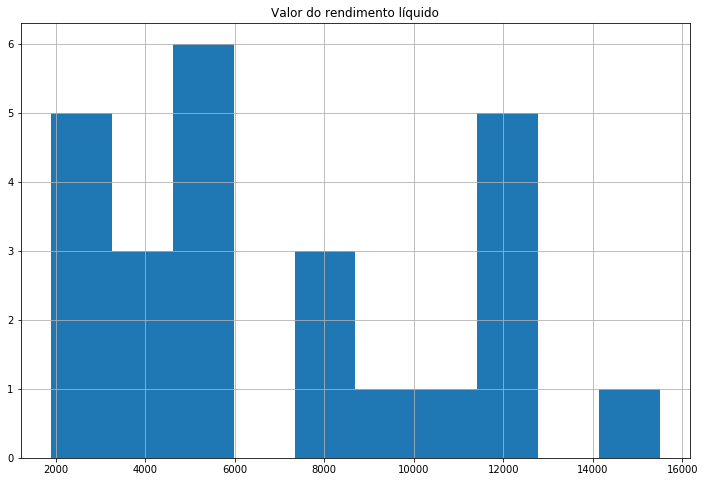

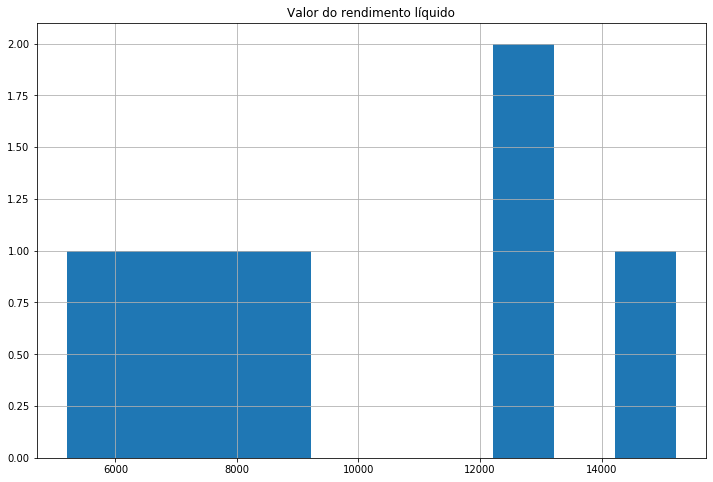

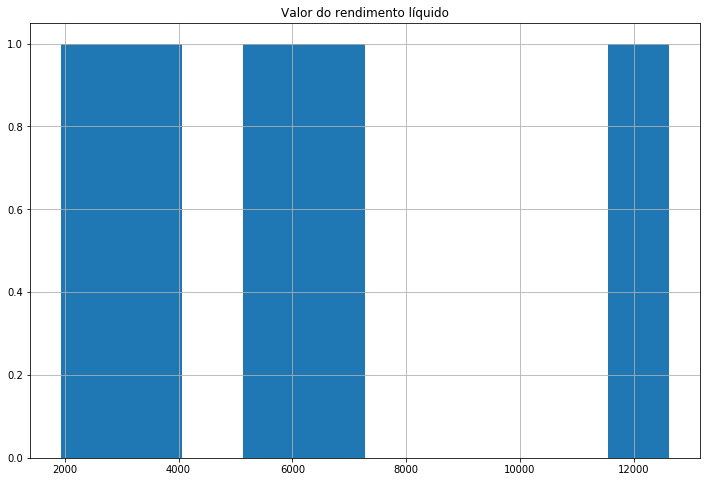

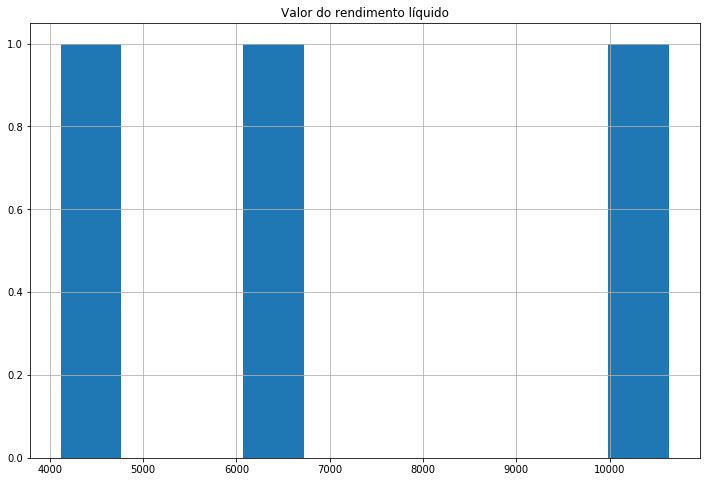

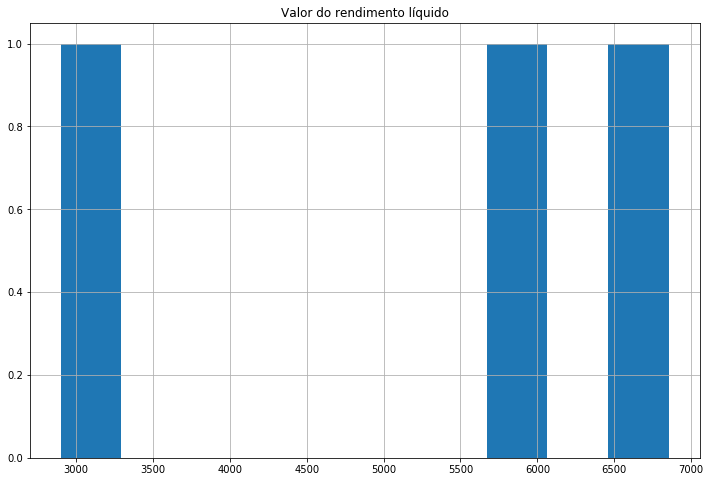

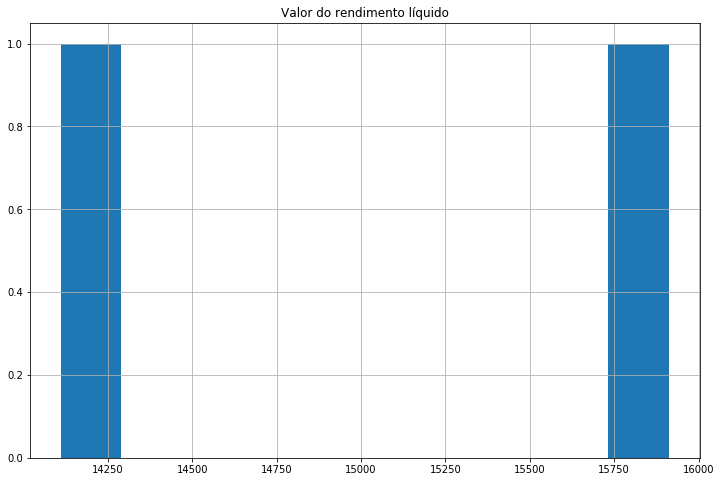

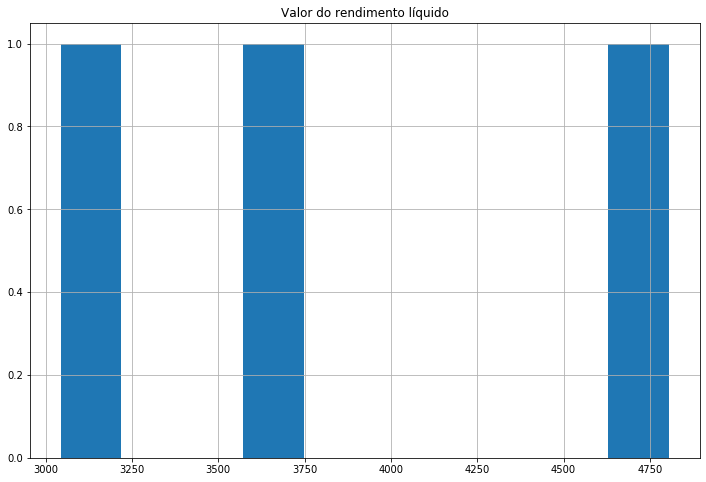

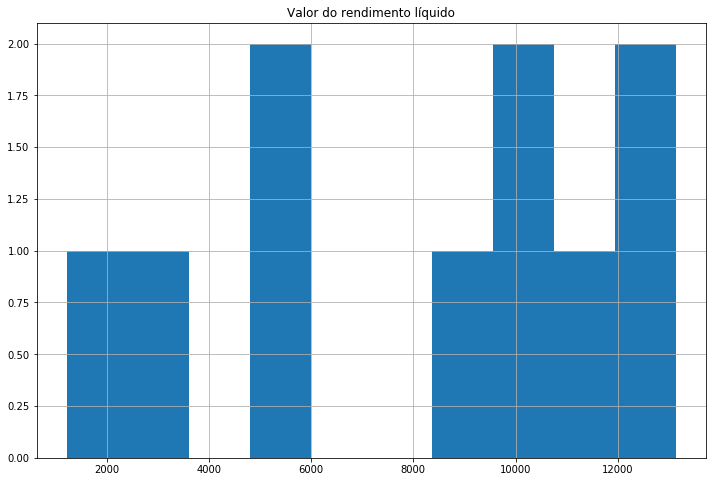

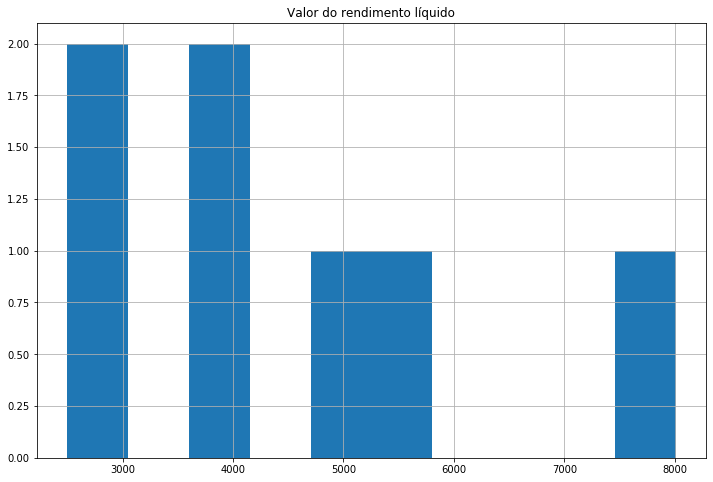

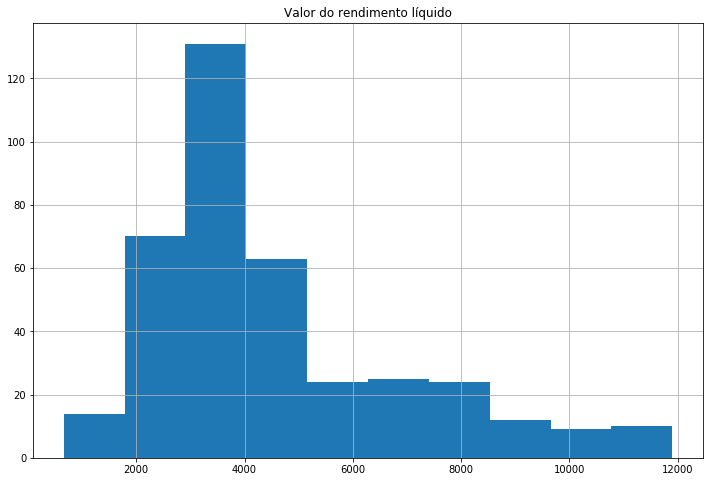

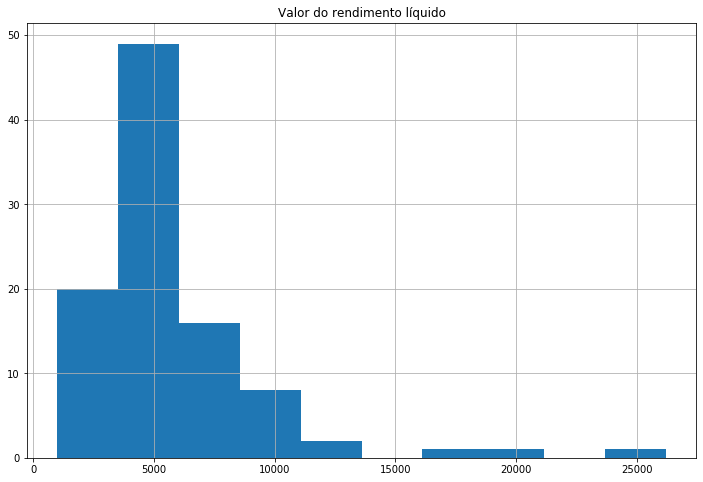

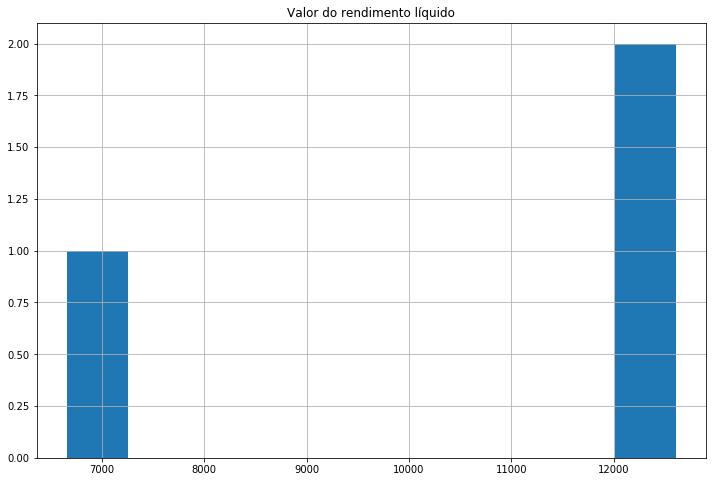

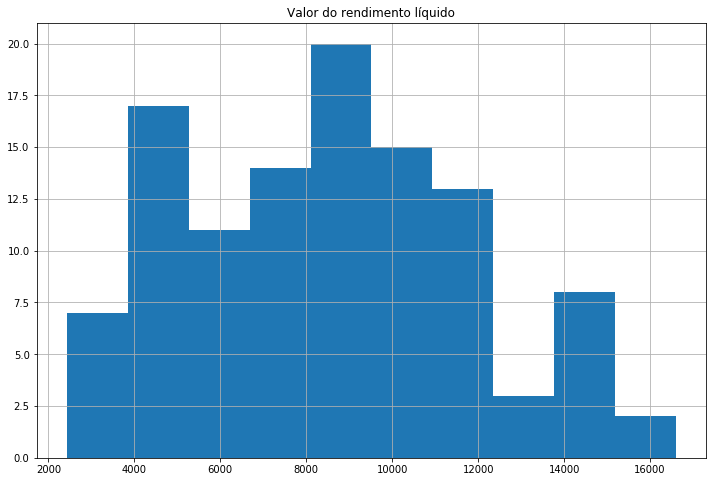

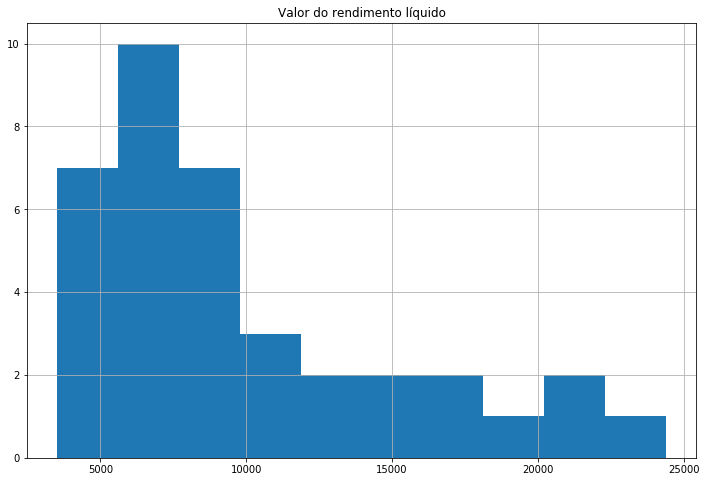

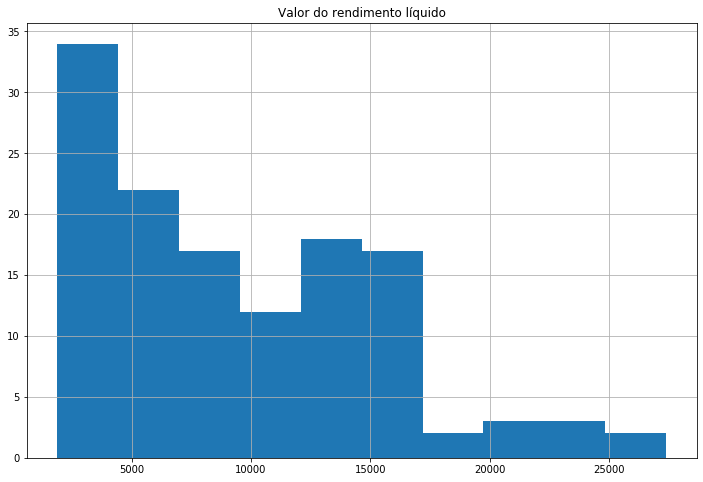

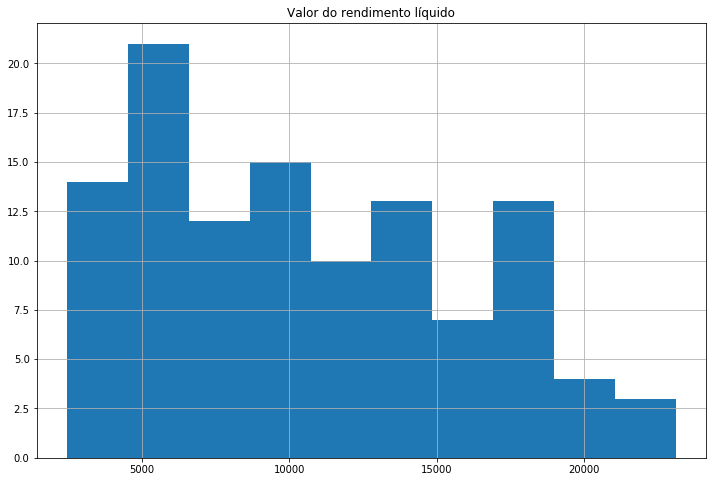

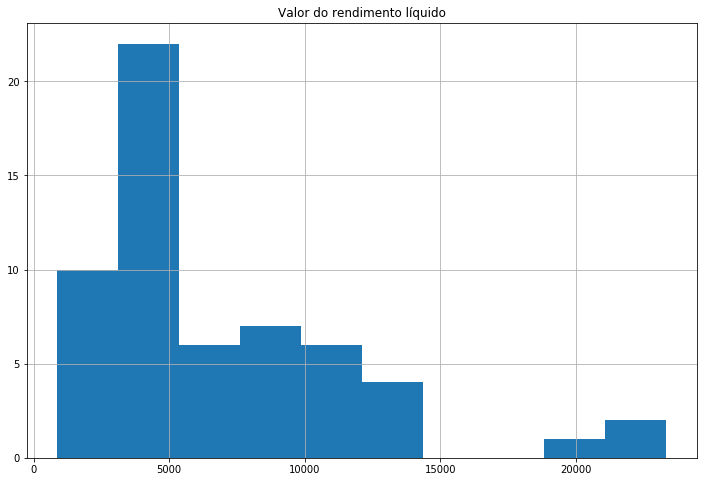

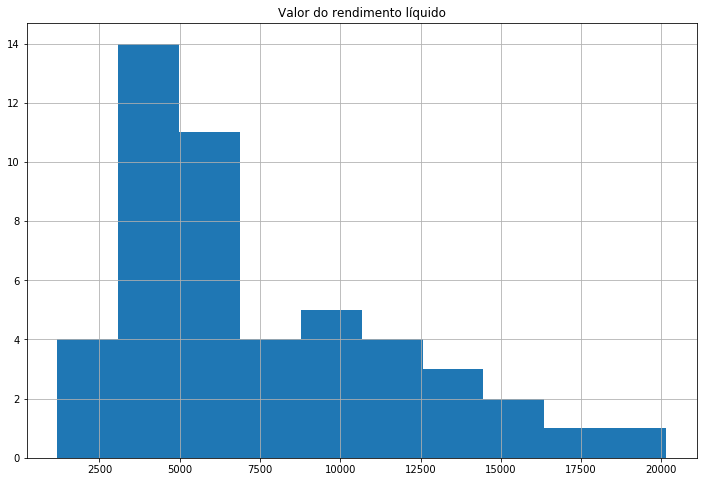

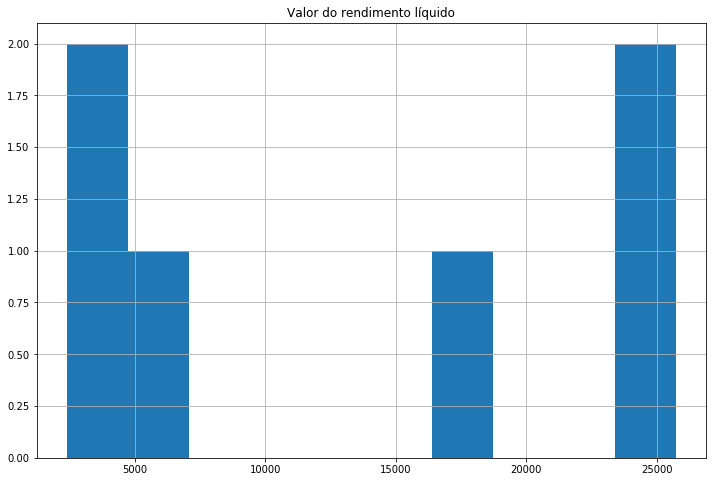

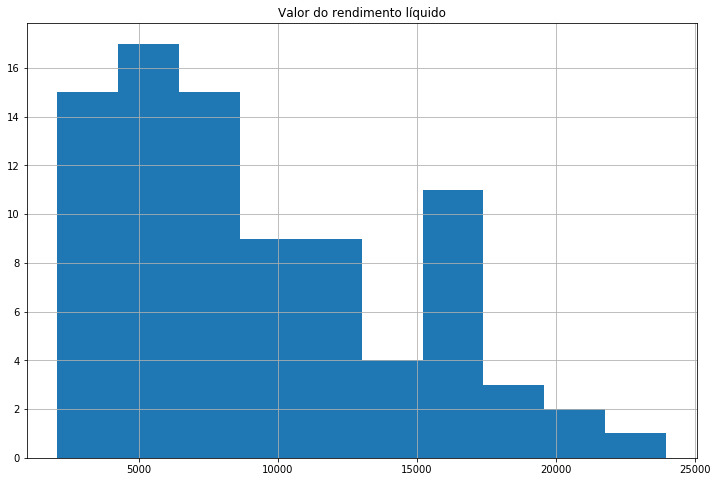

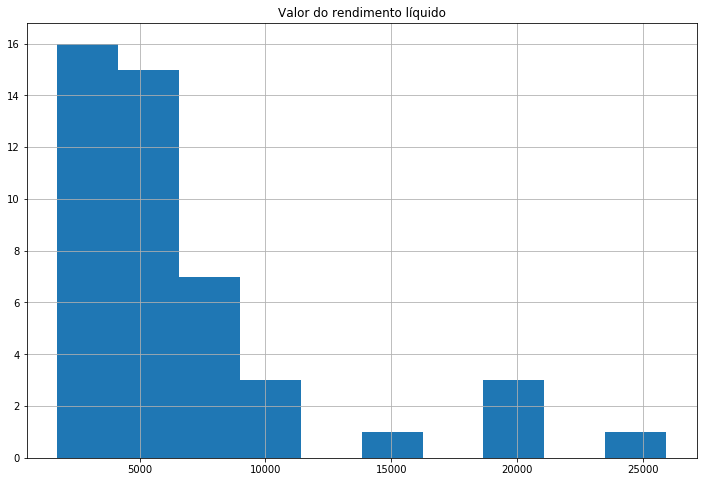

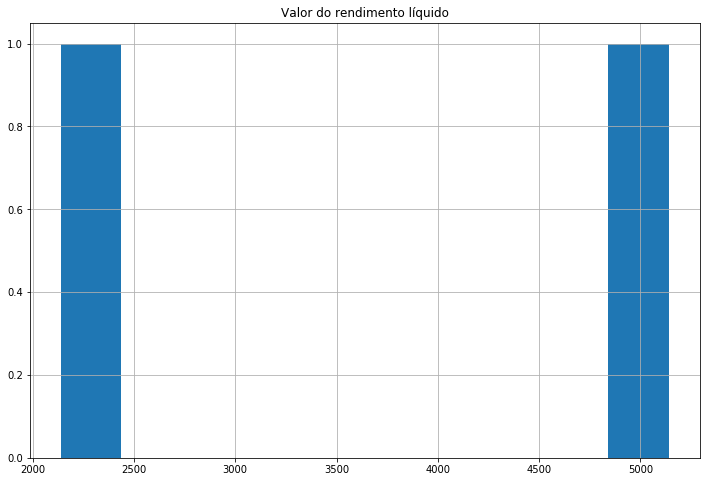

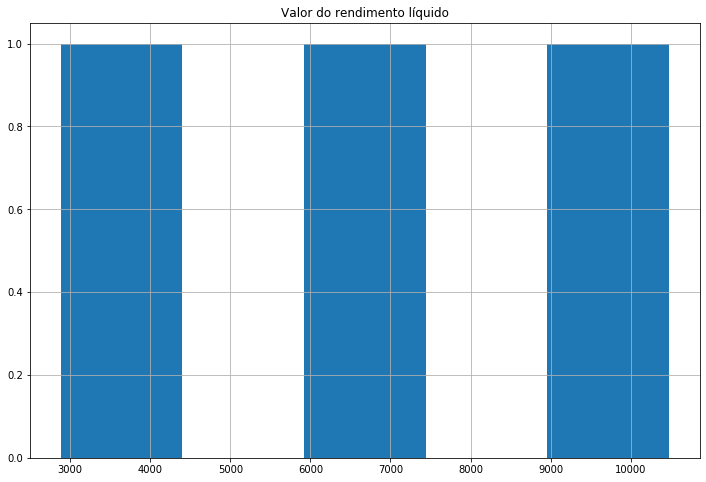

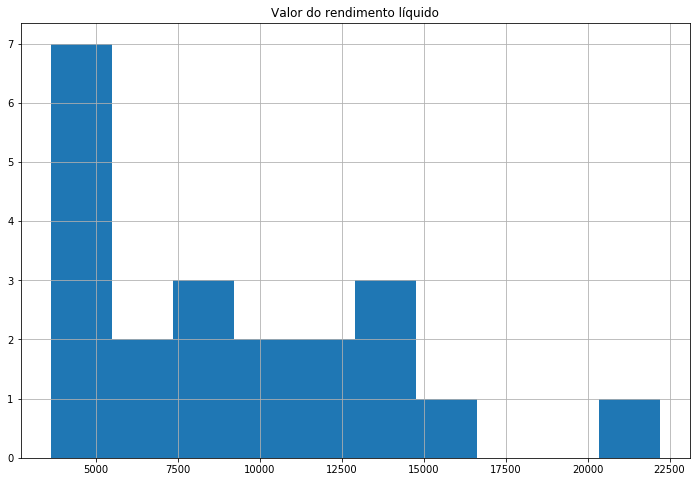

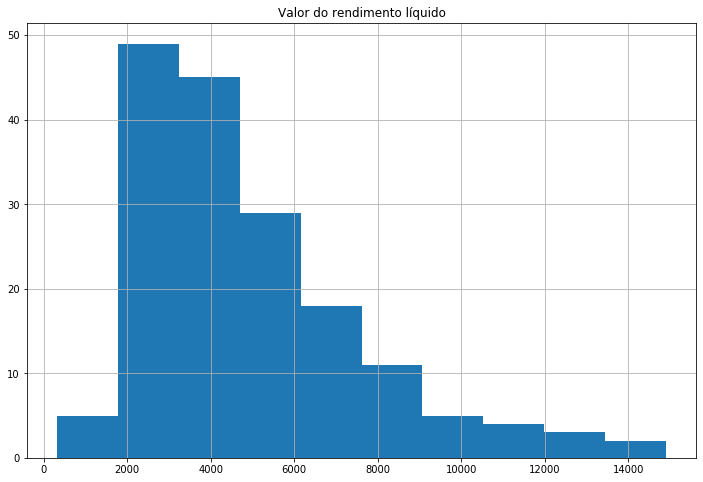

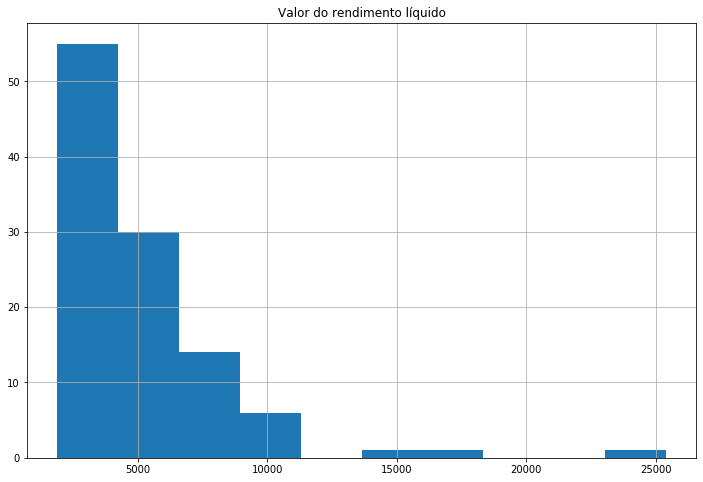

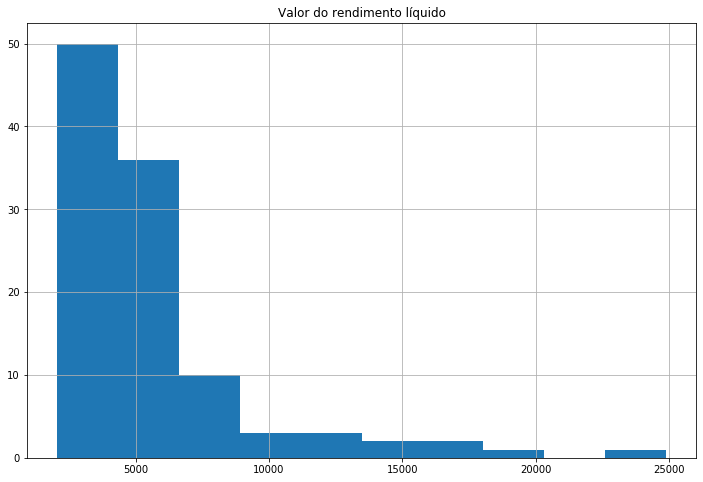

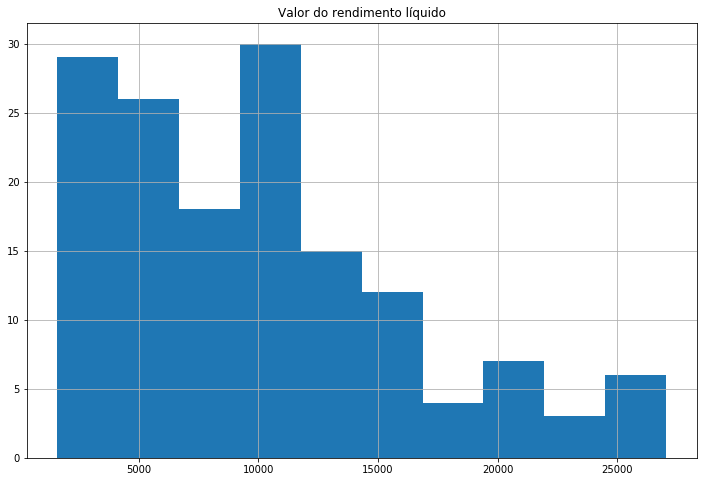

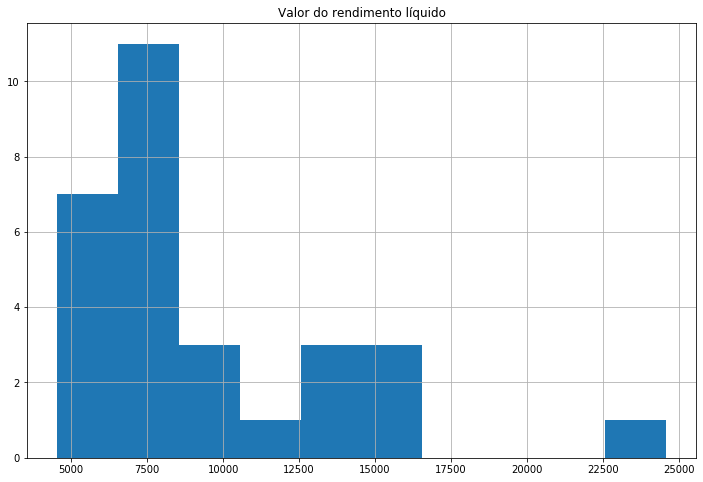

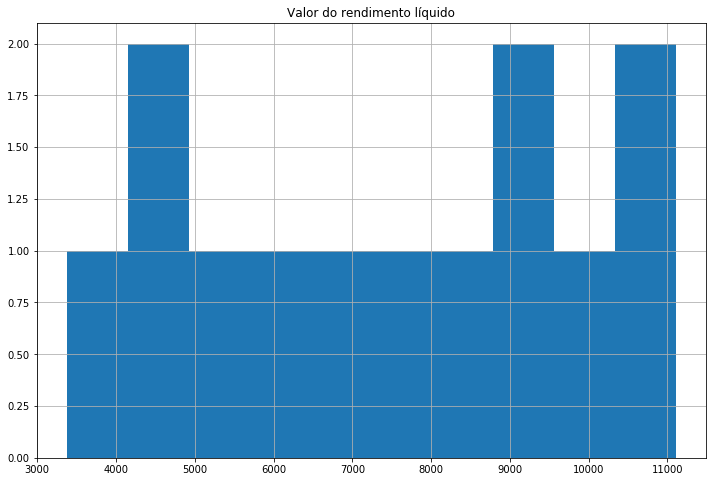

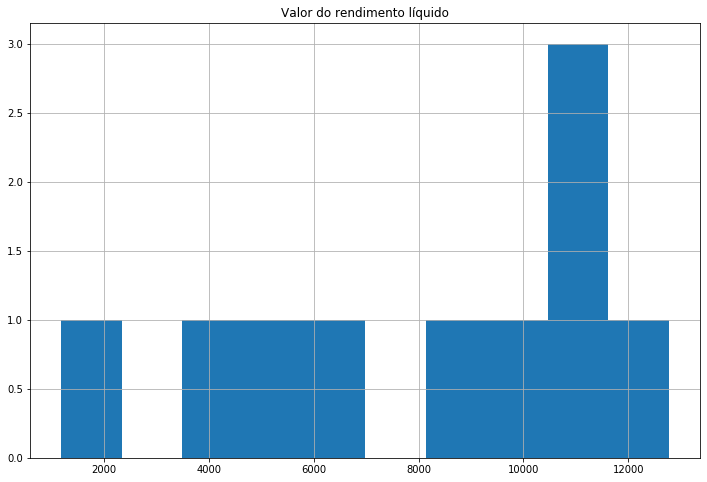

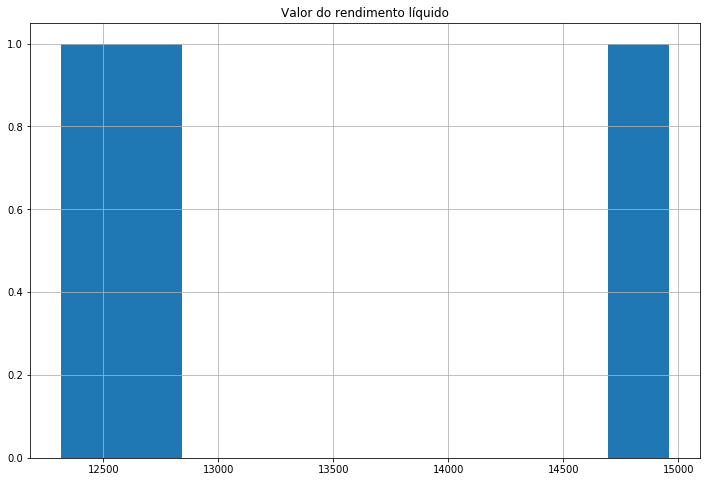

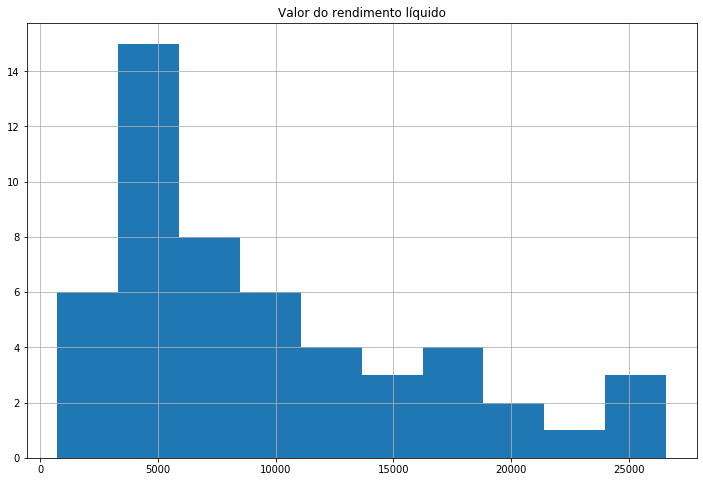

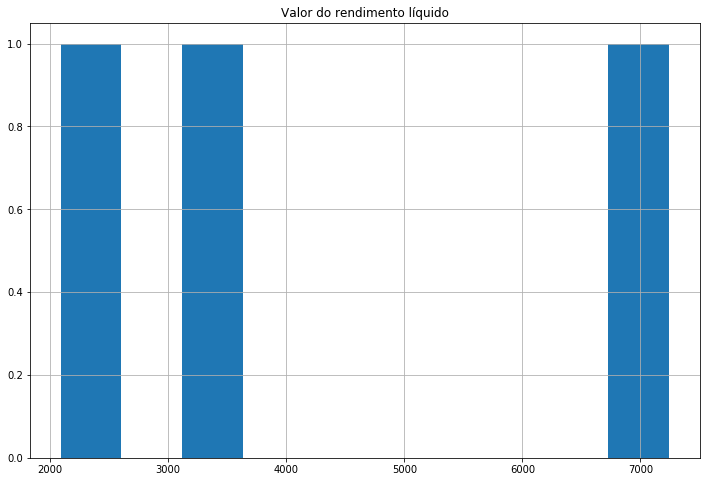

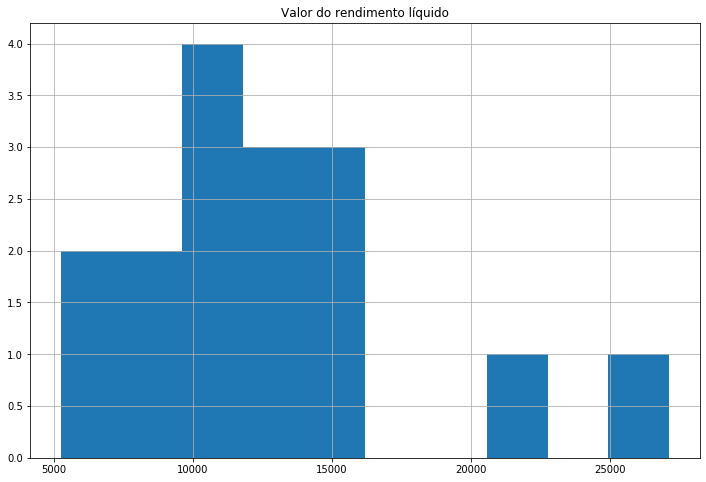

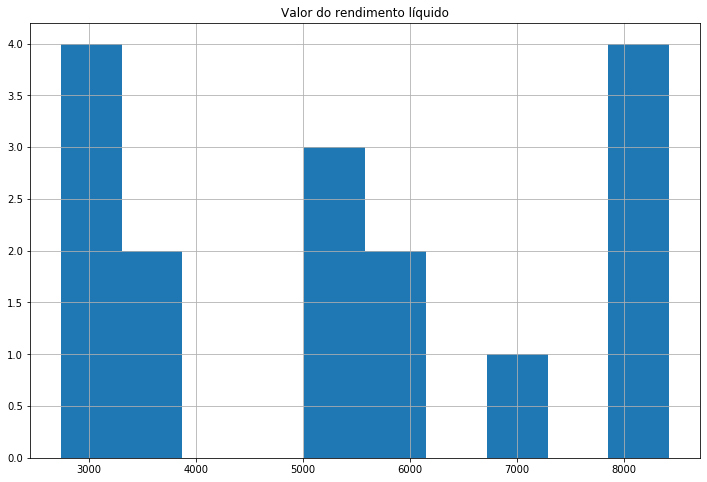

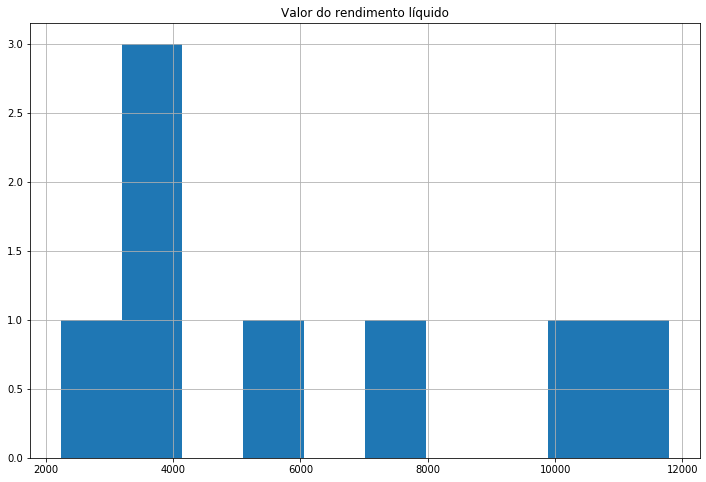

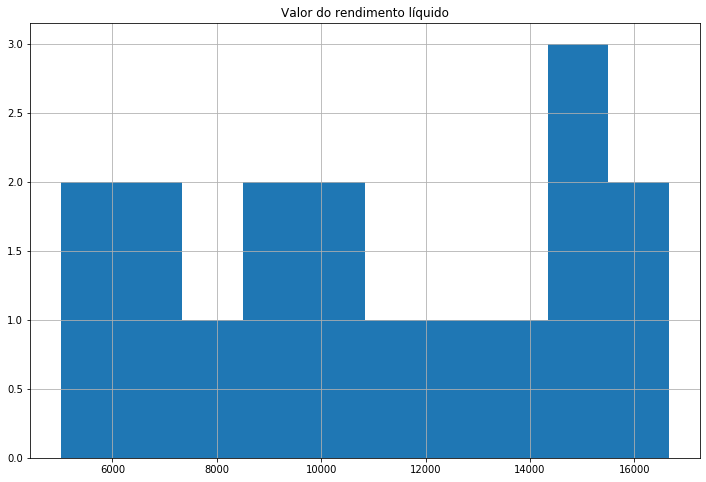

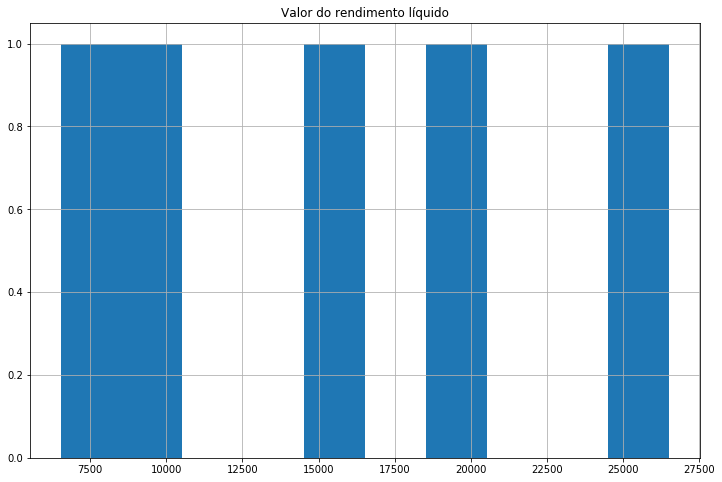

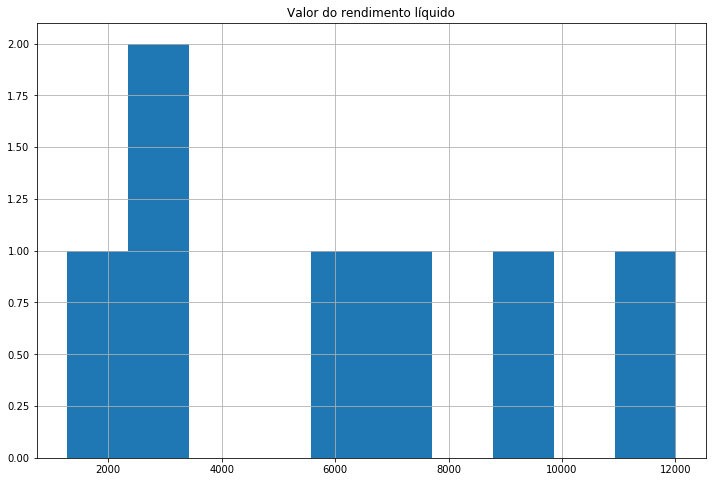

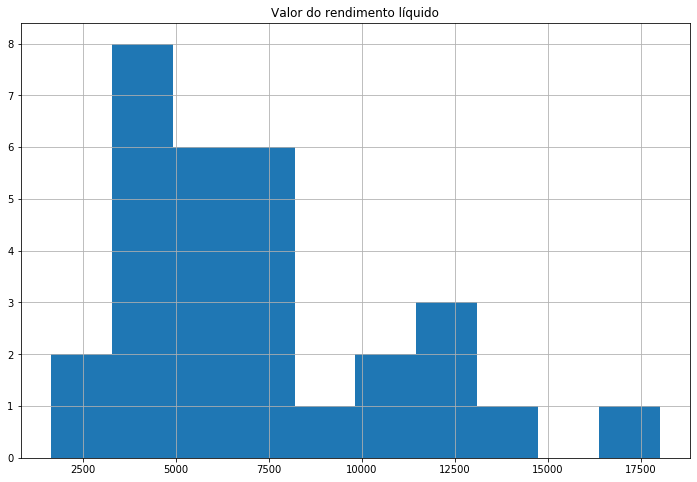

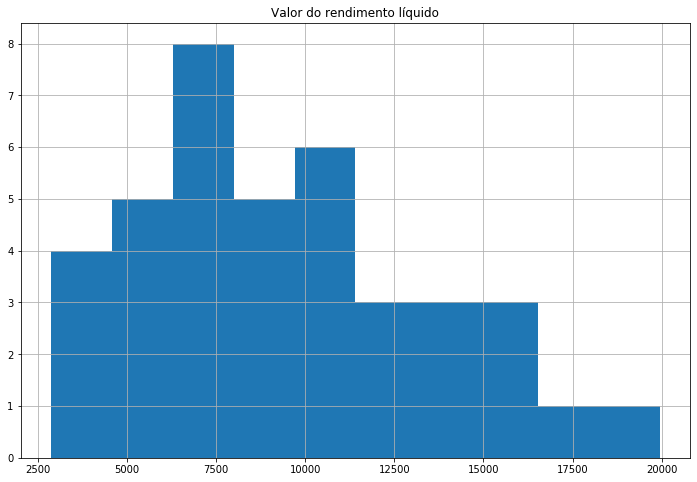

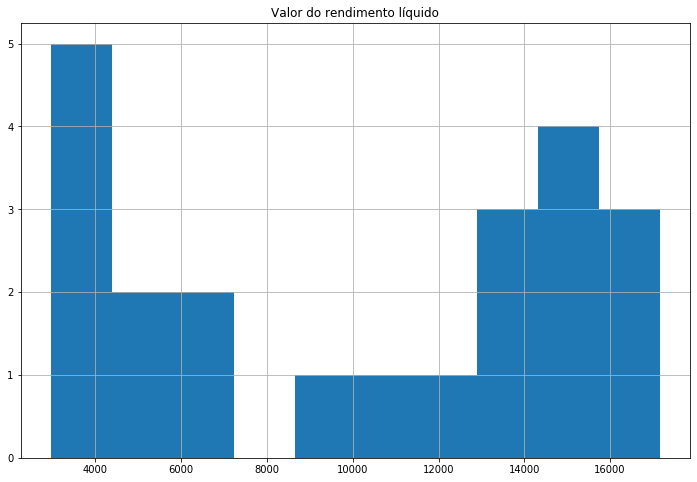

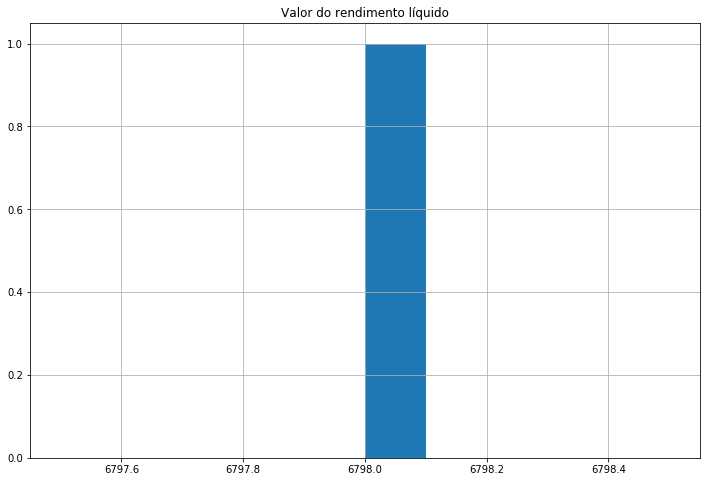

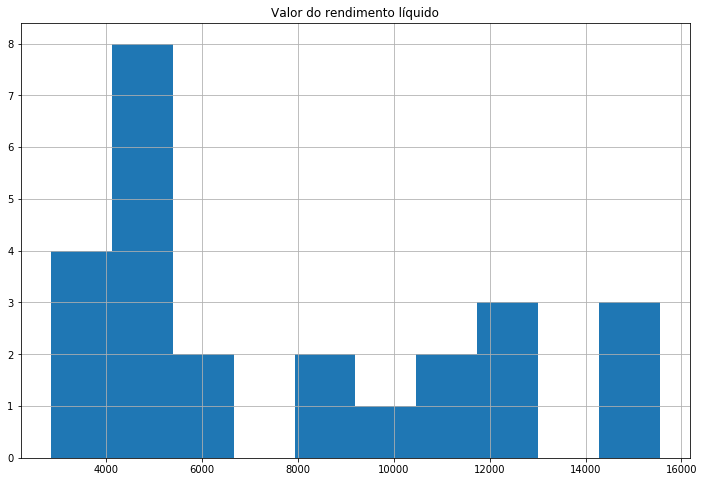

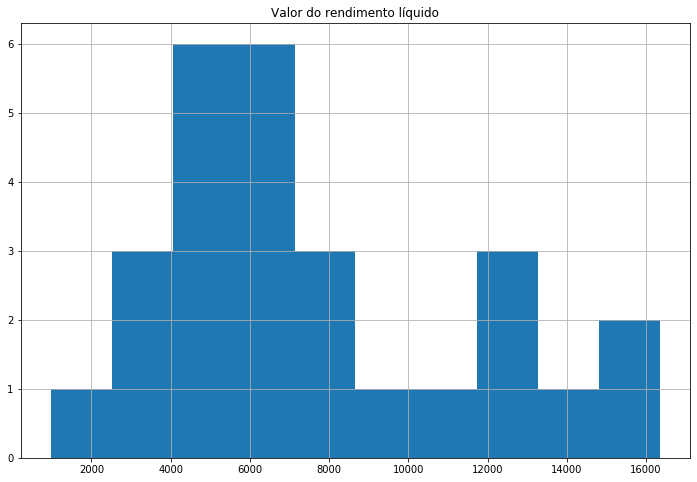

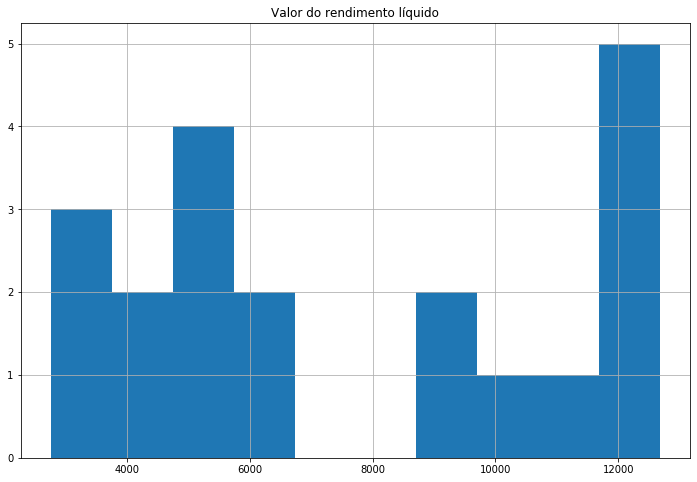

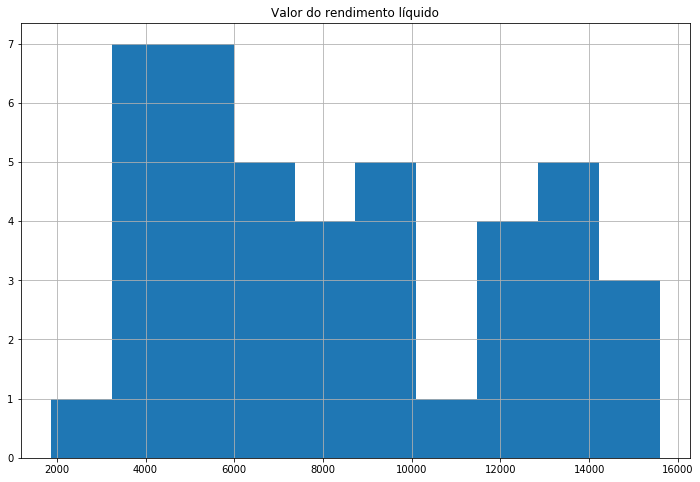

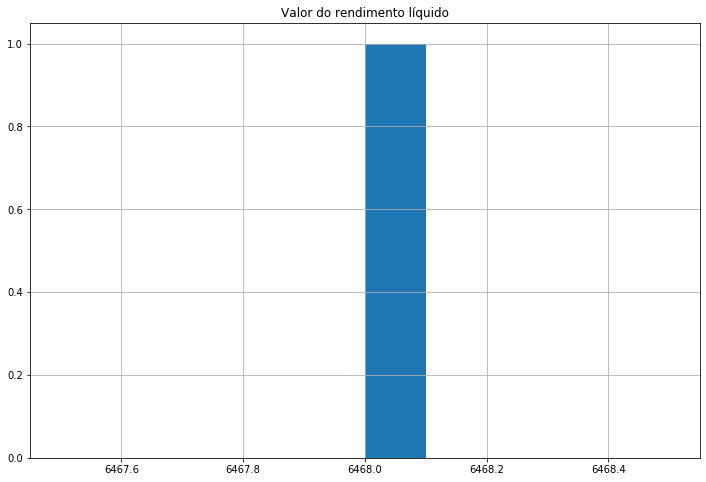

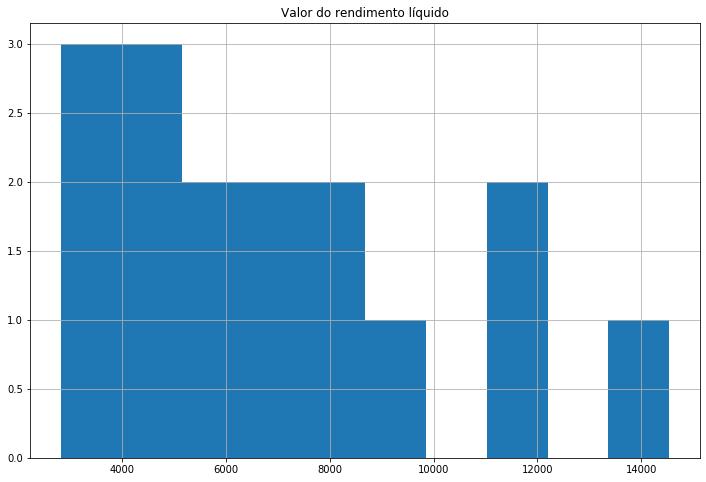

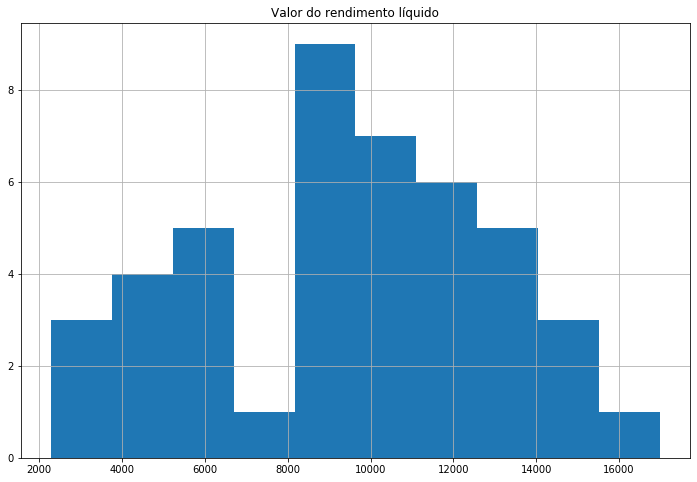

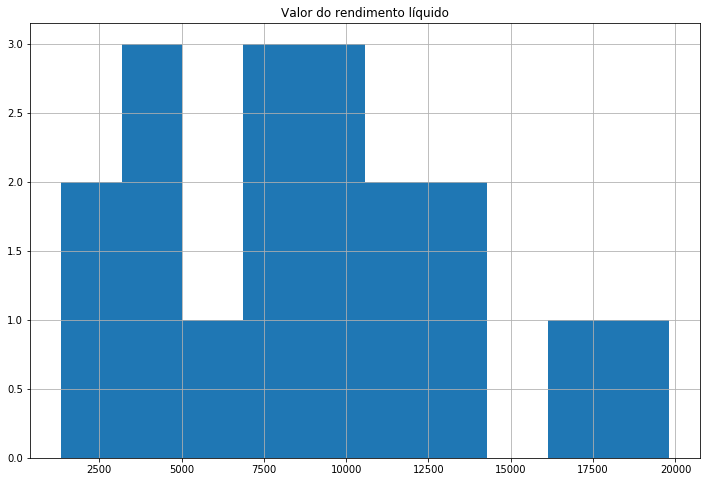

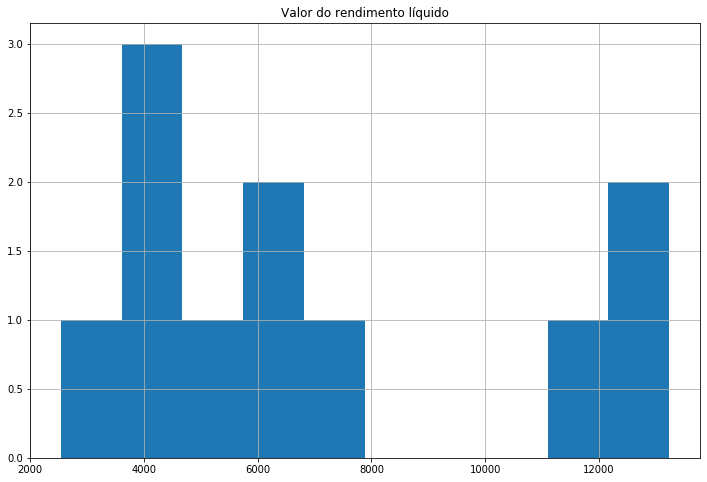

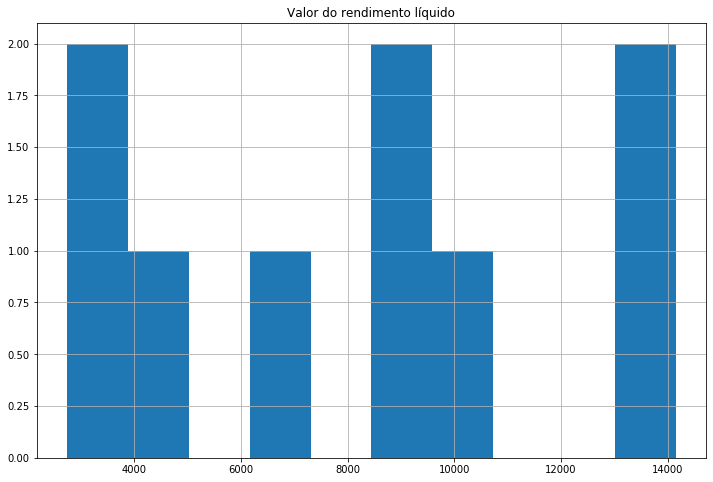

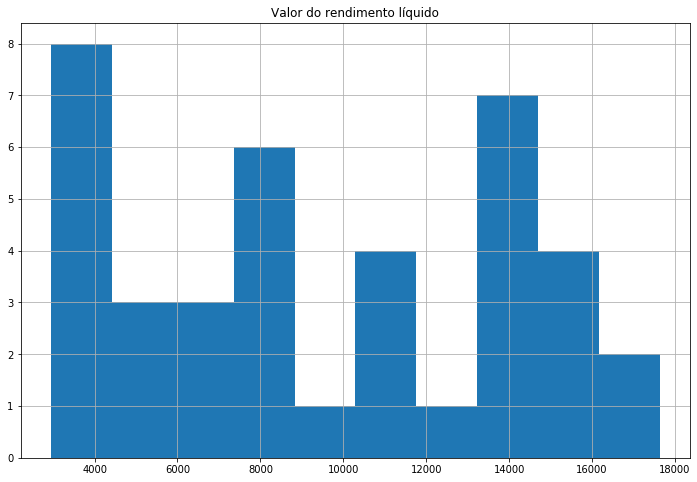

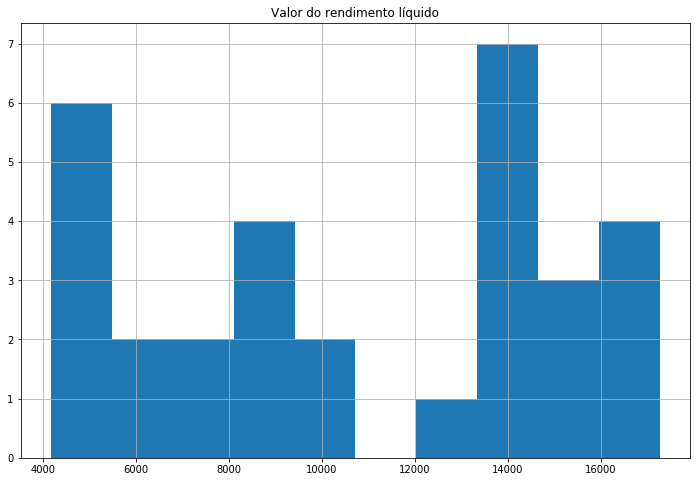

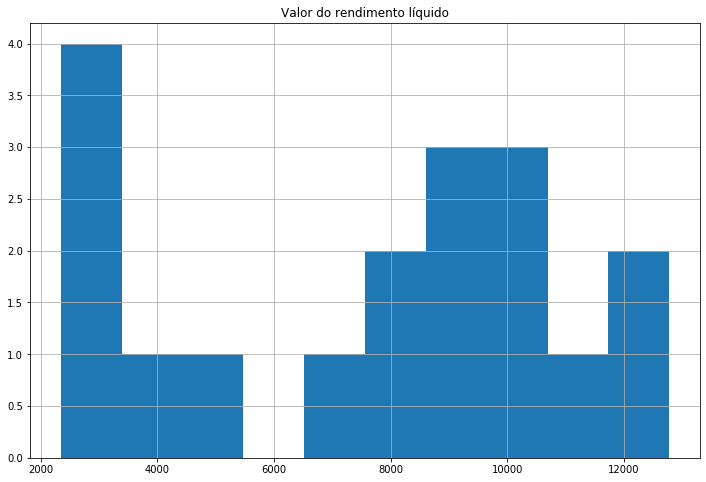

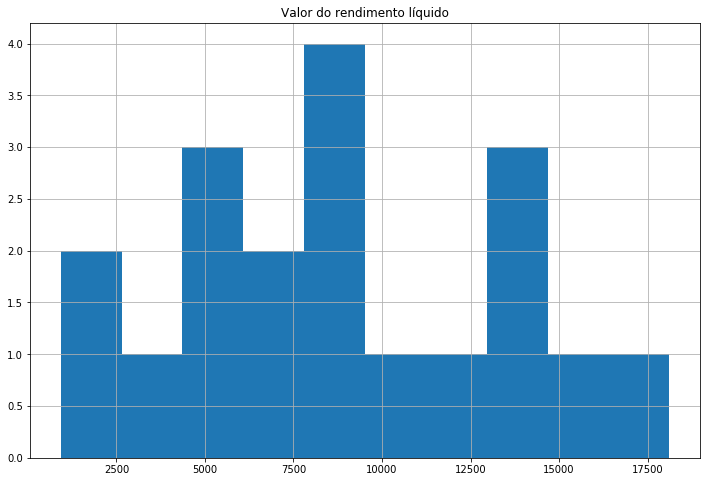

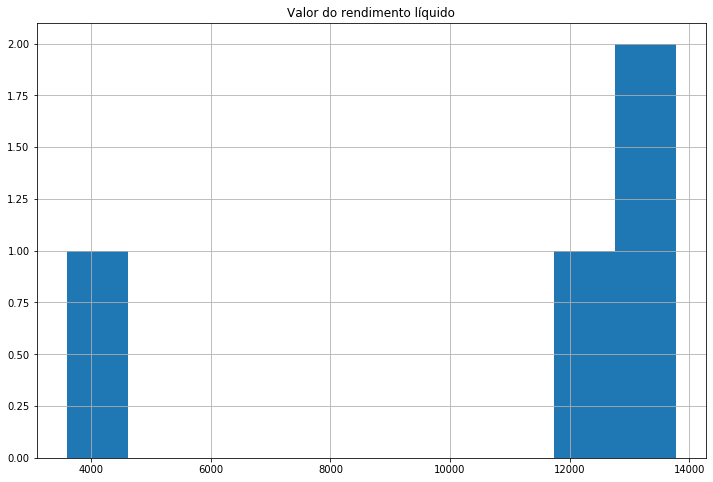

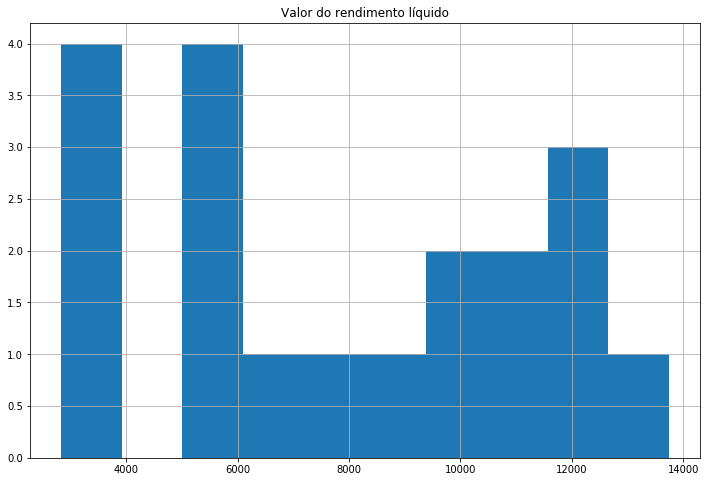

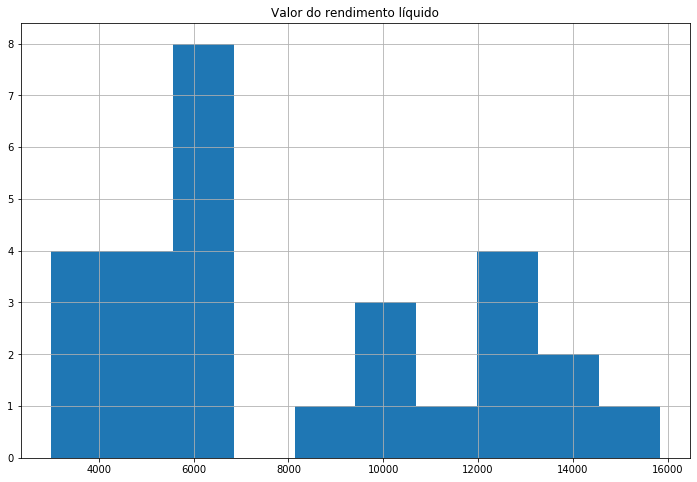

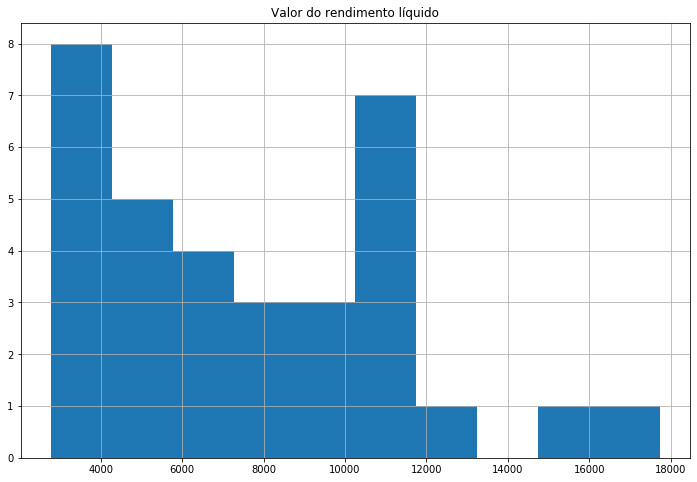

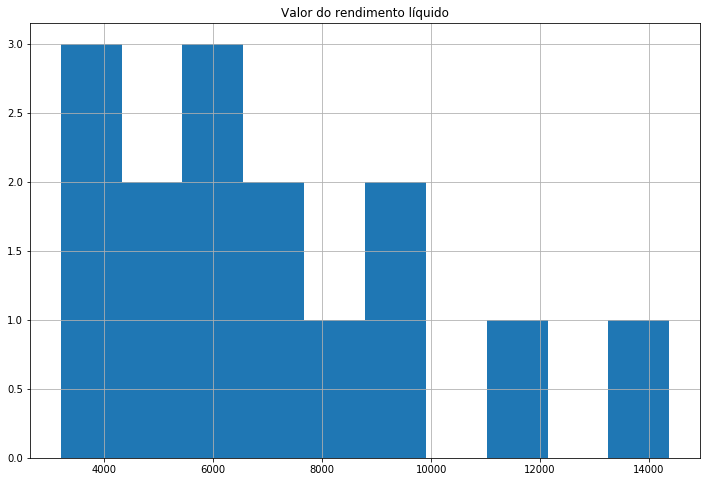

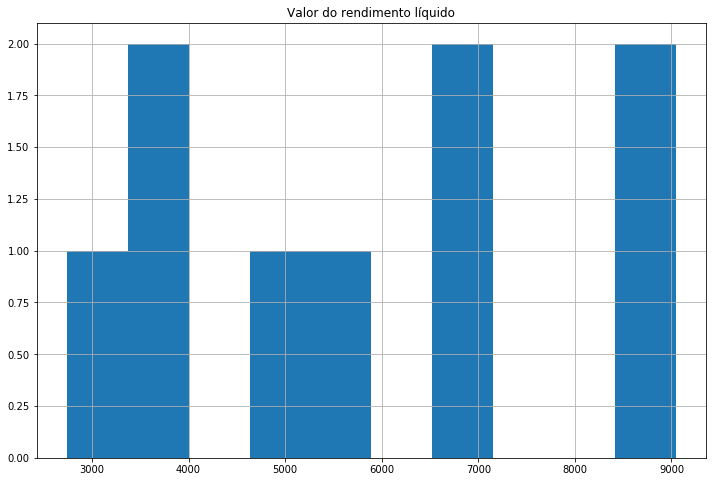

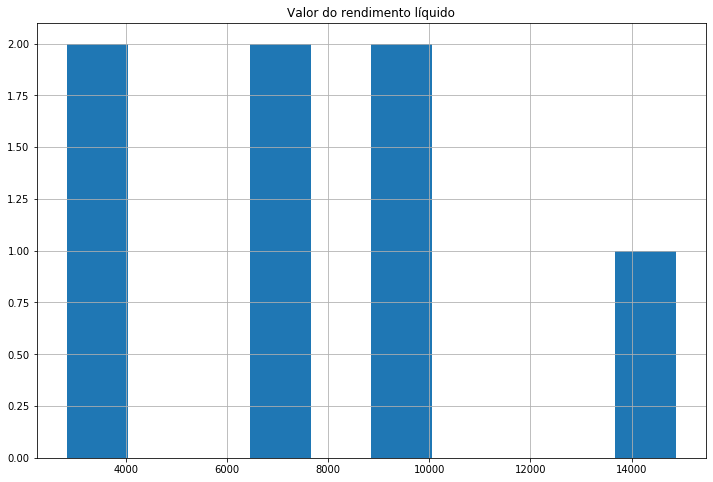

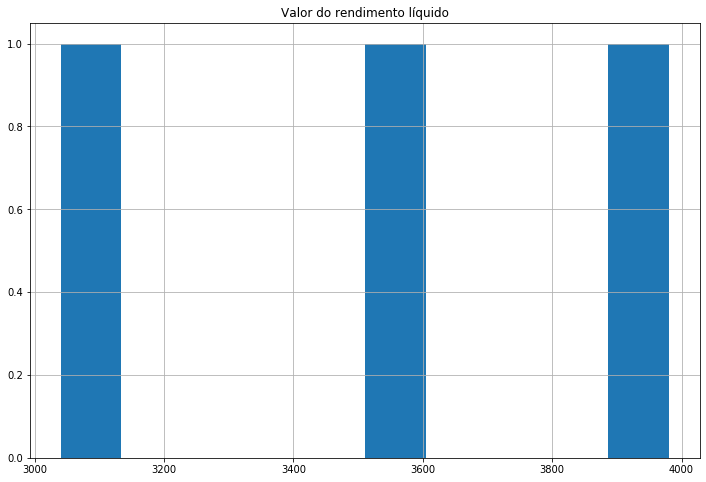

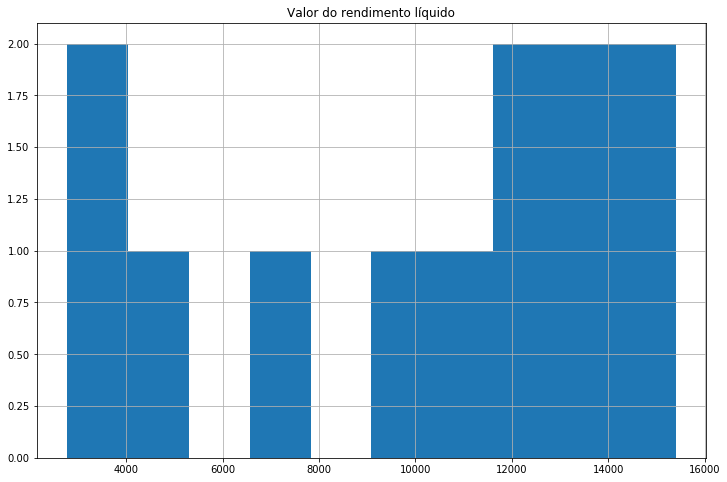

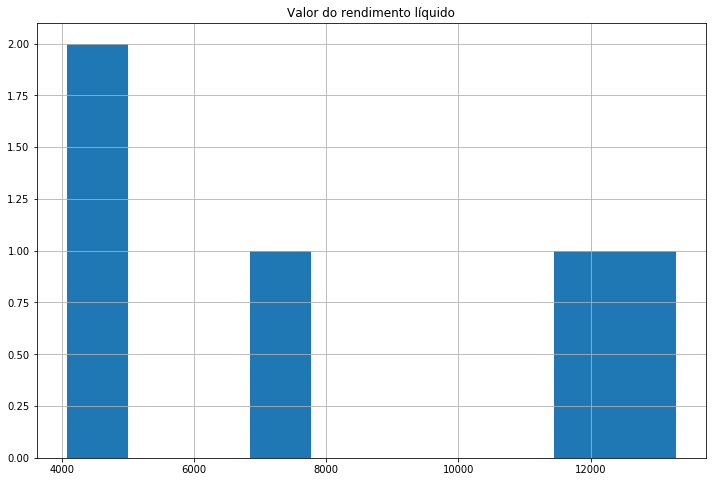

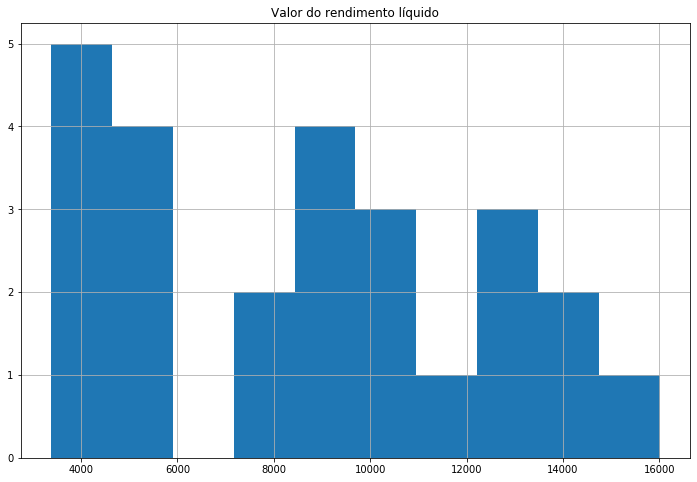

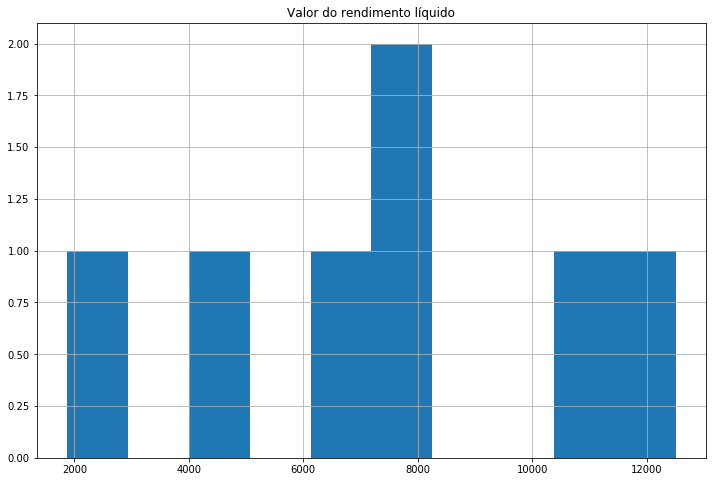

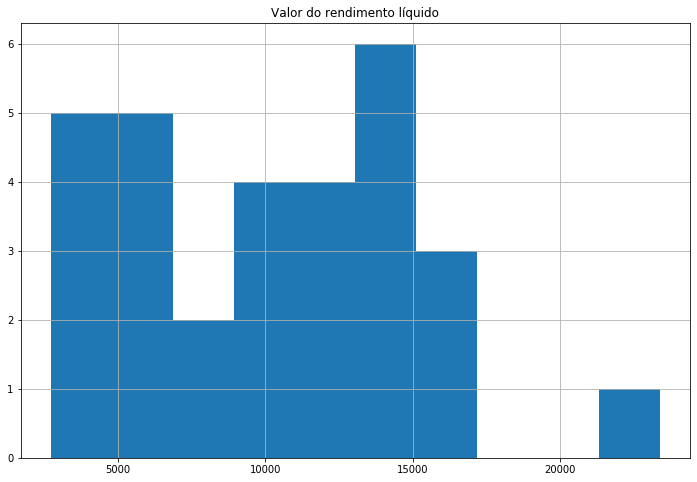

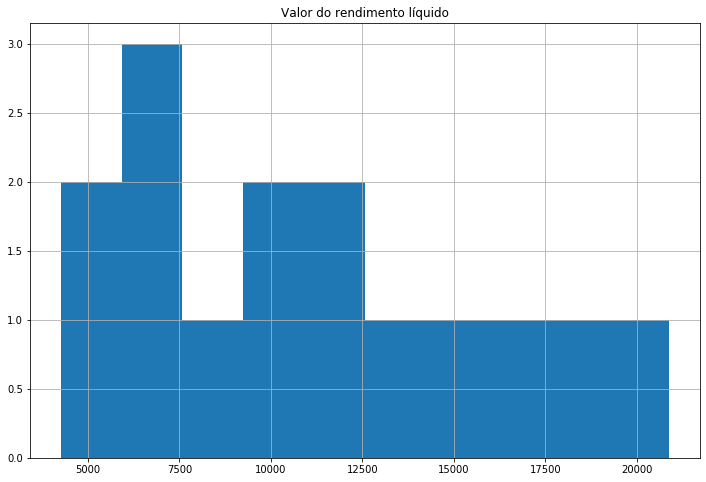

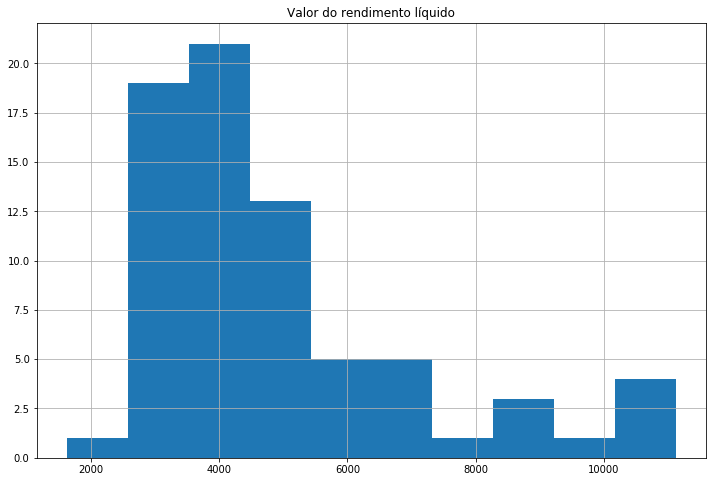

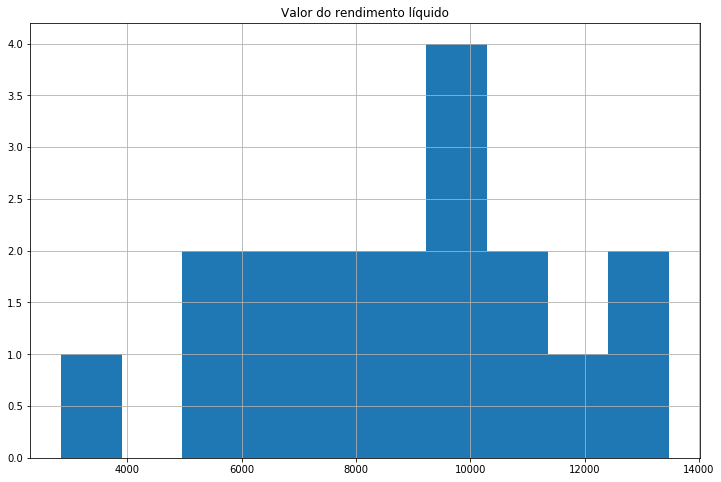

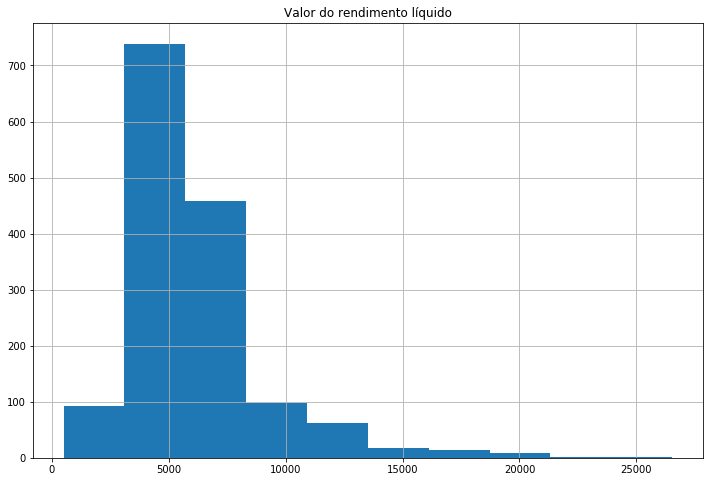

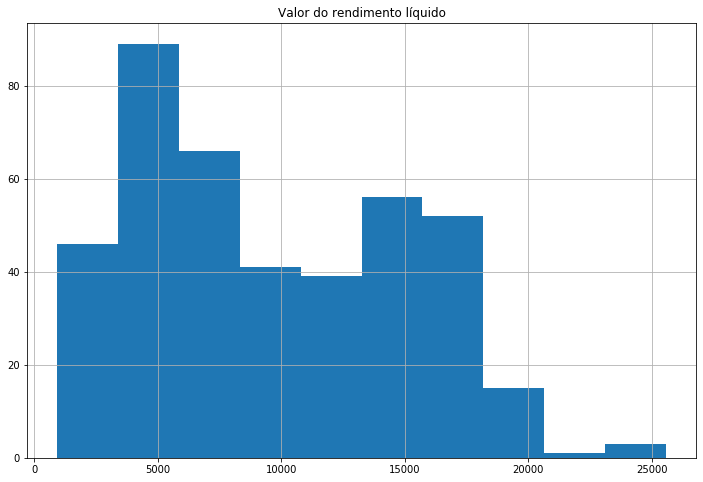

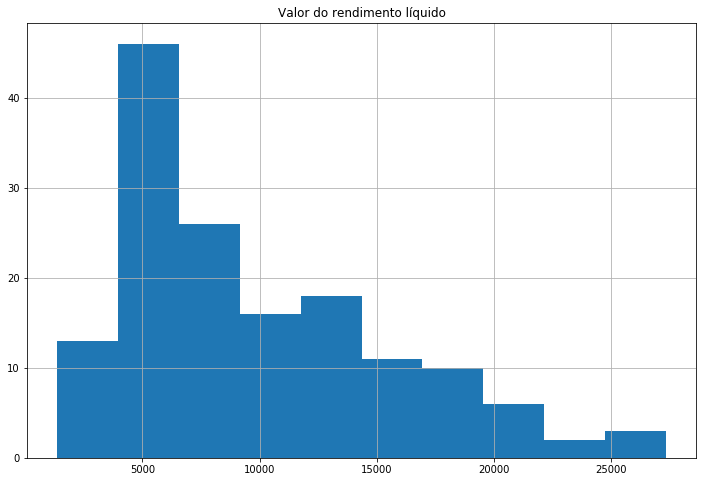

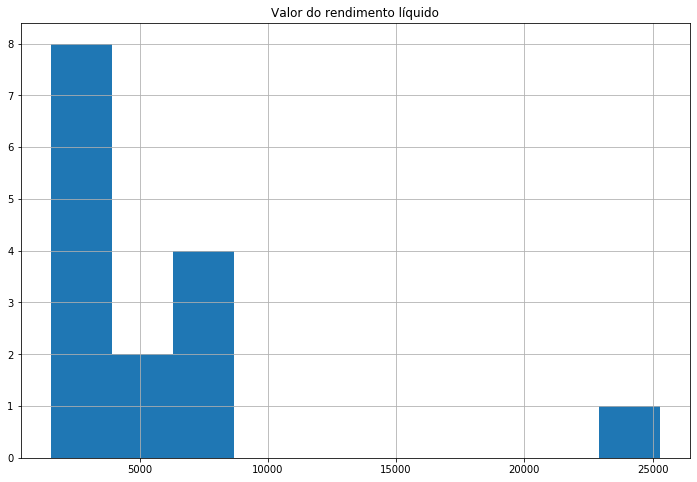

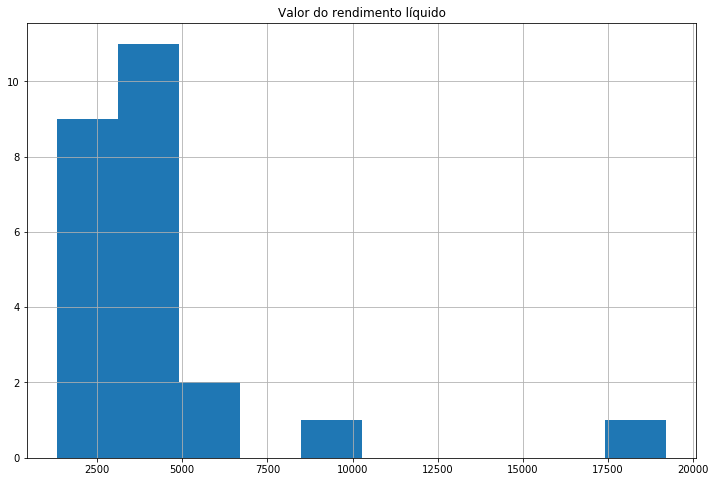

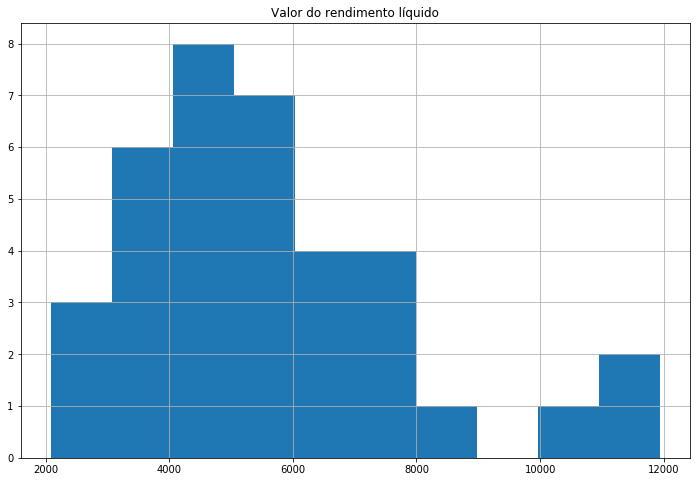

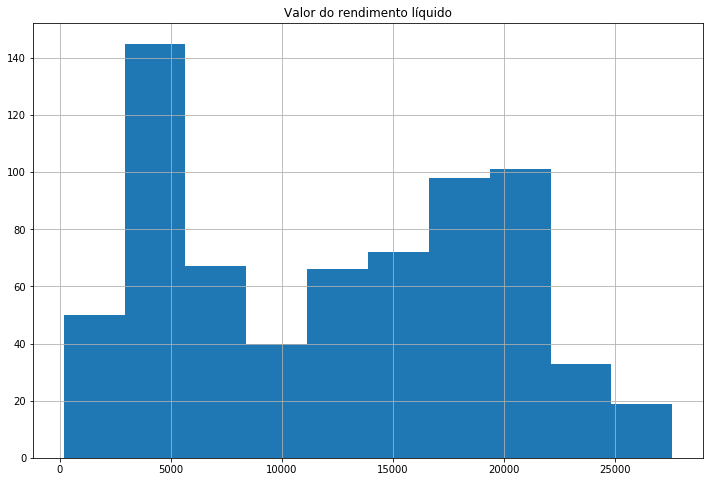

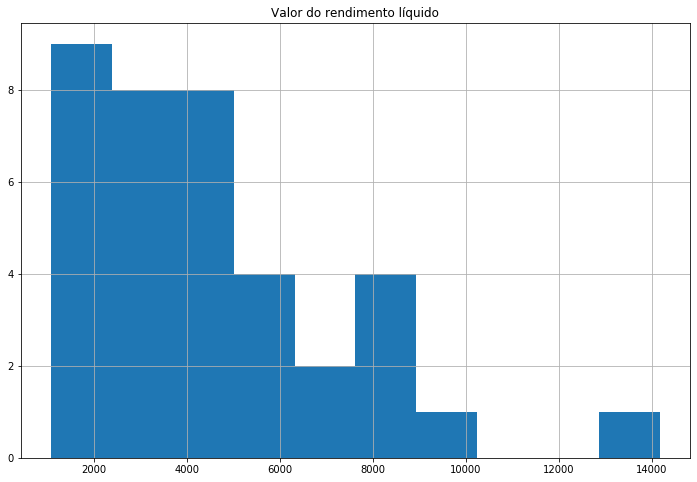

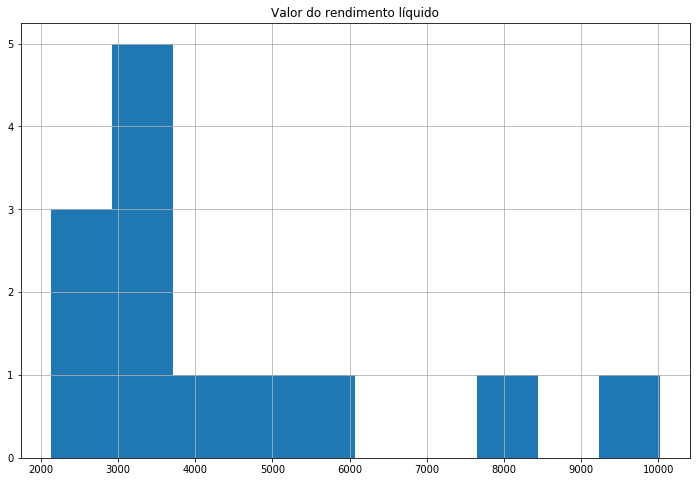

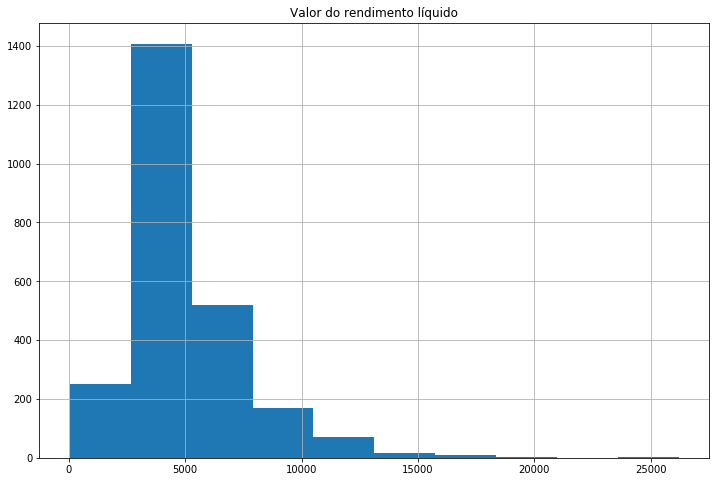

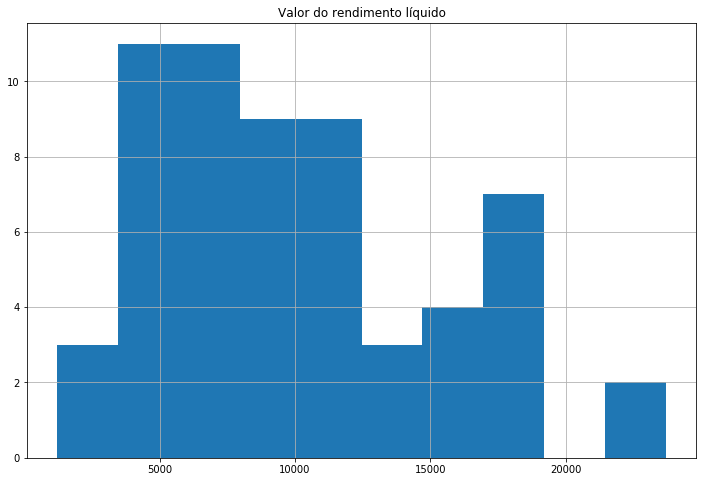

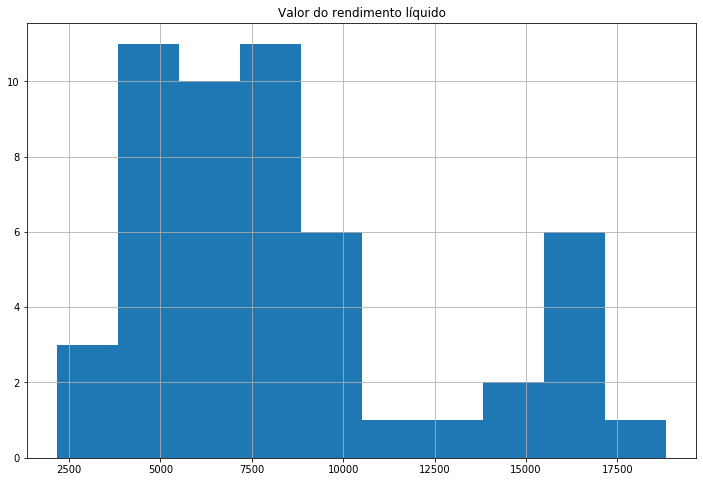

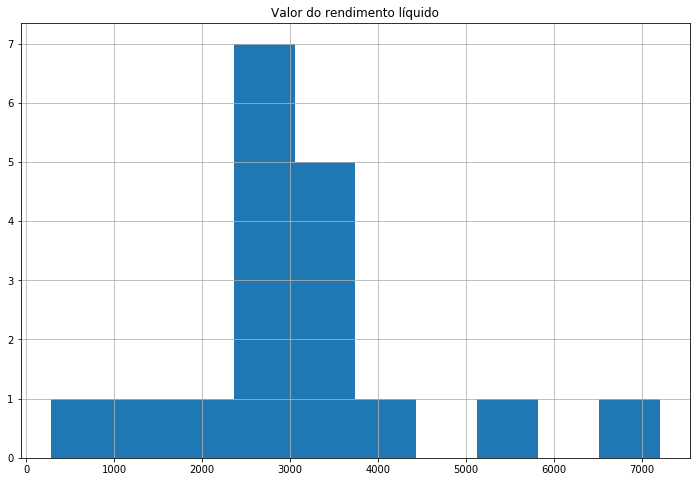

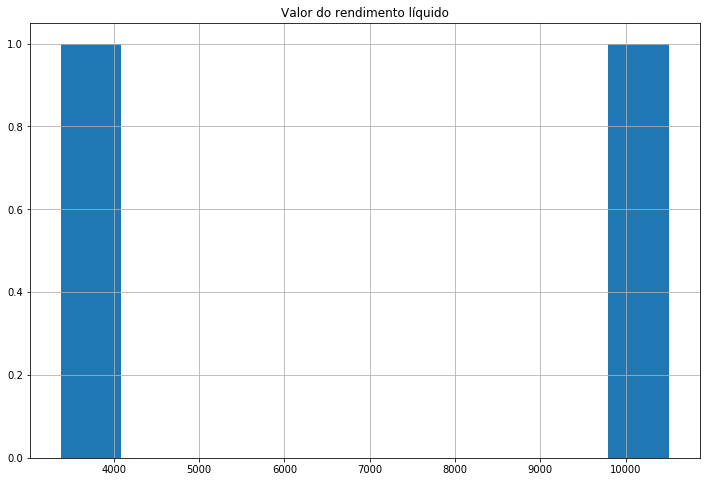

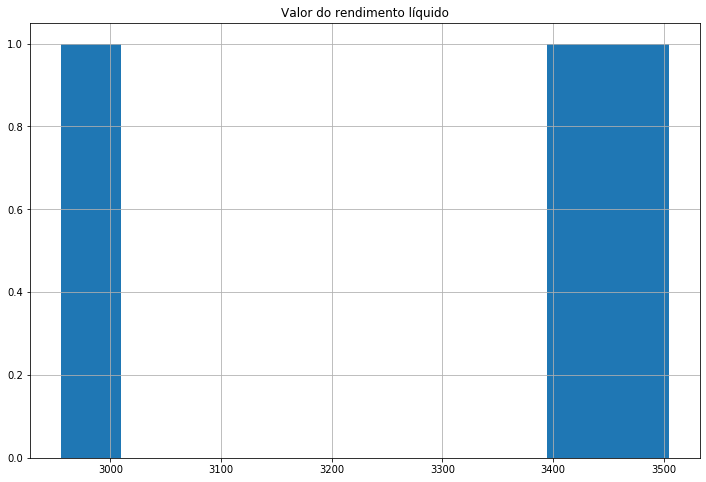

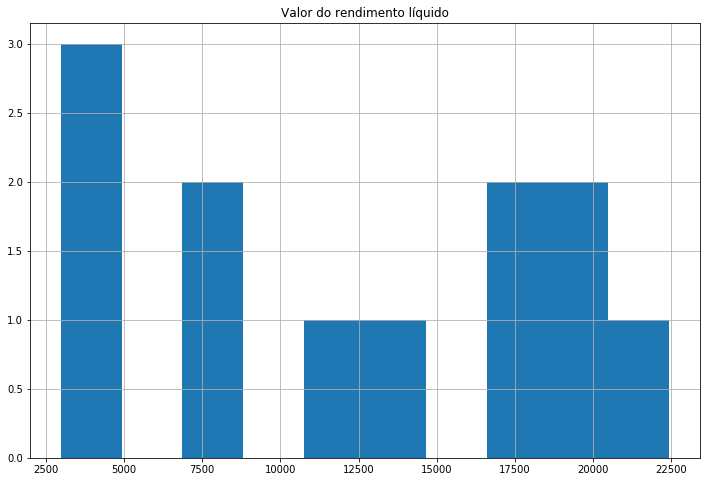

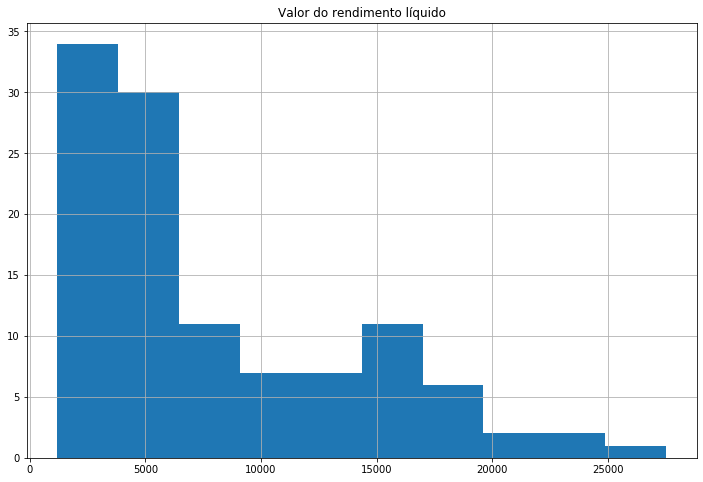

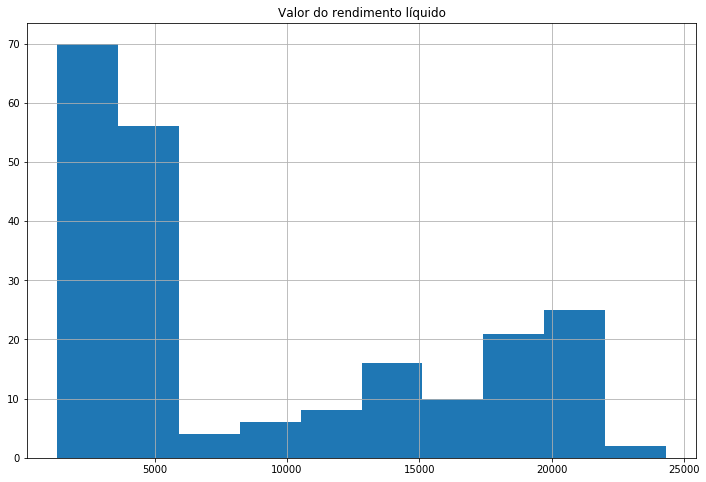

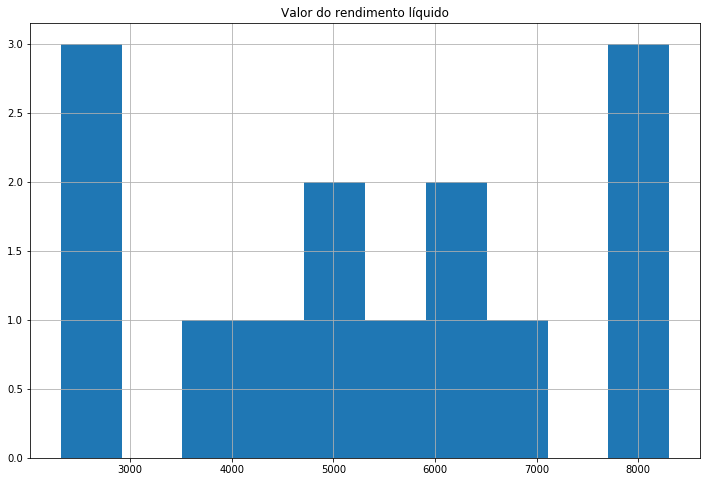

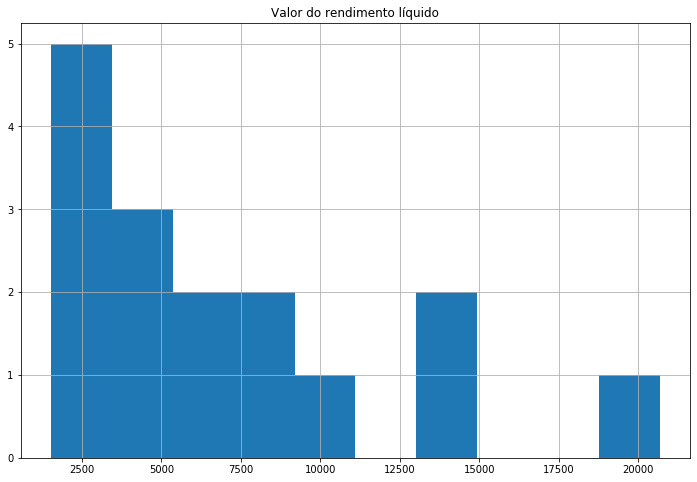

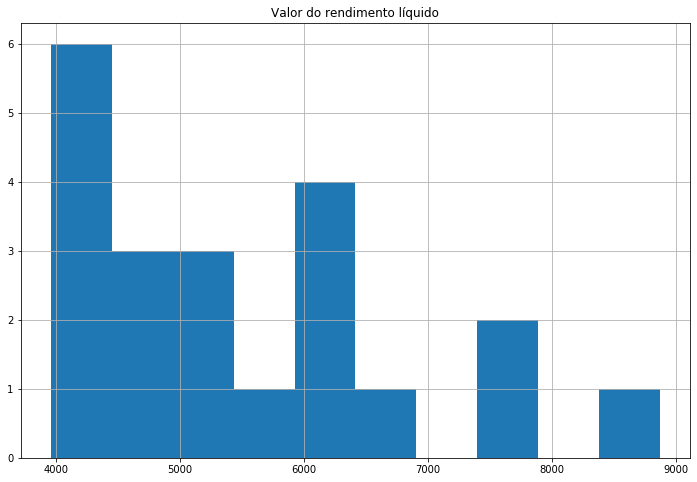

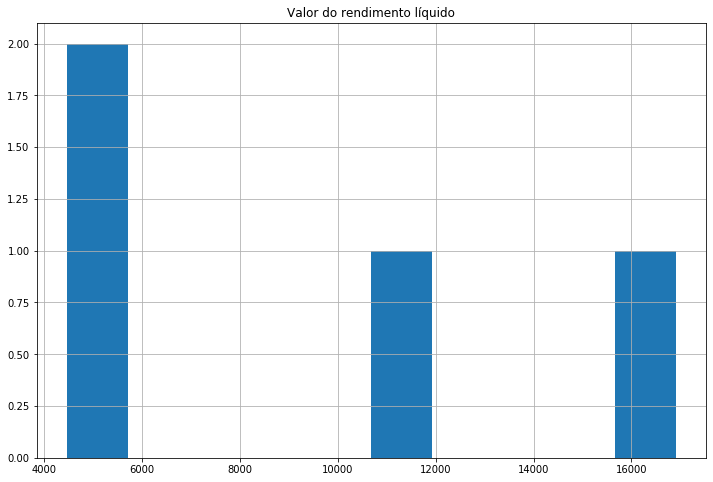

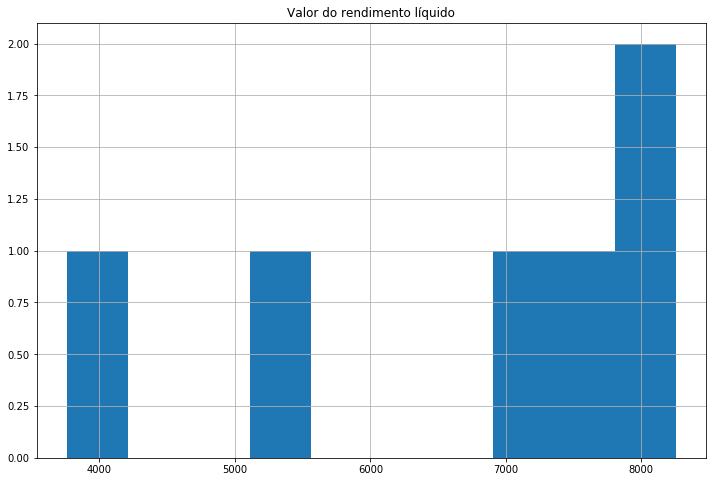

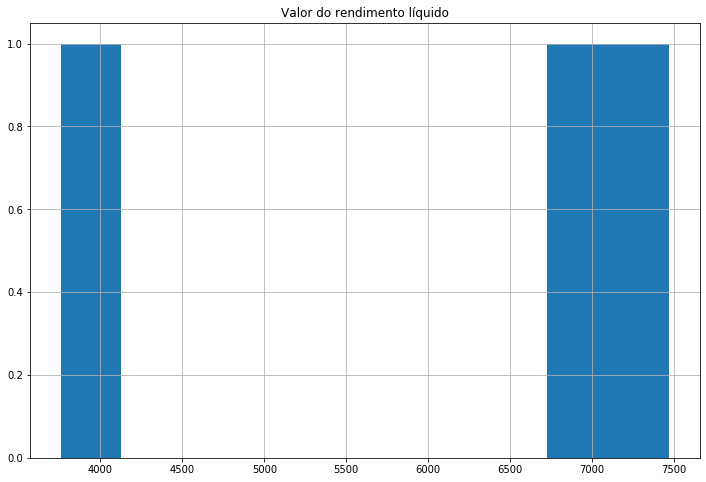

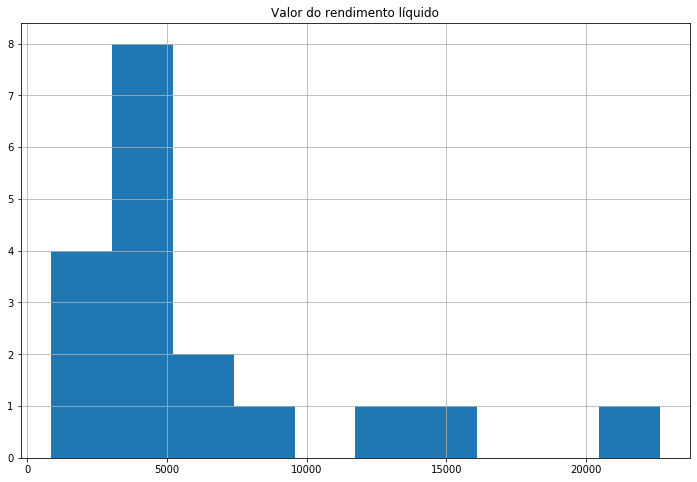

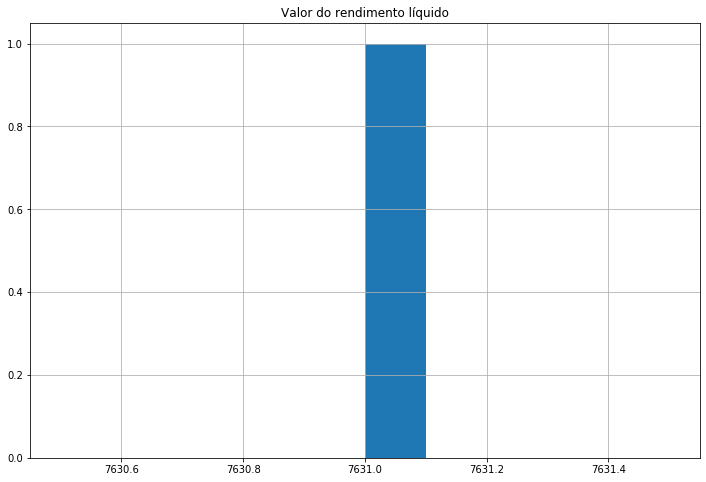

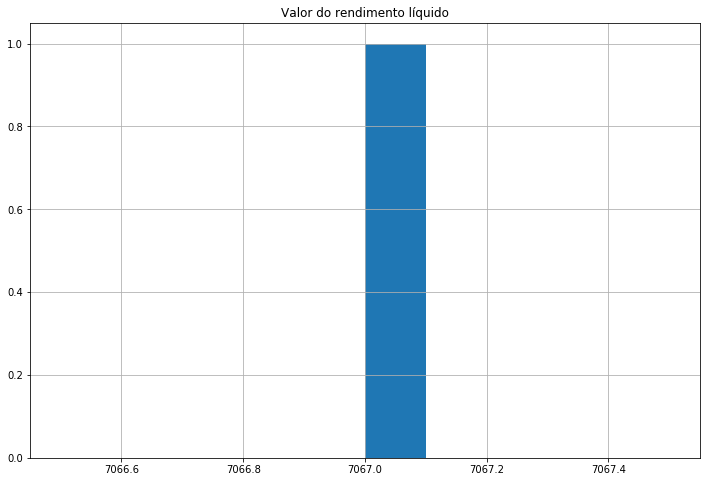

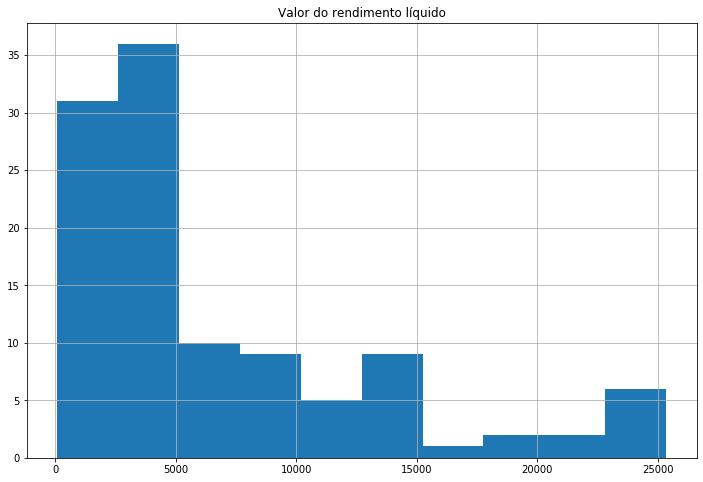

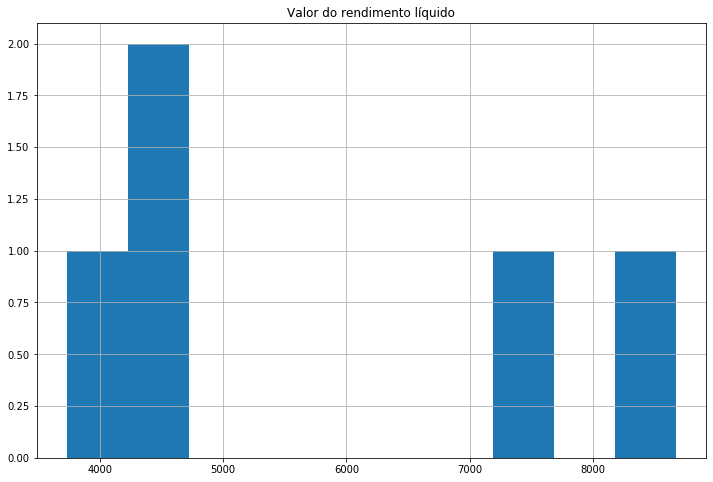

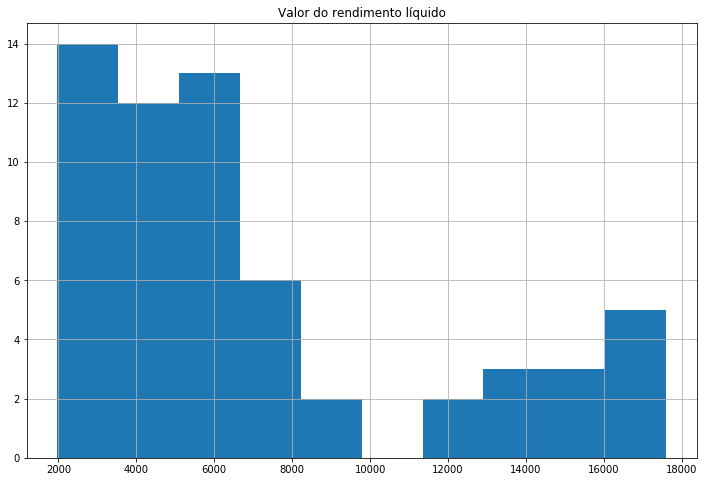

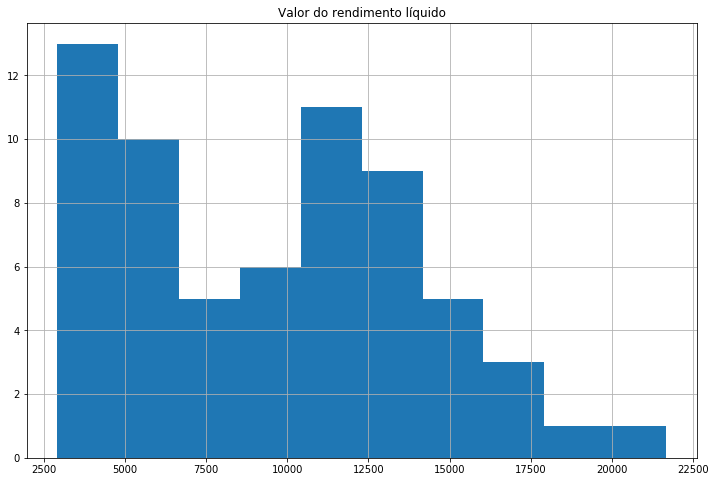

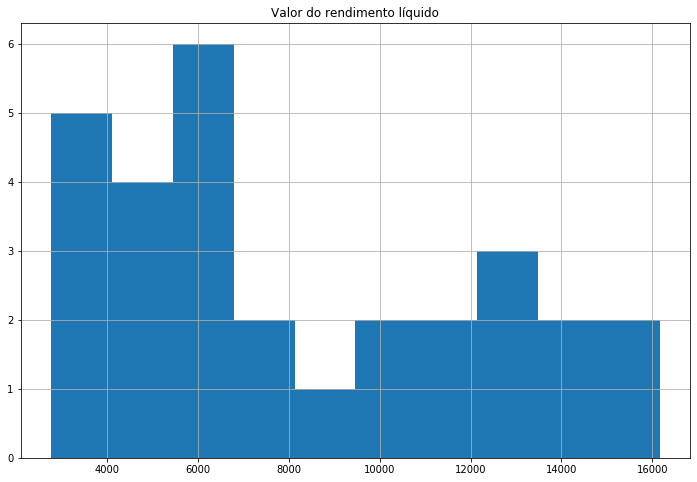

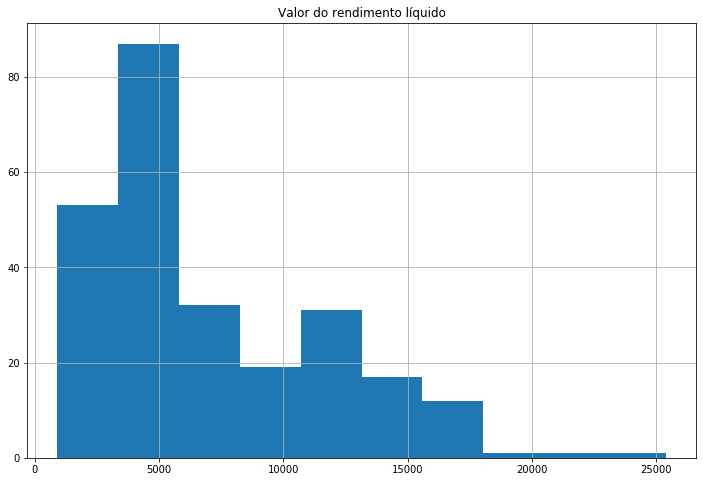

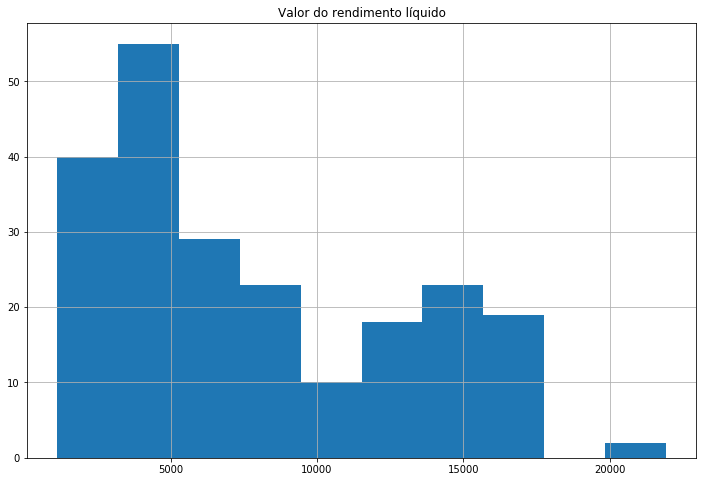

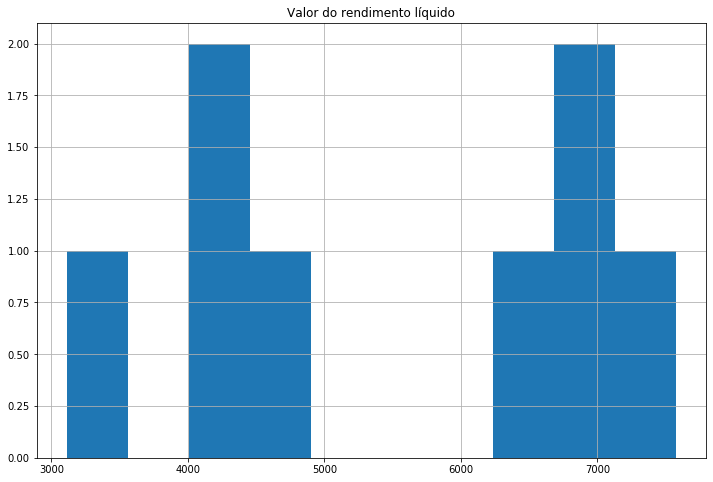

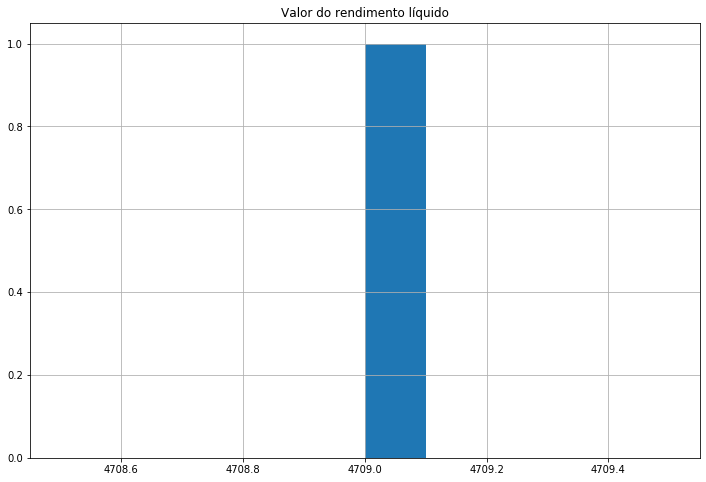

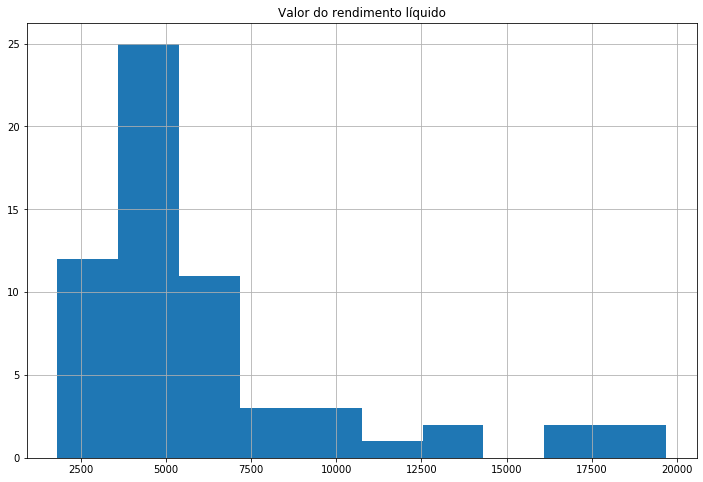

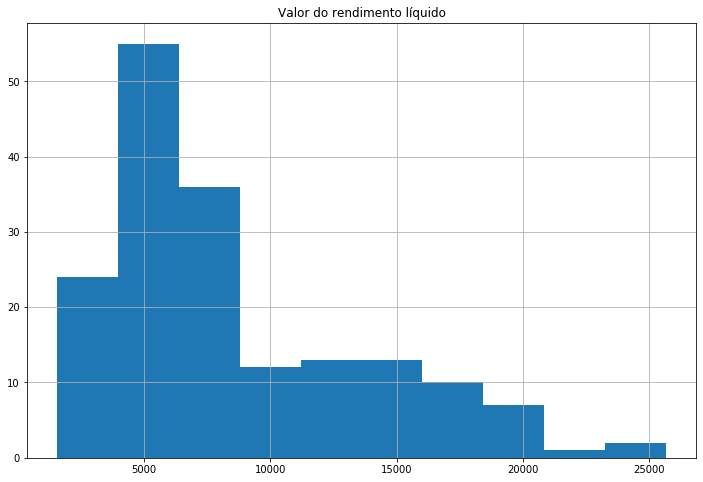

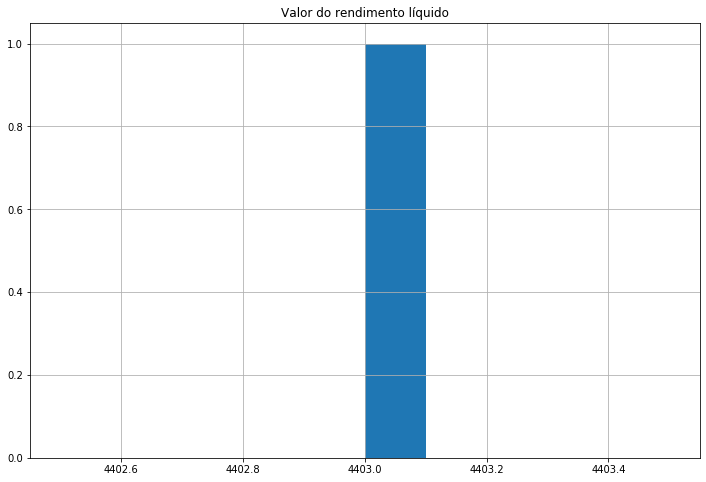

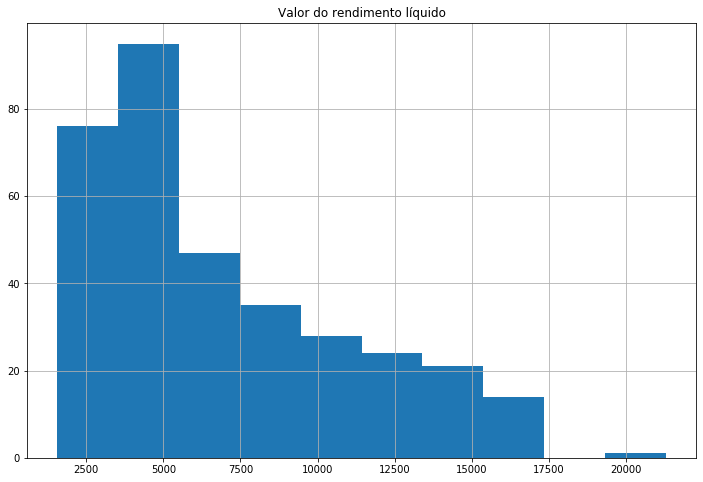

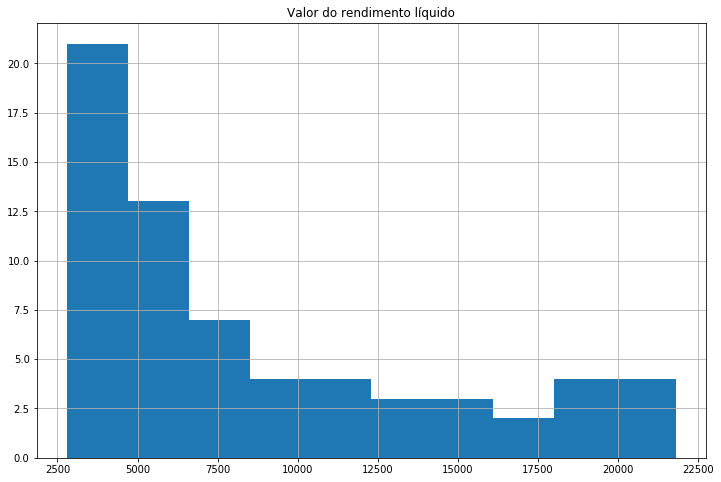

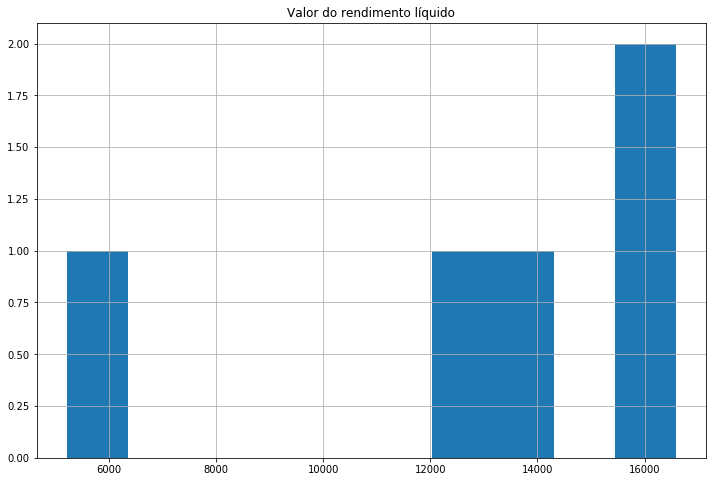

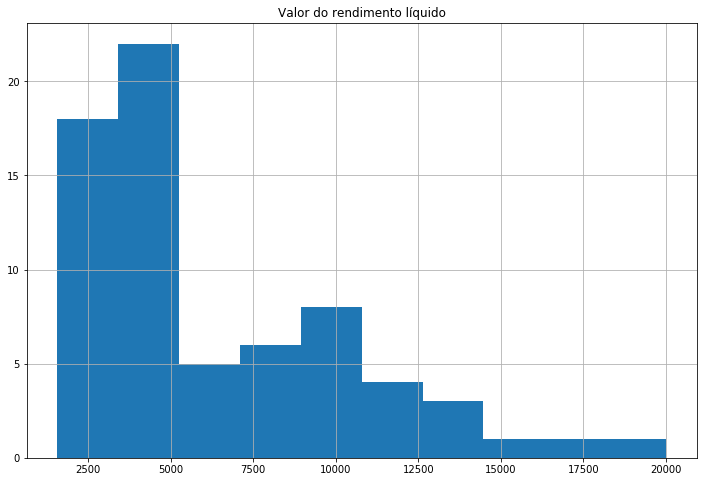

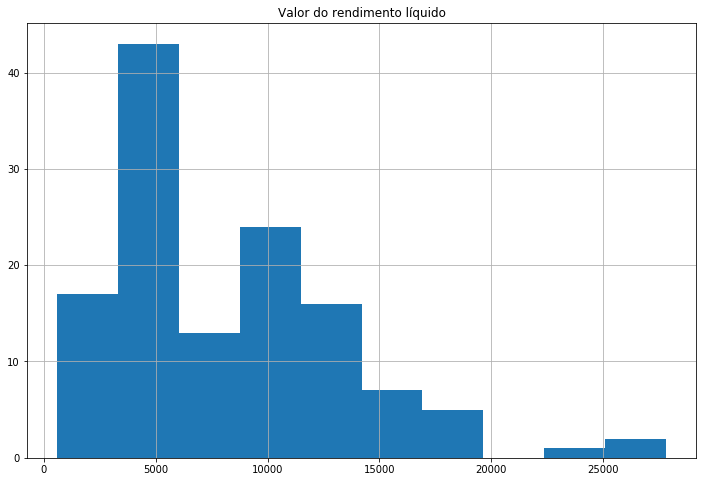

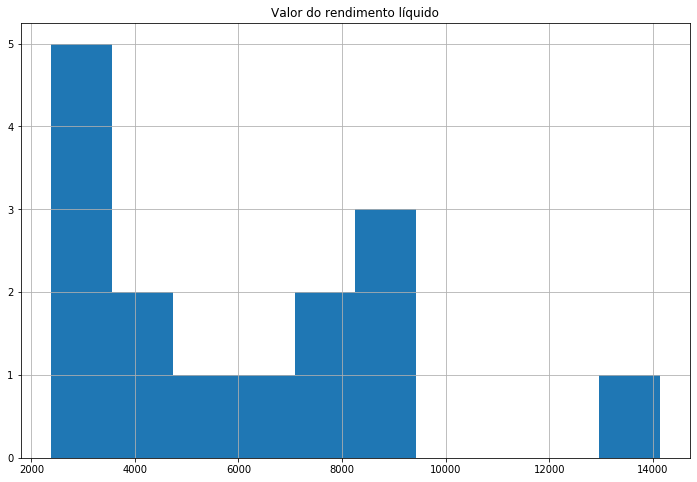

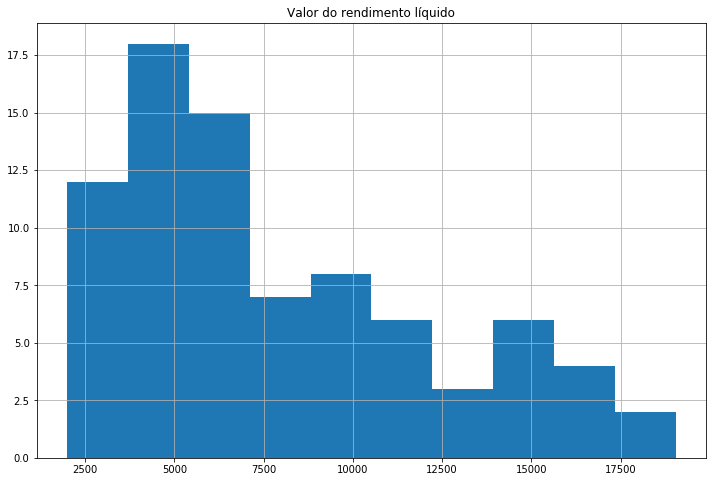

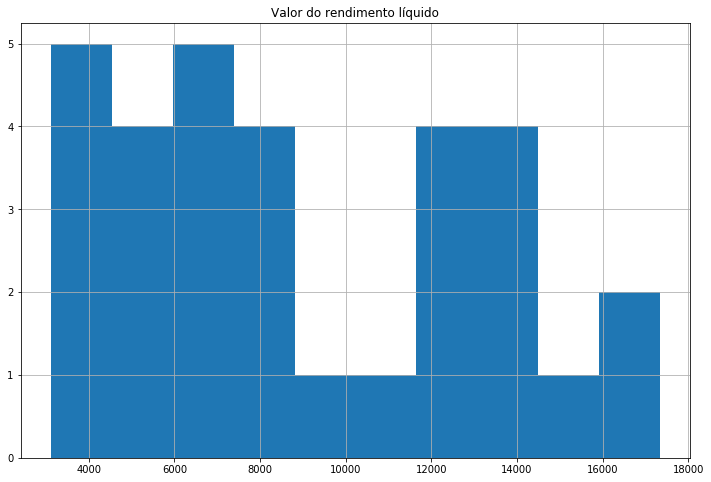

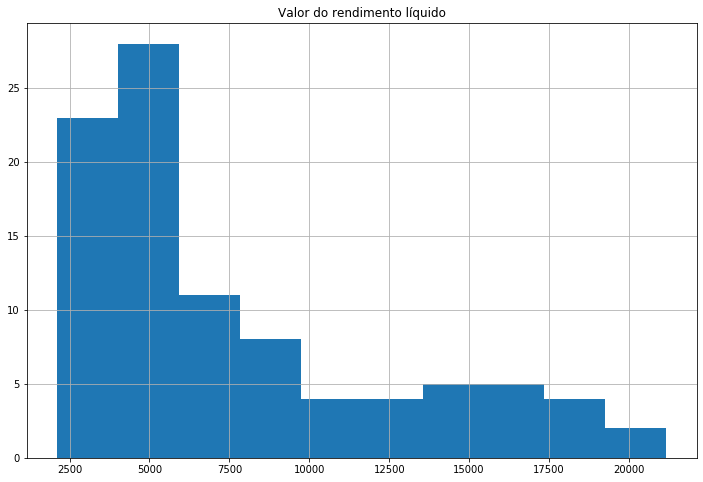

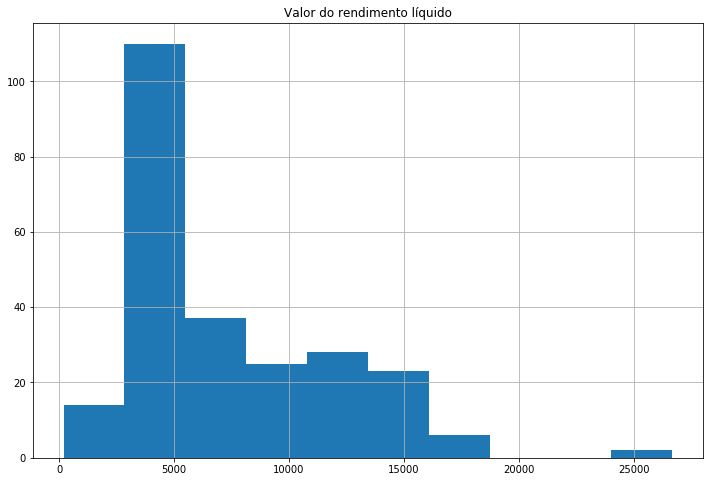

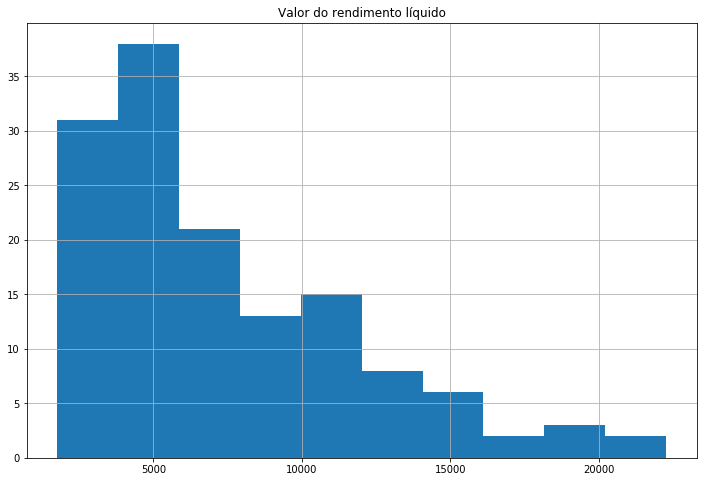

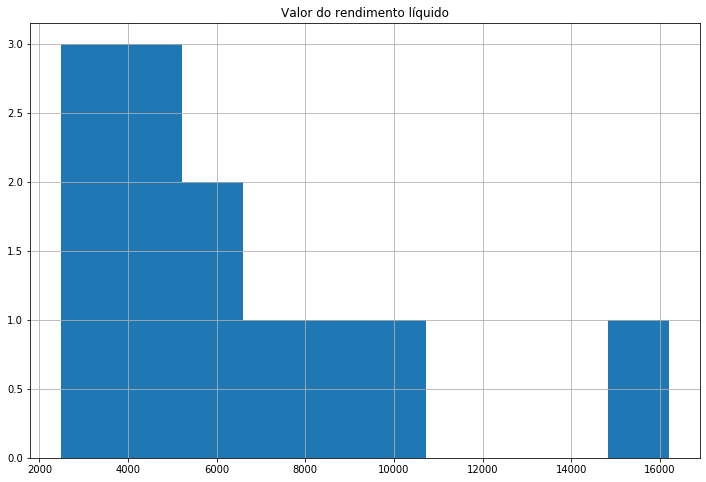

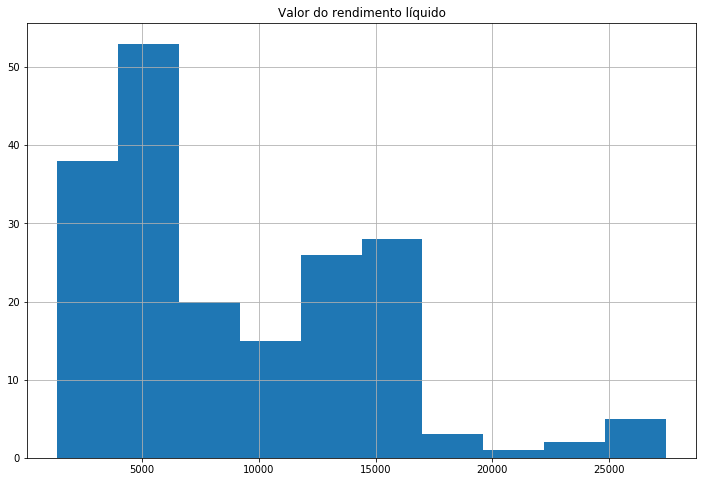

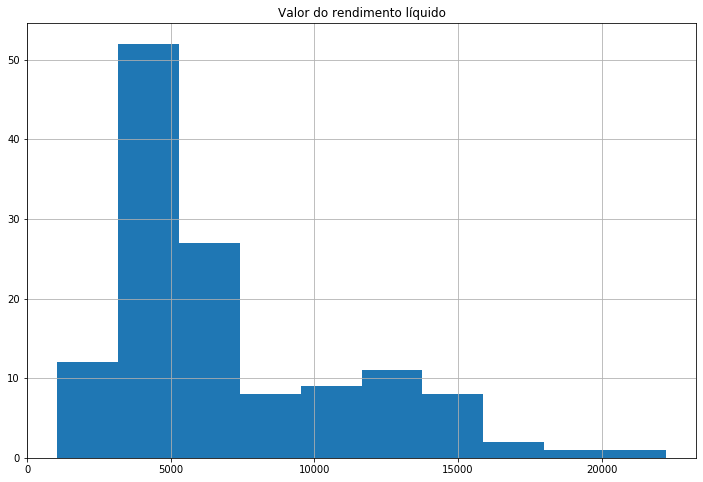

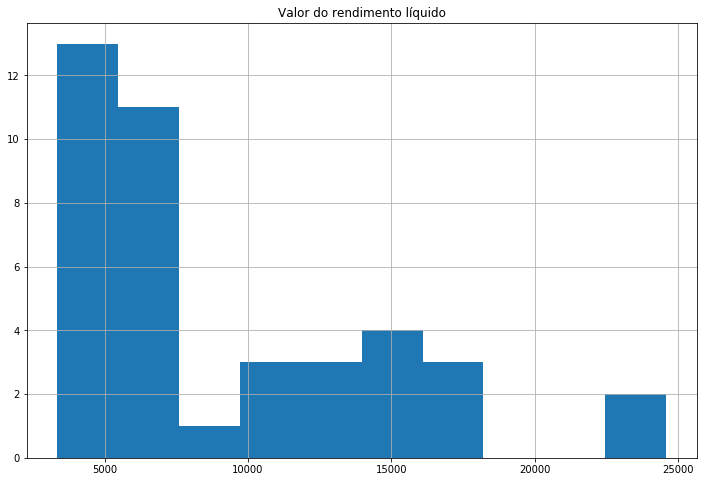

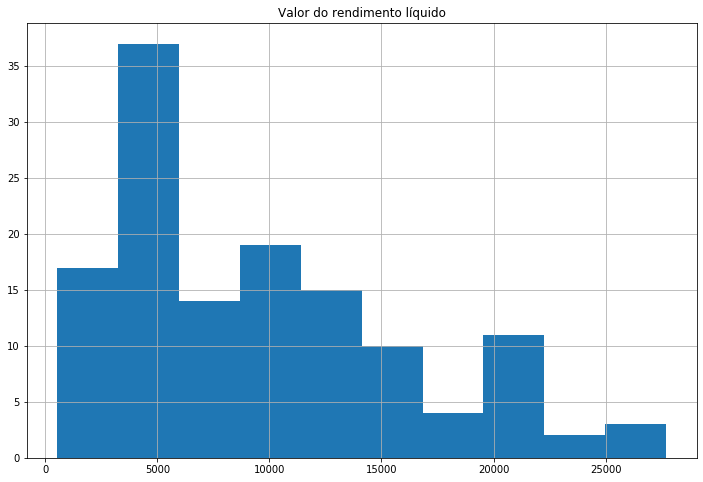

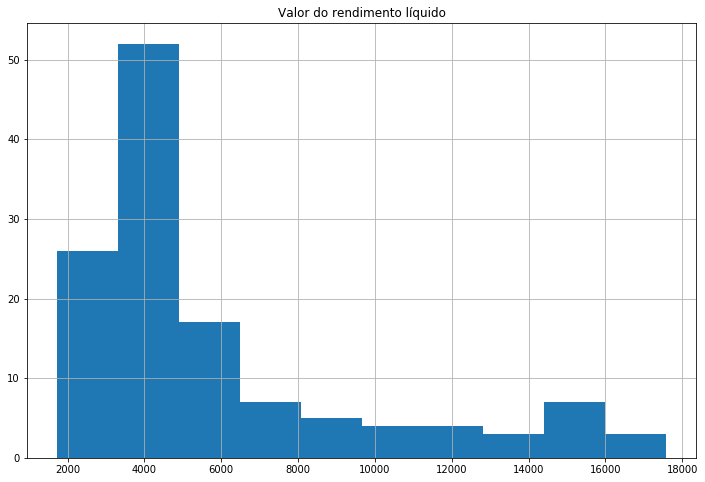

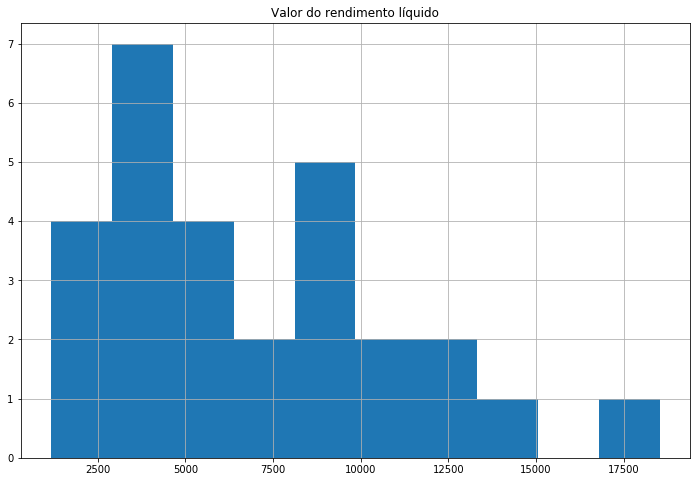

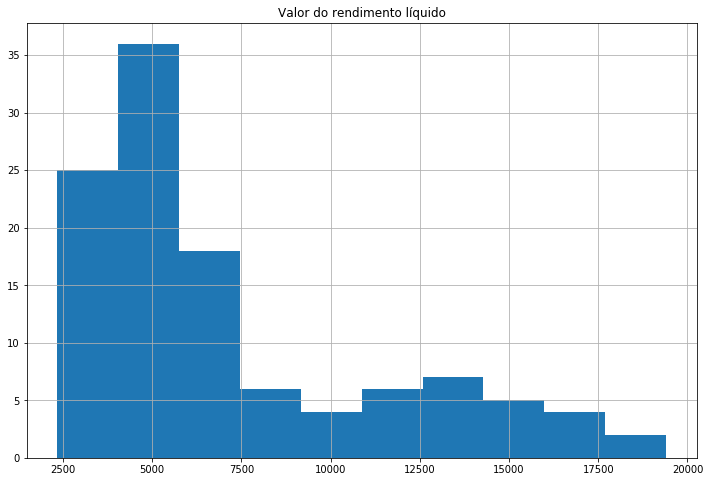

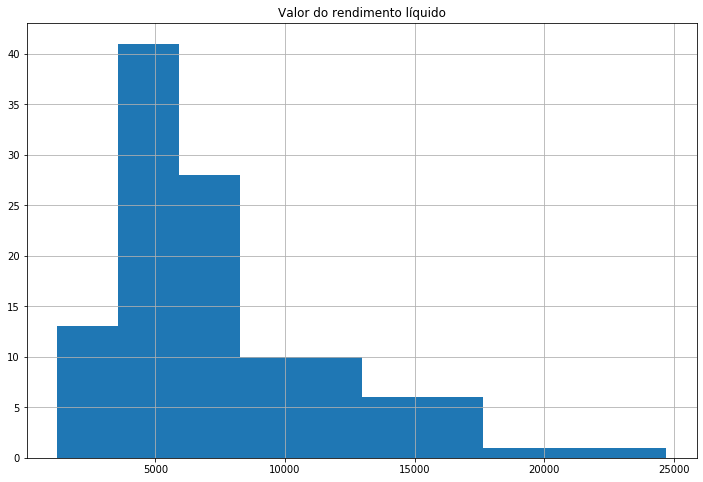

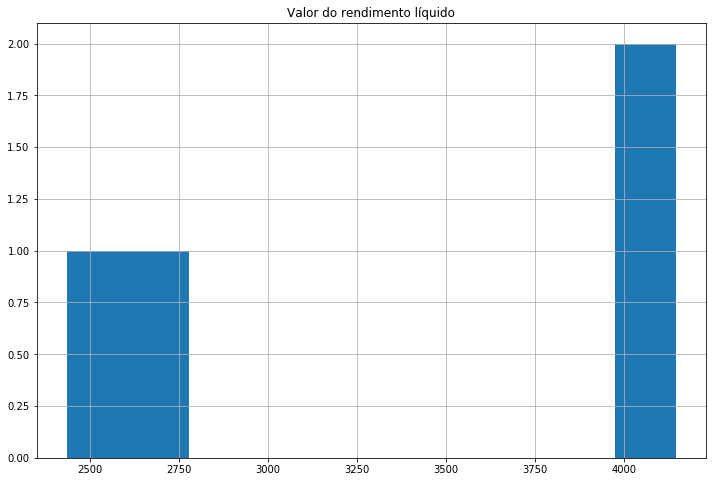

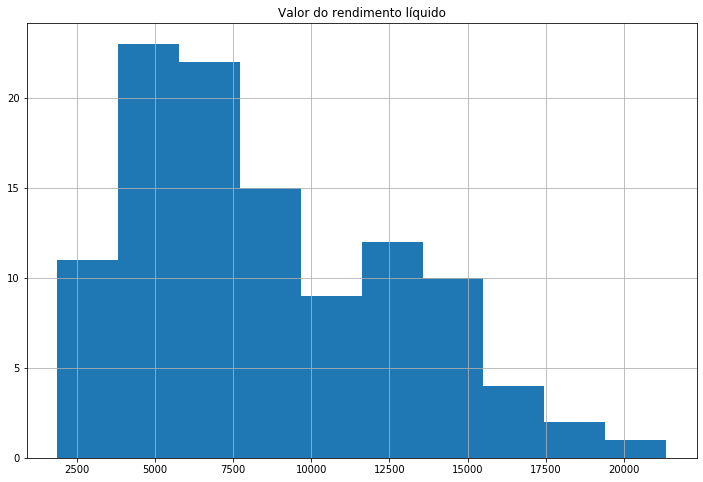

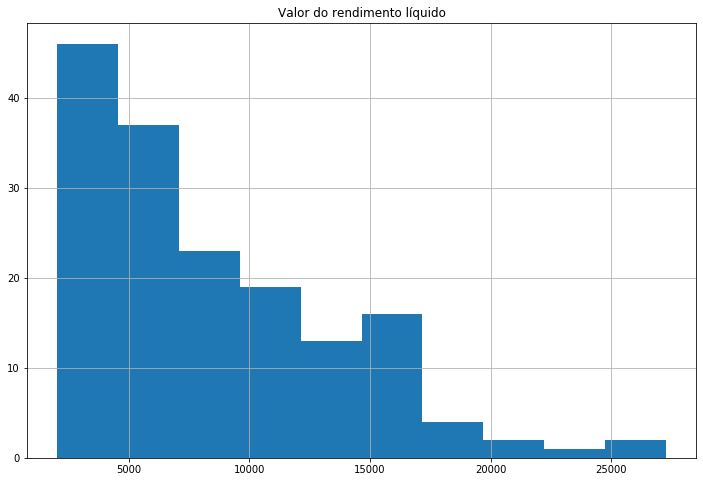

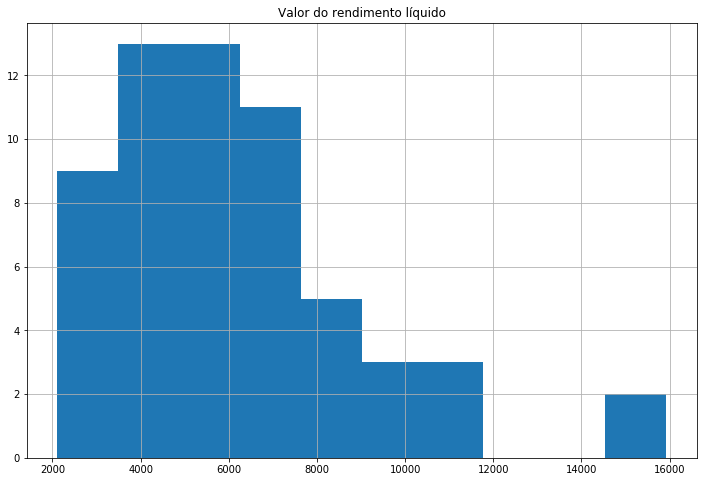

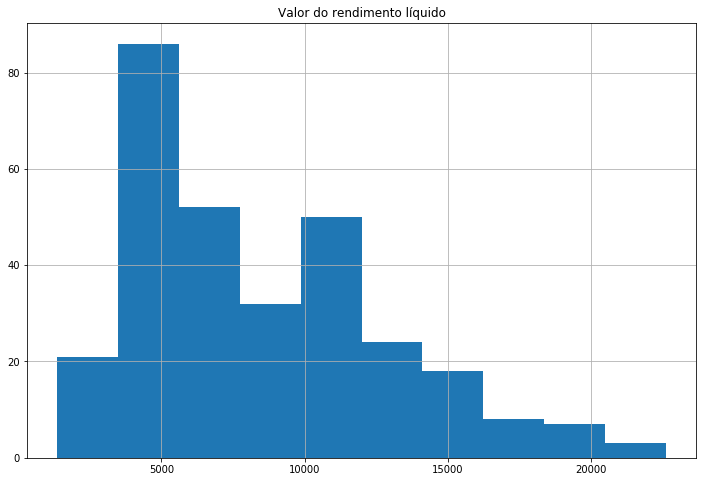

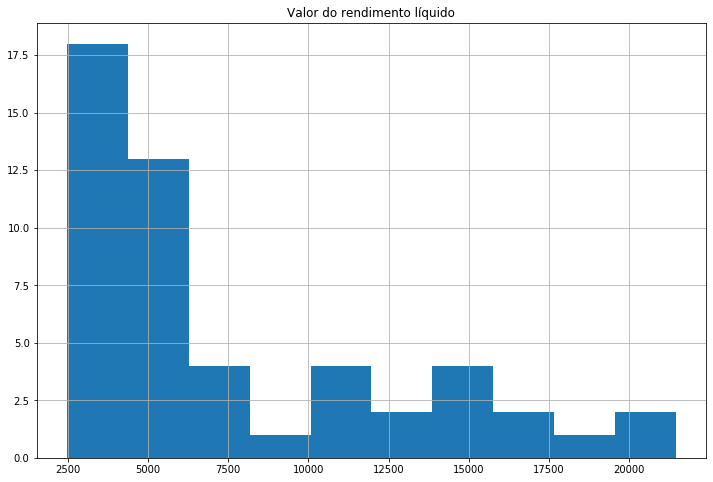

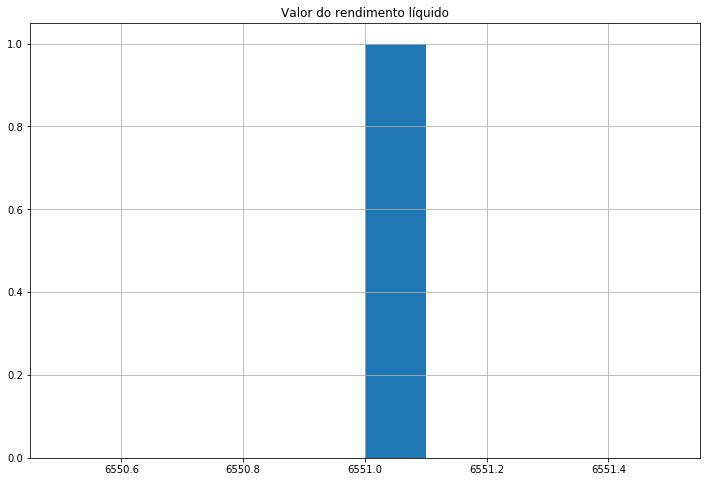

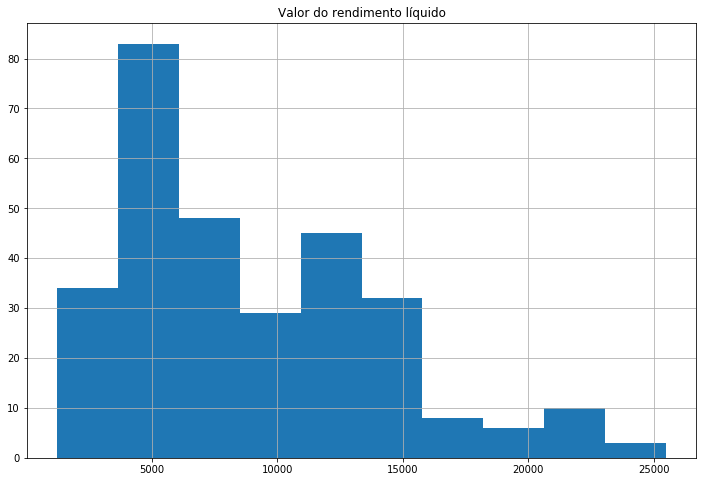

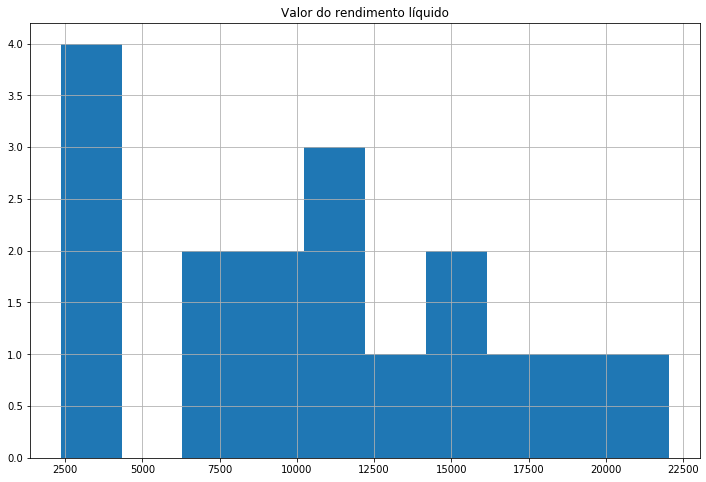

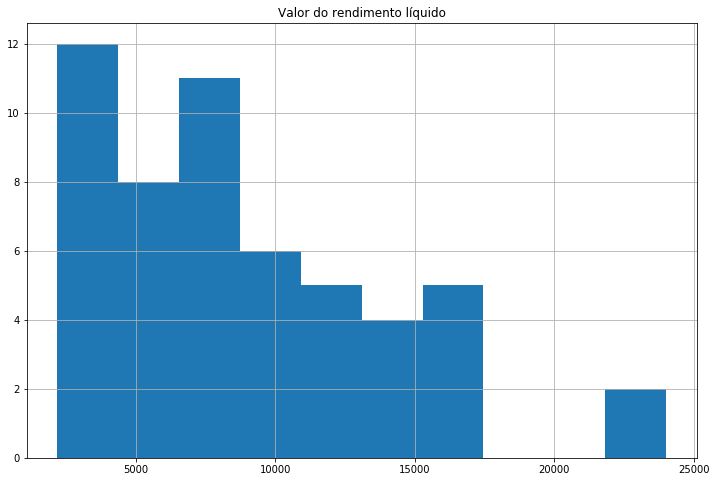

In [150]:
by_organ.hist(column='Valor do rendimento líquido',figsize=(12,8))

# Exibindo a distribuição da quantidade de órgãos no dataset (sem exibir os nomes dos órgãos para não poluir o plot)

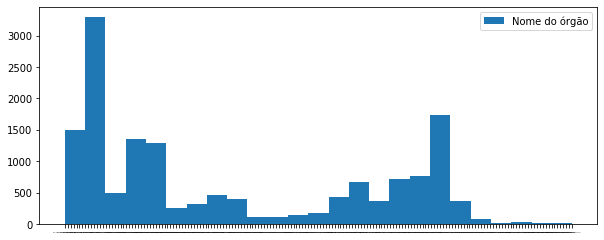

In [27]:
apos_no_outliers['Nome do órgão'].hist(bins=25,grid=False,legend=True,xlabelsize=0,figsize=(10,4))
plt.show()

# Criando uma feature que exibe a média salarial por órgão (sem casas decimais)

In [108]:
salary_by_org = pd.DataFrame(columns=['orgão','média'])
organs_names = by_organ.groups.keys()

for k in organs_names:    
    organ_subset = by_organ.get_group(k)
    m = int(organ_subset[['Valor do rendimento líquido']].mean())    
    salary_by_org = salary_by_org.append({'média':m,'orgão':k},ignore_index=True)
    

In [118]:
salary_by_org.sort_values(by='média',ascending=False,inplace=True)
#salary_by_org.reset_index(inplace=True)
salary_by_org

,orgão,média
21,DEFENSORIA PUBLICA DA UNIAO,25273
69,INSTITUTO FEDERAL BAIANO,15383
18,COMISSAO DE VALORES MOBILIARIOS,15254
36,FUNDACAO CASA DE RUI BARBOSA,15011
5,AGENCIA NACIONAL DE AGUAS,14174
...,...,...
52,FUNDACAO UNIVERSIDADE FEDERAL DO PAMPA,3640
96,INSTITUTO FEDERAL DO TOCANTINS,3524
164,UNIVERSIDADE FEDERAL DO OESTE DO PARA,3327
119,MINISTERIO DO ESPORTE,3289


# Distribuiçõa das médias salariais por órgão

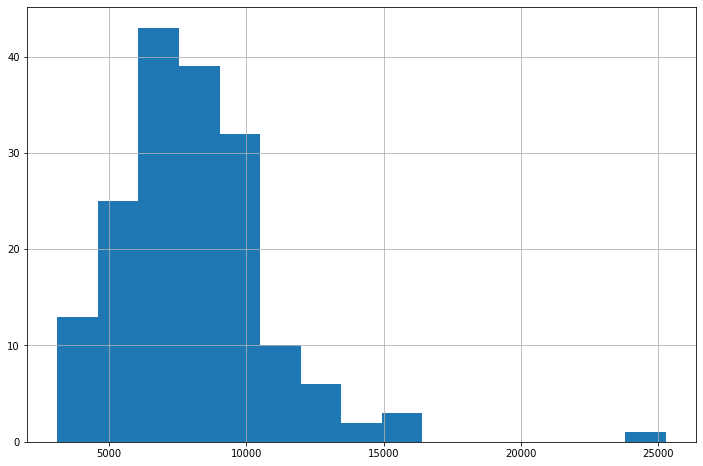

In [149]:
salary_by_org['média'].hist(bins=15,figsize=(12,8))

# Distribuição salarial por classe

/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


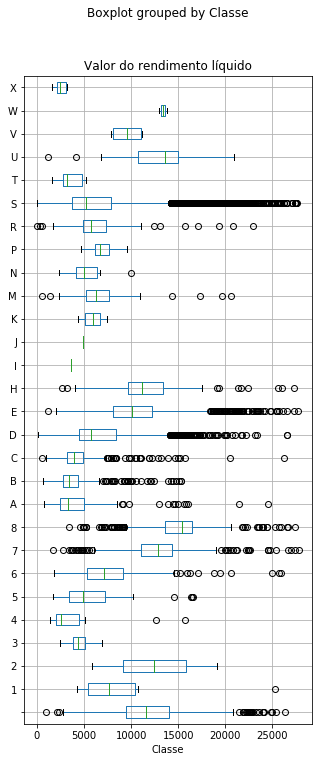

In [144]:
apos_no_outliers.boxplot(column='Valor do rendimento líquido', by='Classe',figsize=(5,12),vert=False)

/home/ndc/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


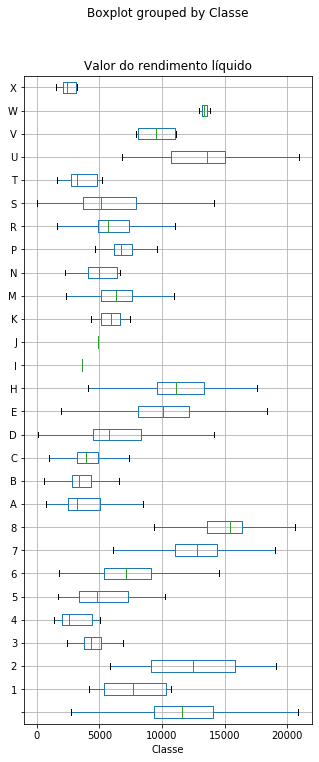

In [145]:
apos_no_outliers.boxplot(column='Valor do rendimento líquido', by='Classe',figsize=(5,12),showfliers=False,vert=False)